In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

ksdir = '/home/anverdie/Data_Ephys/D5_220916_182221'
fs = 20000
n_chan = 64

In [88]:
# Load digital input
f = open(os.path.join(ksdir, 'digitalin.dat'), 'rb') 
sd_array = np.fromfile(f, np.uint16)
f.close()

# Extract stimulus times based on digital input
sd_array_on = np.where(np.insert(np.diff(sd_array), 0, 0) == 4)[0]
sd_array_off = np.where(np.insert(np.diff(sd_array), 0, 0) == -4)[0]

# For some reason there is 26 uknown pulses at the beginning of the recording
sd_array_on = sd_array_on[26:]
sd_array_off = sd_array_off[26:]

In [89]:
f = open(os.path.join(ksdir, 'amplifier.dat'), 'rb') 
amp_array = np.fromfile(f, np.int16)
f.close()

amp_array = amp_array.reshape(-1, 64).T

In [90]:
# Get all spike_times
sp_times = np.load(os.path.join(ksdir,'spike_times.npy'))
sp_times = np.array([i[0] for i in sp_times])


sp_clu = np.load(os.path.join(ksdir,'spike_clusters.npy'))

clu_gp = pd.read_csv(os.path.join(ksdir,'cluster_group.tsv'), delimiter='\t')
clu_gp = clu_gp['group'].to_numpy()

usable_clusters = [i for i, clu in enumerate(clu_gp) if clu == 'good']

usable_sp = np.isin(sp_clu, usable_clusters)
sp_times = sp_times[usable_sp]
sp_clu = sp_clu[usable_sp]

idxs_clu = []
for clu in np.unique(sp_clu):
    idxs_clu.append(np.where(sp_clu == clu)[0])
n_clu = len(idxs_clu)

In [91]:
stims_ttls = np.arange(0, len(sd_array_on), 10)
first_ttls = [sd_array_on[s] for s in stims_ttls]

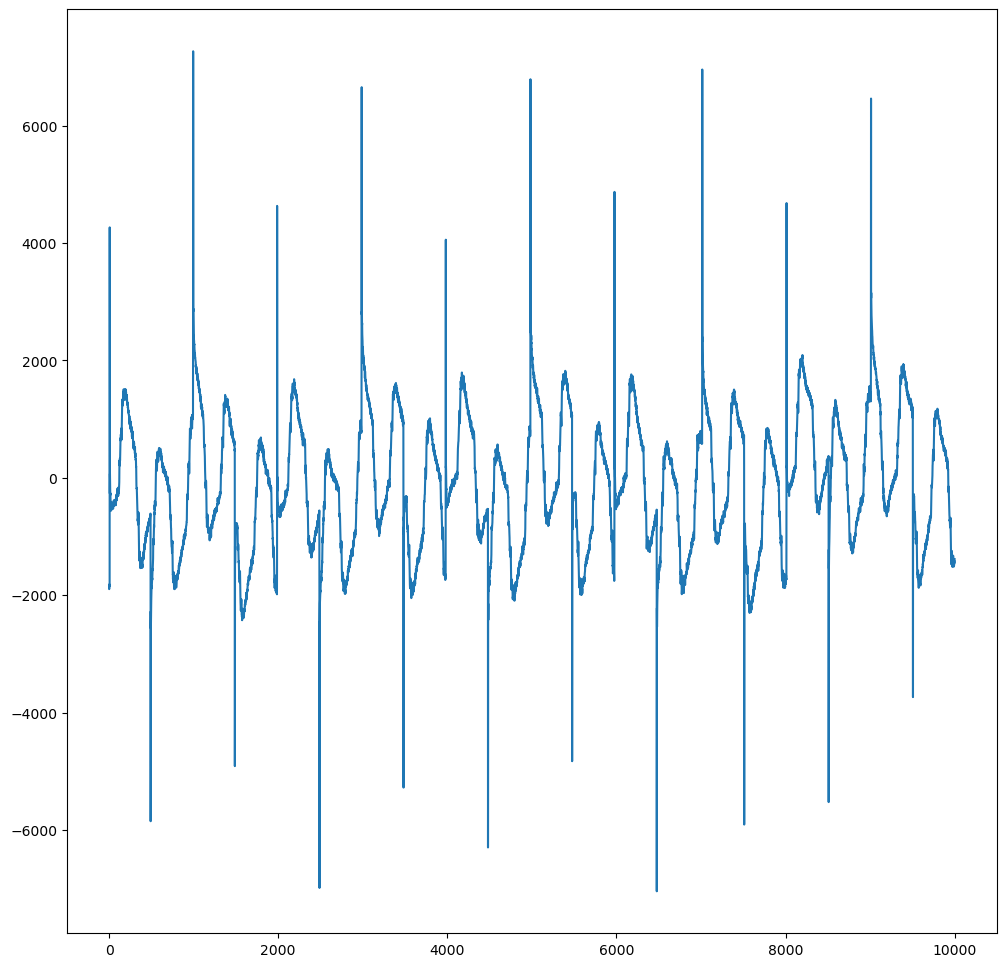

In [92]:
plt.figure(figsize=((12, 12)))
plt.plot(amp_array[3][first_ttls[2159]:first_ttls[2159] + 10000])
plt.show()
plt.close()

In [2]:
coords = [(0, 8),
(4, 8),
(6, 8),
(1, 7),
(3, 7),
(5, 7),
(7, 7),
(0, 6),
(2, 6),
(4, 6),
(6, 6),
(8, 6),
(1, 5),
(3, 5),
(5, 5),
(7, 5),
(0, 4),
(2, 4),
(4, 4),
(6, 4),
(8, 4),
(1, 3),
(3, 3),
(5, 3),
(7, 3),
(0, 2),
(2, 2),
(4, 2),
(6, 8),
(8, 2),
(1, 1),
(3, 1),
(5, 1),
(7, 1),
(2, 0),
(4, 0)]

In [94]:
from rich.progress import track
# Creation of a matrix with shape cluster x temps x led x presentation x intensity
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

n_bins = 20

data = np.empty((84, n_bins, 36, 15, 4))

# Pour chaque intensité
for i, inte in enumerate([int_5, int_10, int_15, int_20]):
    pres = np.array(first_ttls)[inte].reshape(15, 36)
    for p, pre in enumerate(pres):
        for l, led in enumerate(pre):
            for c, idx_clu in enumerate(idxs_clu):
                sp = sp_times[idx_clu]
                spikes = sp[(sp > led - 10000) & (sp < led + 10000)]
                data[c, :, l, p, i] = np.histogram(spikes - (led - 10000) , bins=n_bins, range=(0, 20000))[0]

np.save('data_50.npy', data)
            

(84, 20, 36)


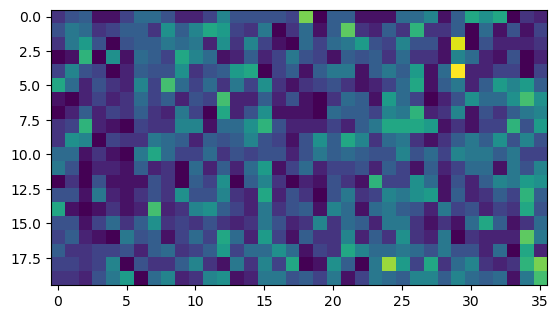

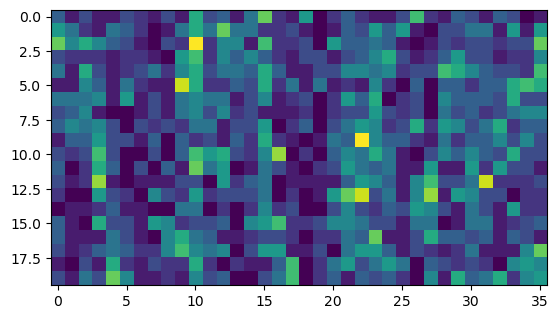

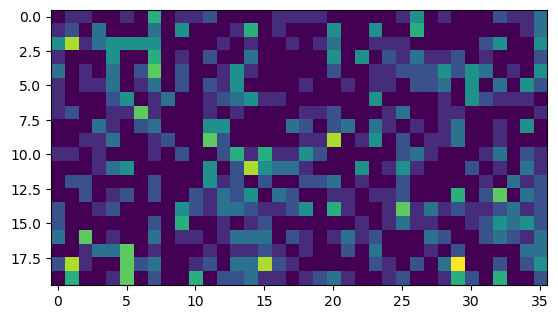

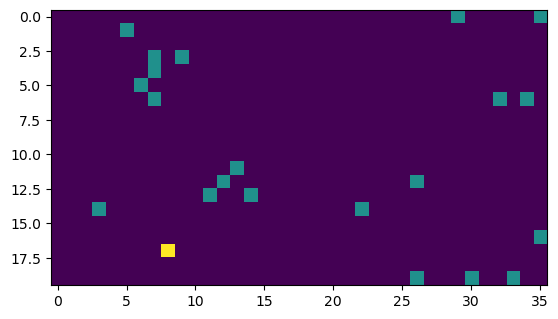

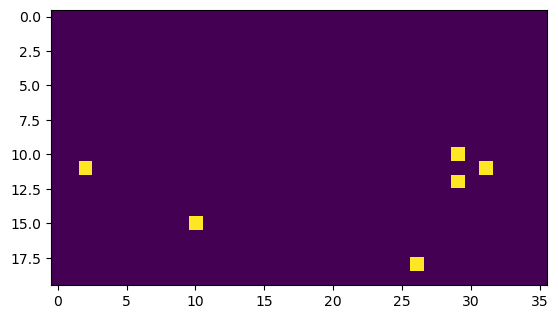

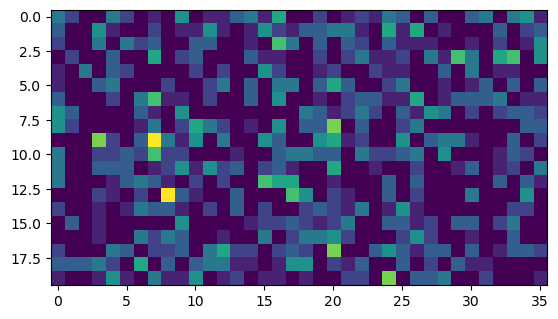

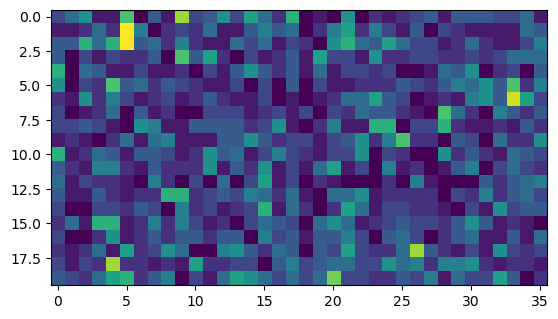

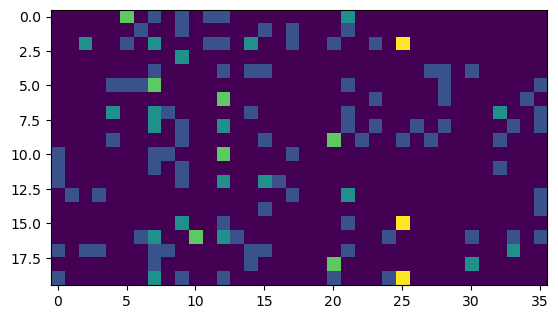

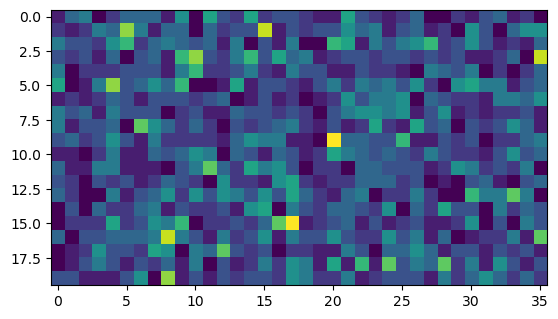

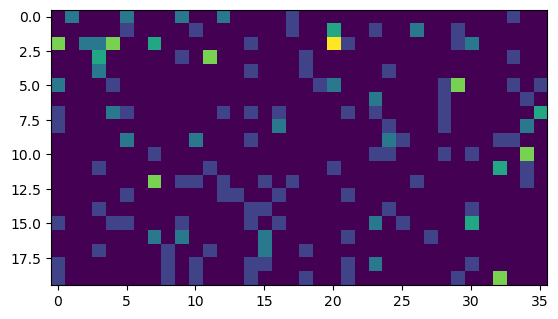

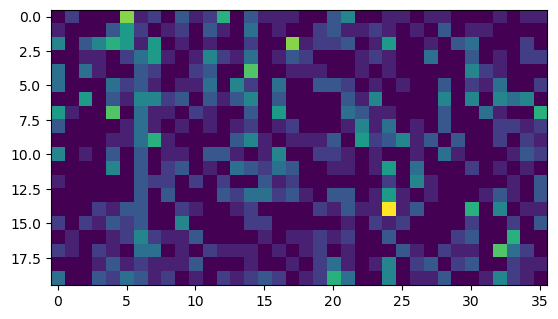

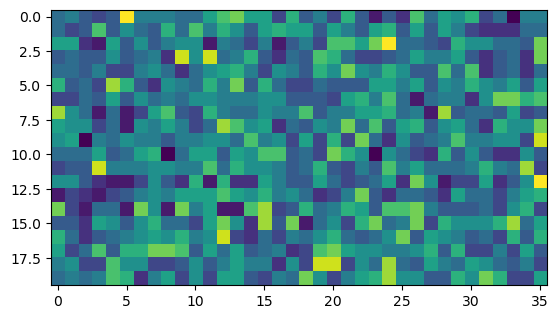

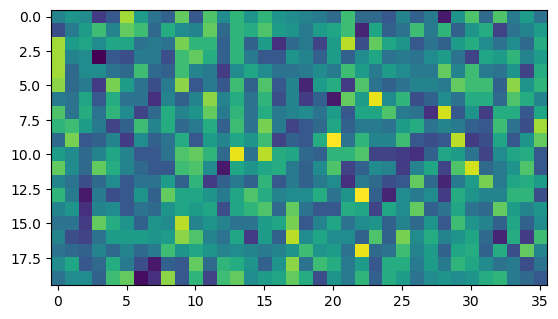

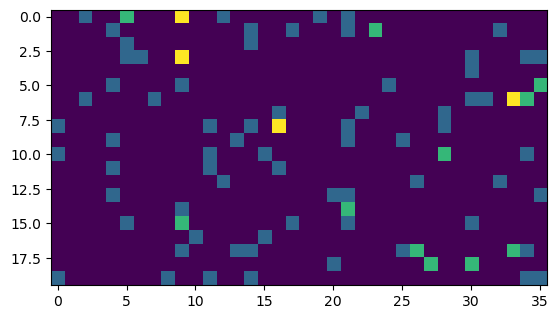

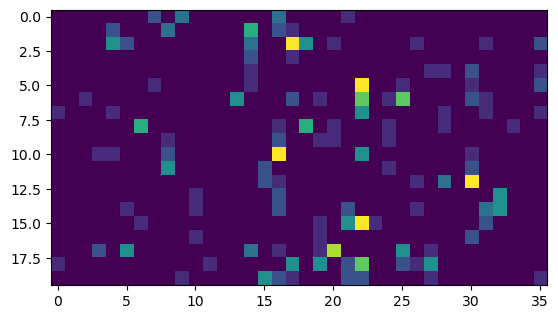

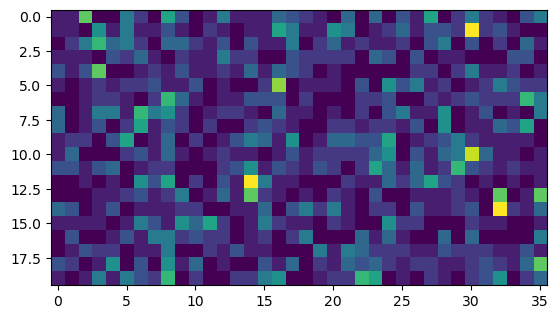

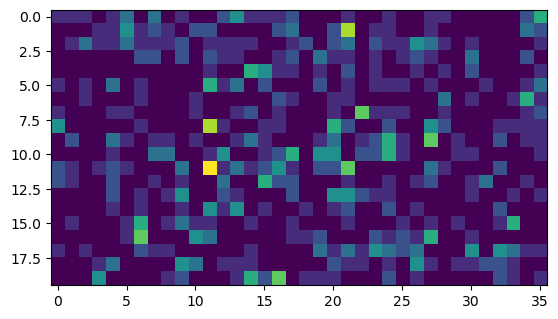

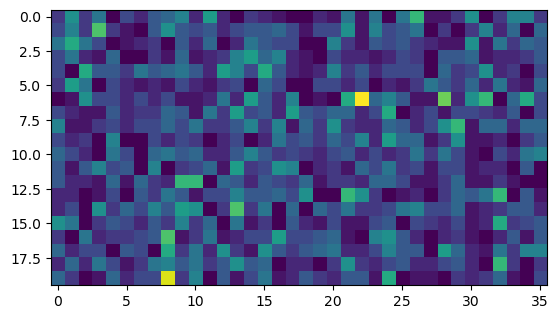

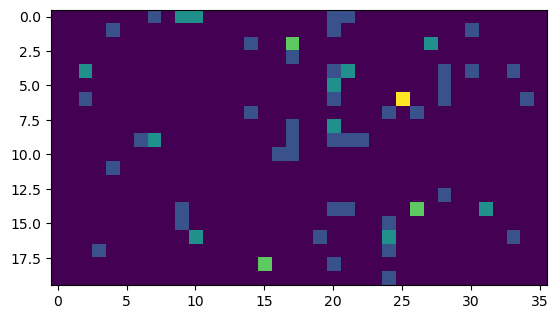

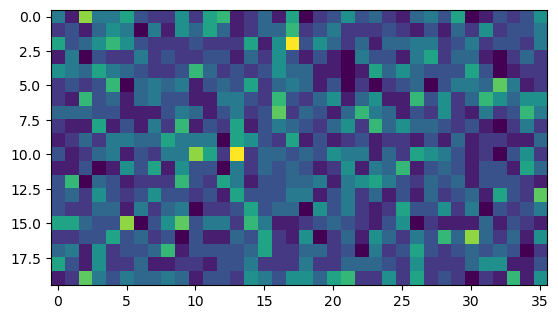

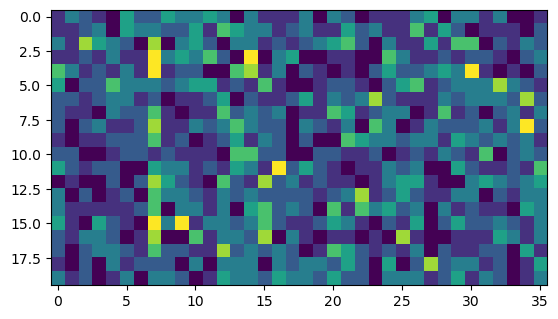

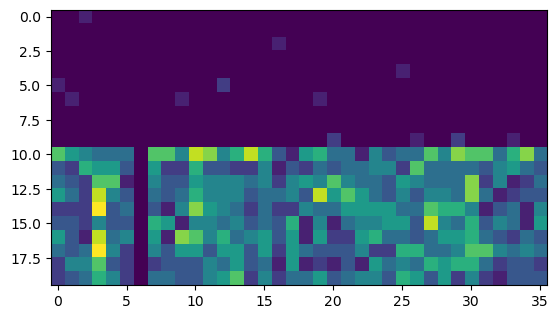

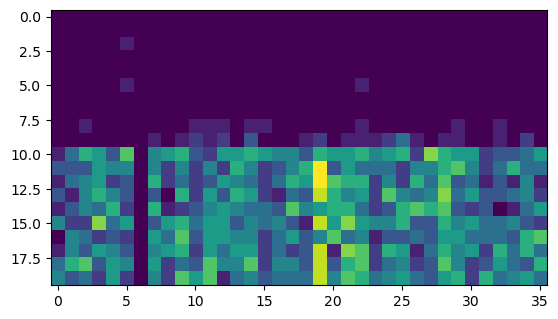

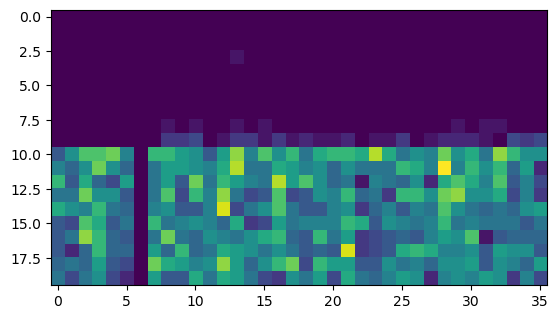

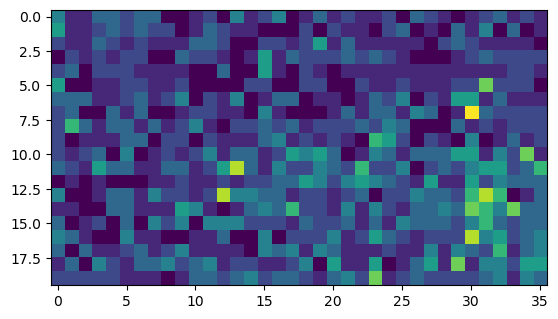

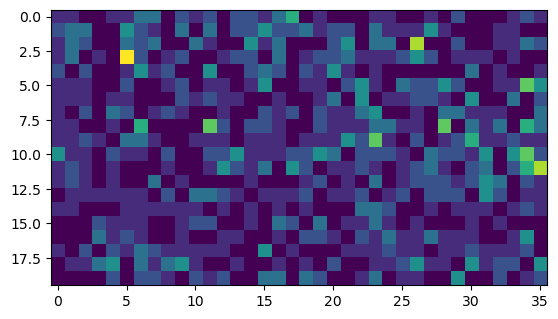

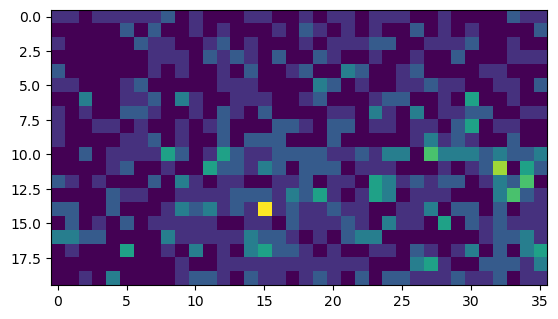

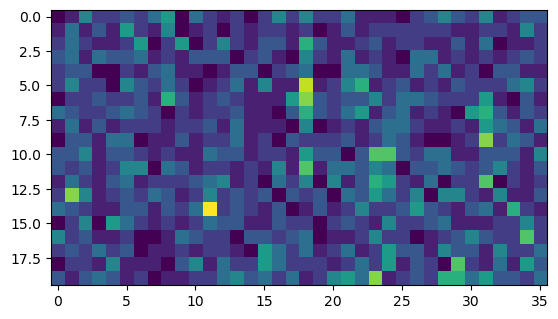

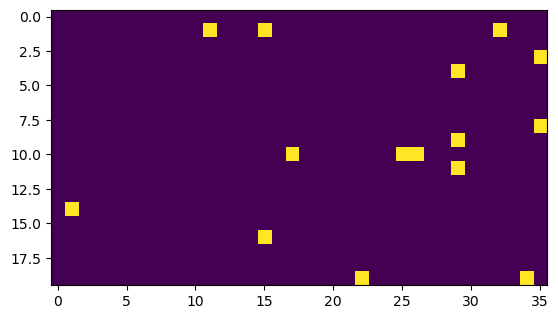

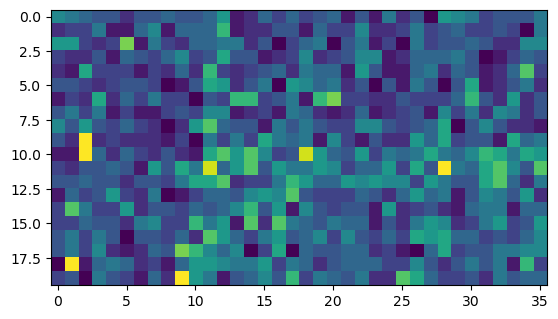

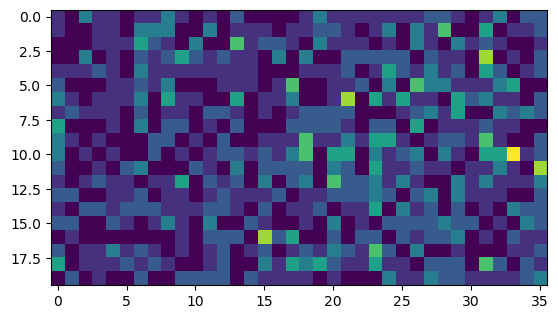

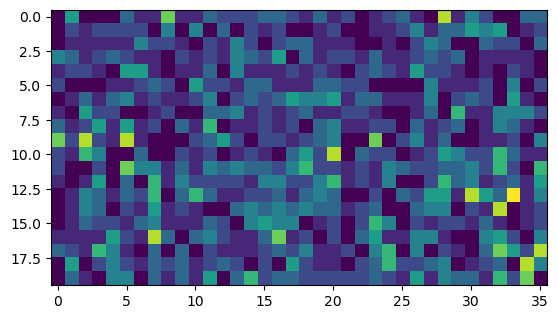

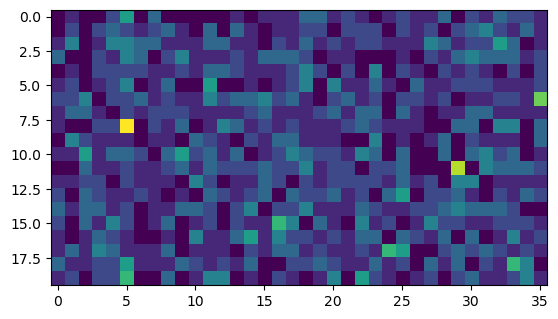

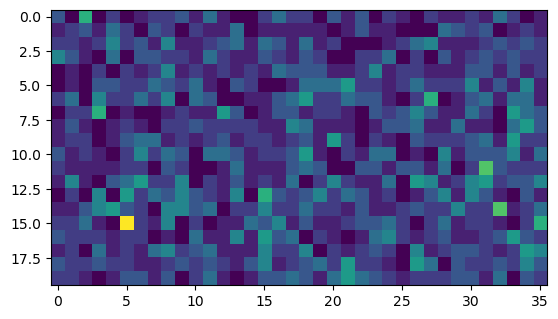

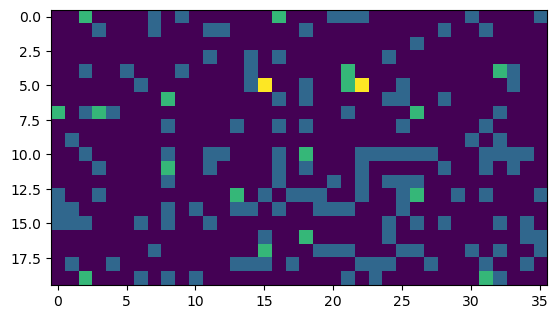

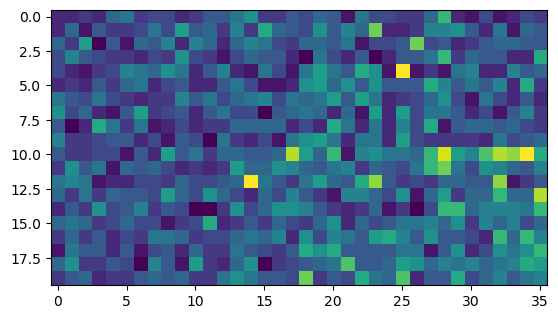

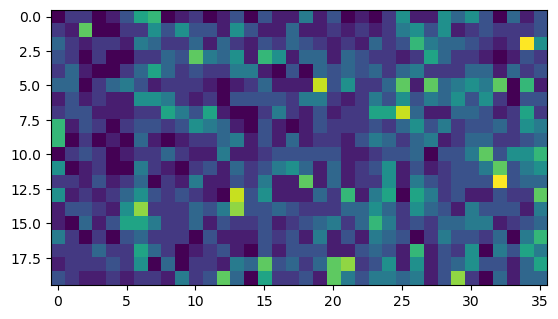

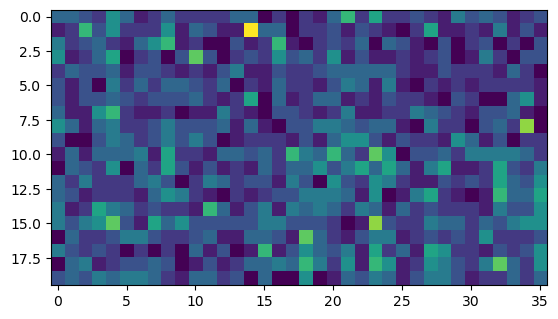

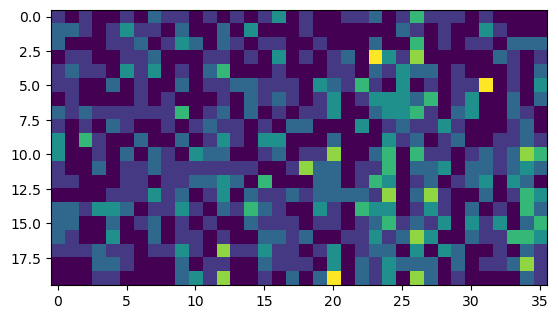

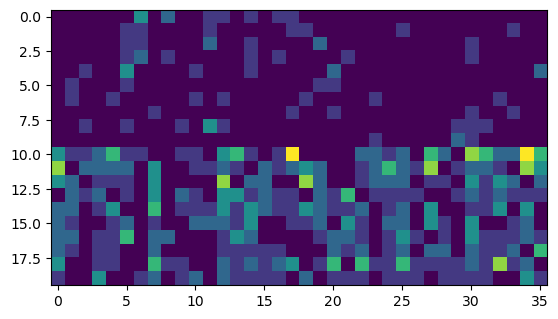

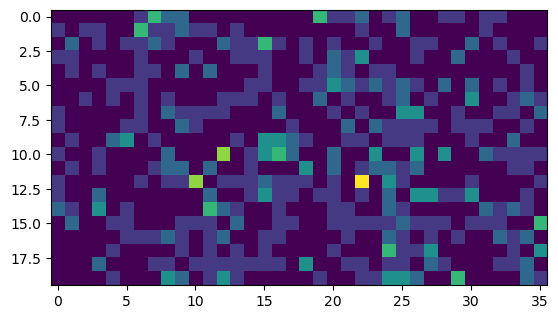

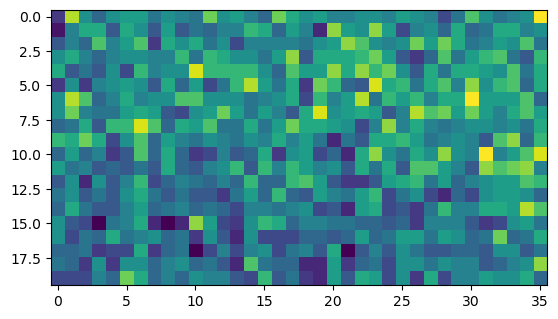

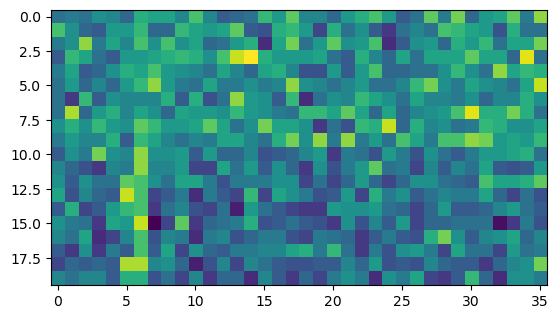

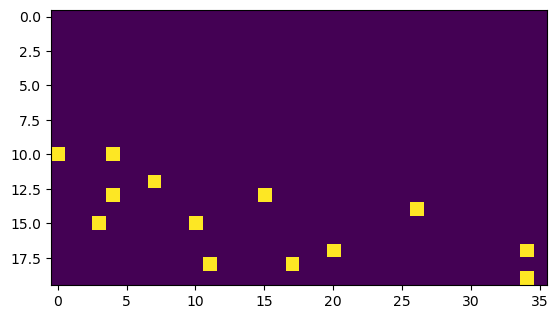

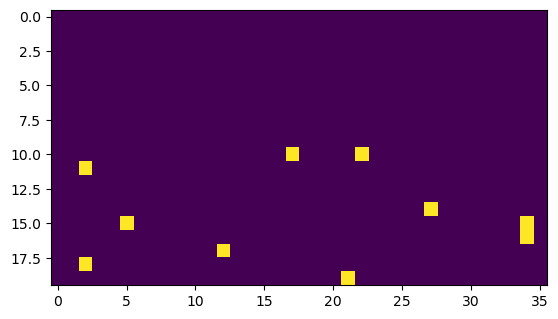

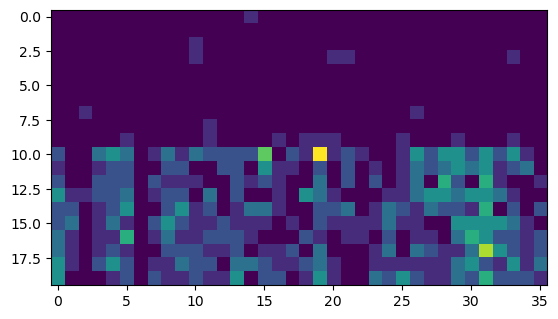

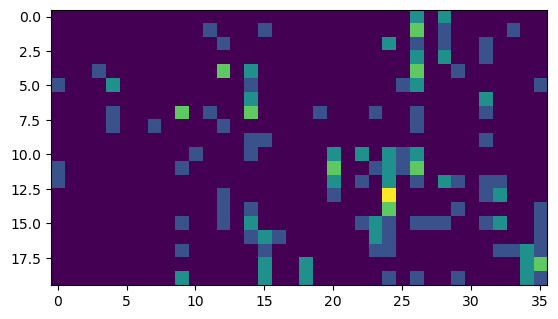

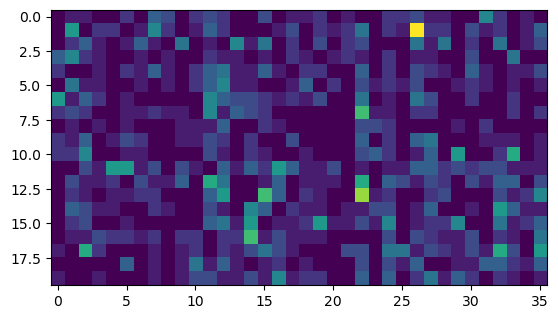

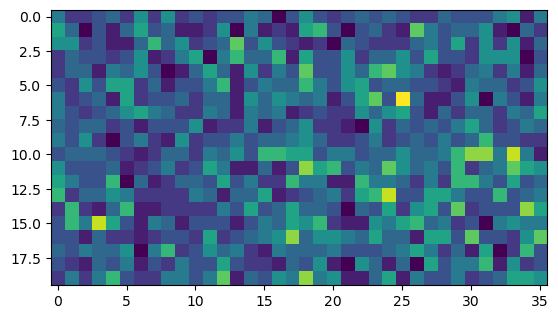

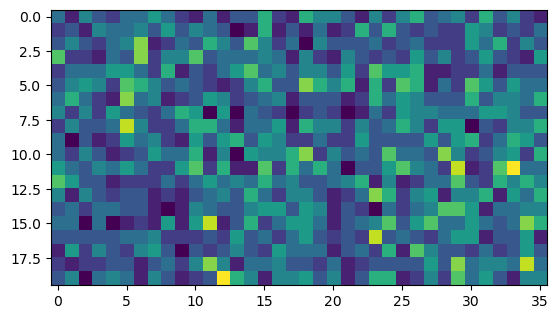

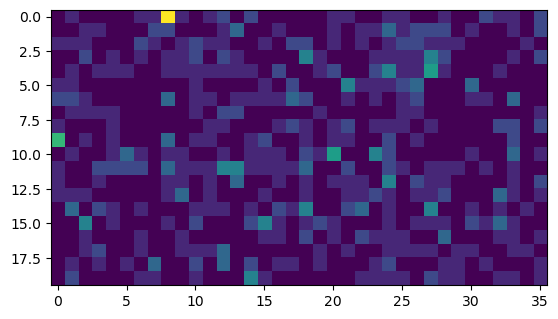

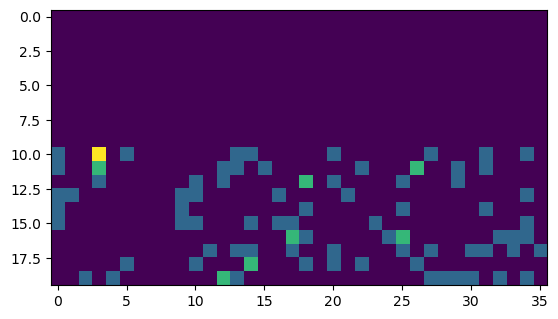

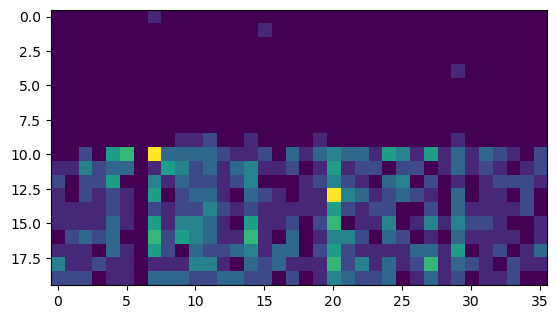

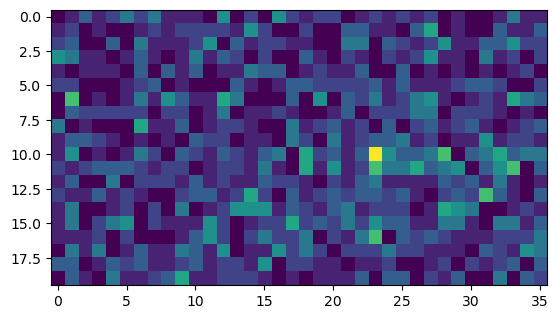

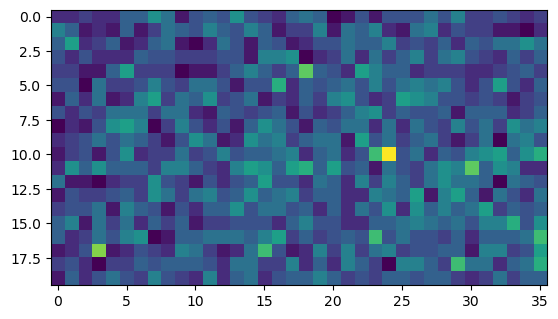

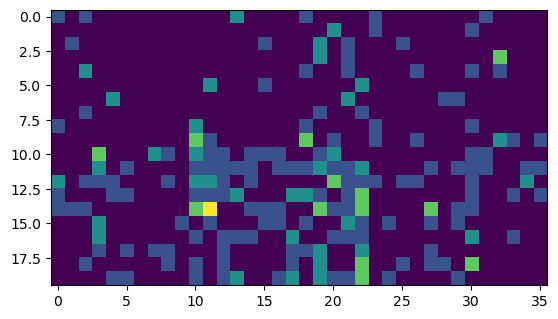

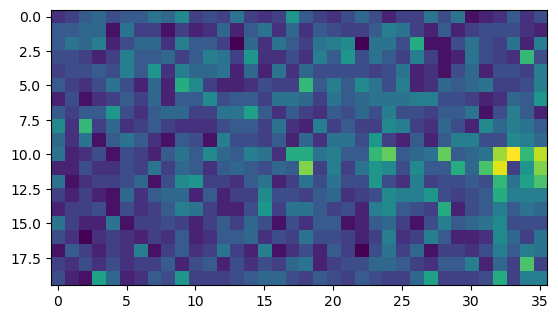

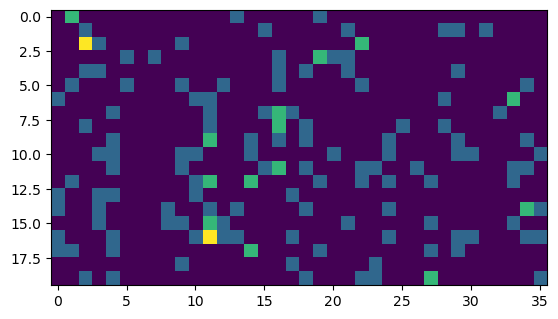

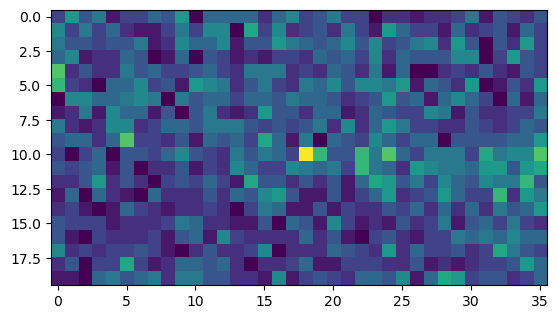

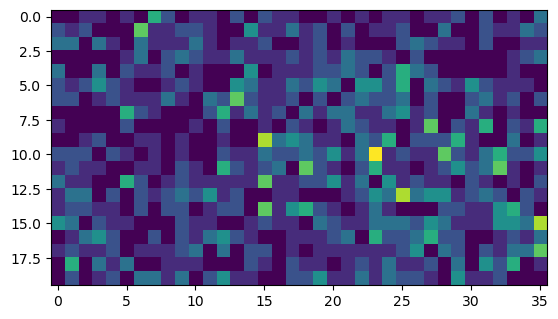

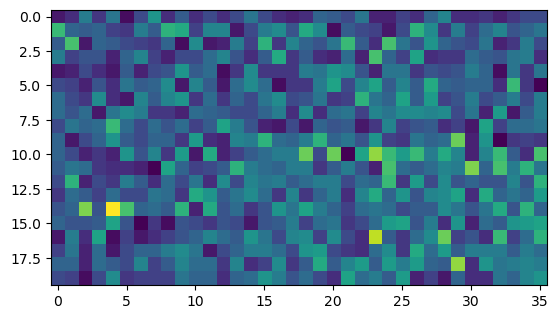

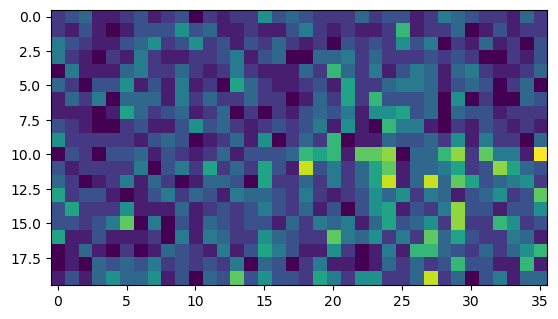

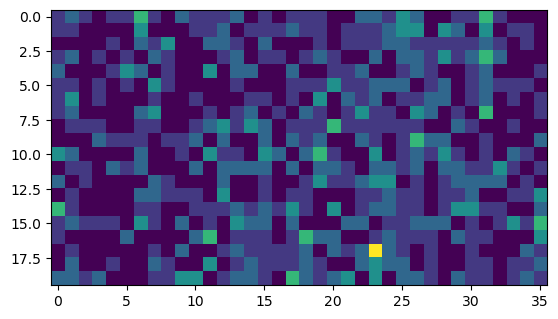

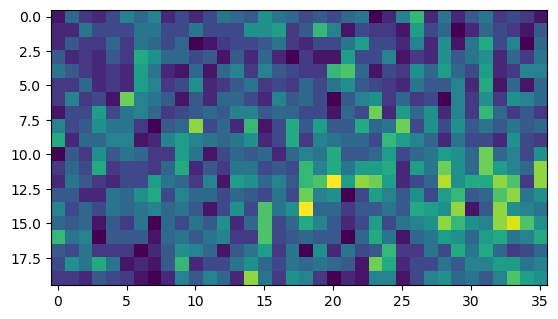

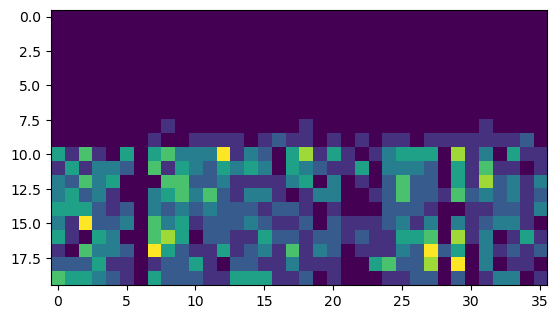

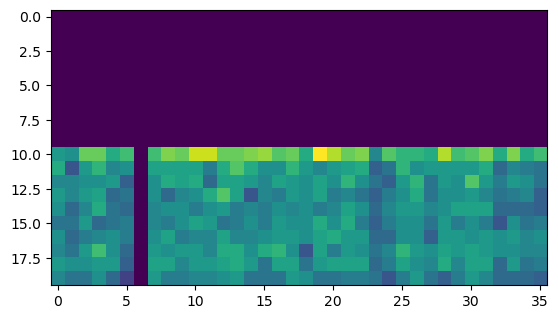

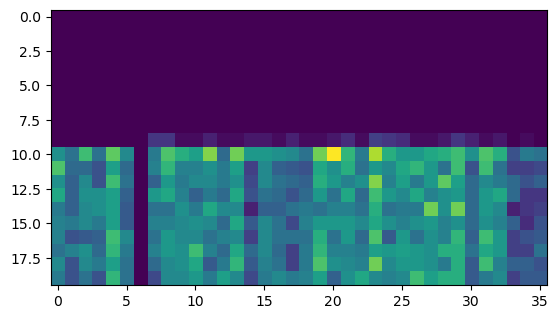

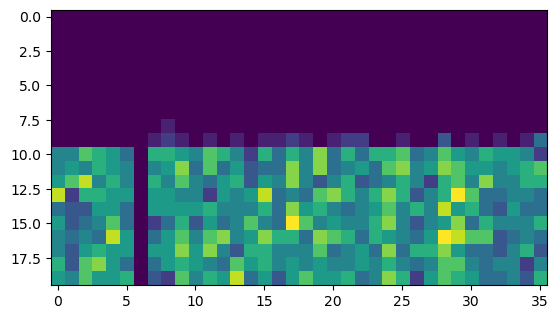

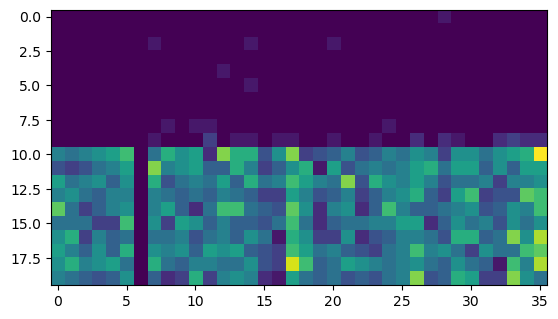

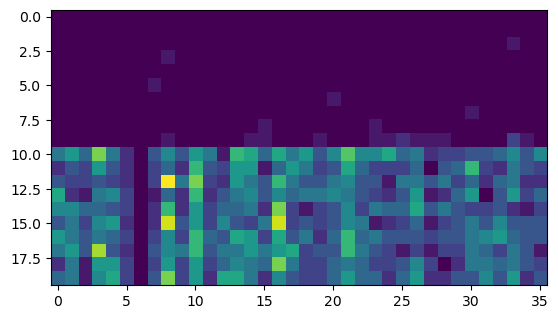

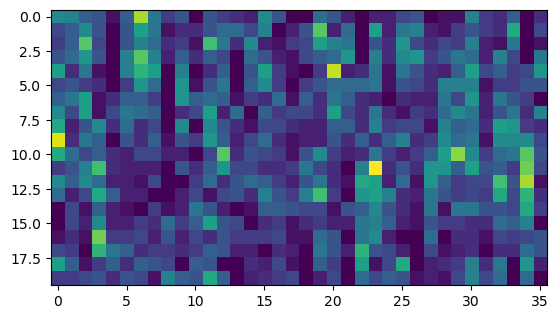

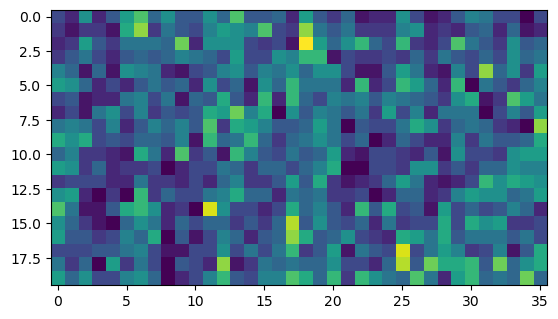

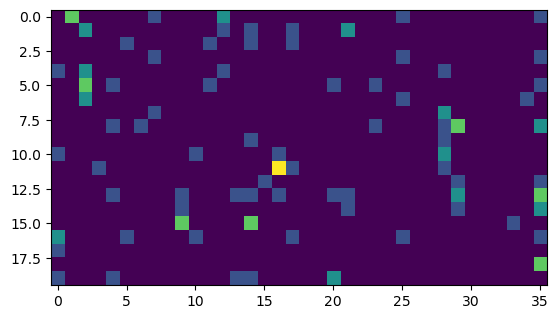

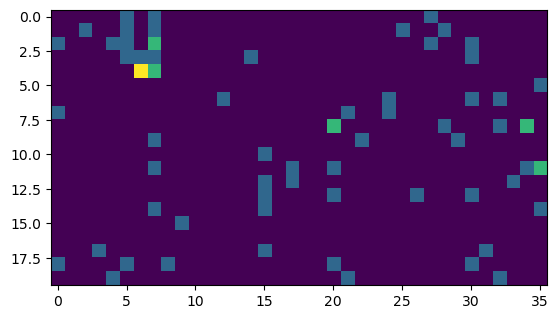

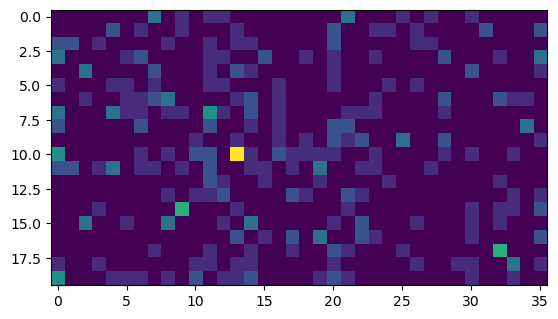

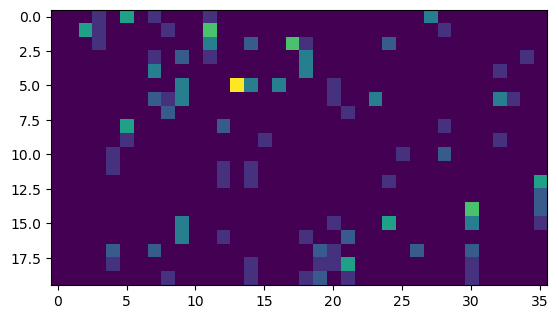

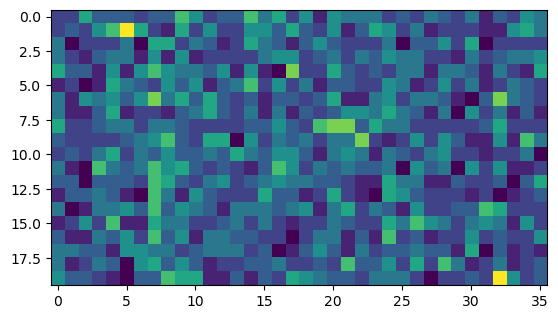

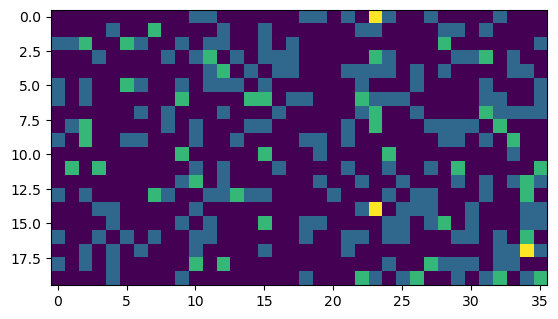

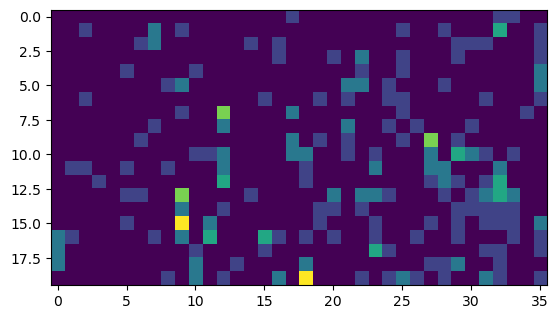

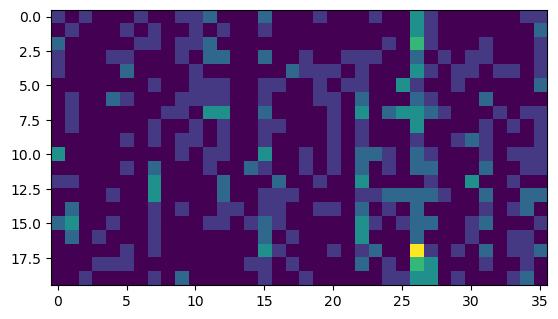

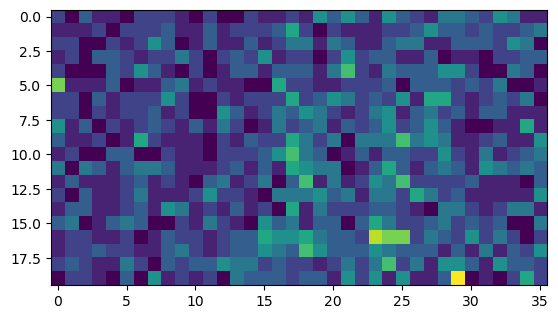

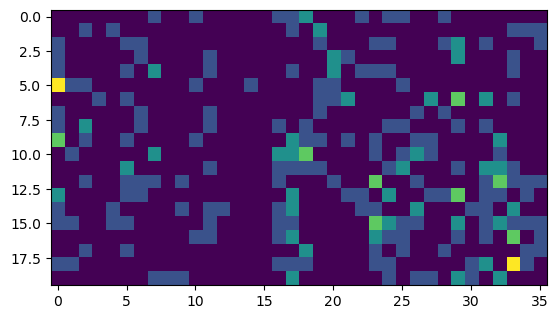

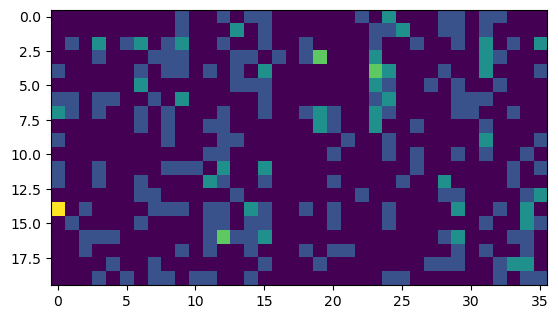

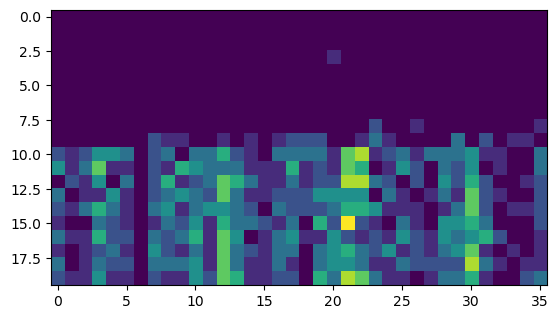

In [95]:
d = np.load('data_50.npy')
avg_d = np.sum(d, axis=3)
d20 = avg_d[:, :, :, 3]
print(d20.shape)
for c in d20:
    plt.imshow(c)
    plt.show()
    plt.close()

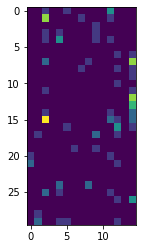

In [10]:
plt.imshow(d[0, :, 0, :, 0])

6.200000000000001
119.86666666666666
[-1.34615385e-01  2.54901961e-01  5.71428571e-02  7.33333333e-01
 -4.74576271e-01 -1.37931034e-01  4.34782609e-01 -1.09375000e-01
  2.78688525e-01 -3.02631579e-01 -6.97674419e-02 -3.81818182e-01
 -2.63736264e-01  1.42857143e-02 -2.63157895e-02  1.27272727e+00
  3.52941176e-01  2.90909091e-01 -9.52380952e-02  3.10344828e-01
 -8.16326531e-02  1.04083409e-17  3.19148936e-01 -5.55555556e-02
  2.44444444e-01  3.22580645e-01  4.54545455e-01 -1.88888889e-01
  1.28205128e-01 -1.17647059e-01  1.42857143e-01  1.11538462e+00
  5.83333333e-01 -7.25000000e-01 -5.26315789e-02  5.83333333e-01]
17.333333333333332
111.93333333333334
[-0.1875      0.60869565 -0.02631579  1.2173913  -0.34782609  0.7
  0.26923077  0.32075472  0.81578947  0.1875     -0.375       0.73684211
  0.40789474 -0.14925373  0.17948718  0.15909091  0.34042553 -0.27777778
  0.87804878  0.09375     0.025       0.17777778  0.0212766   0.4
  0.14606742  0.32       -0.25       -0.4         0.57142857 

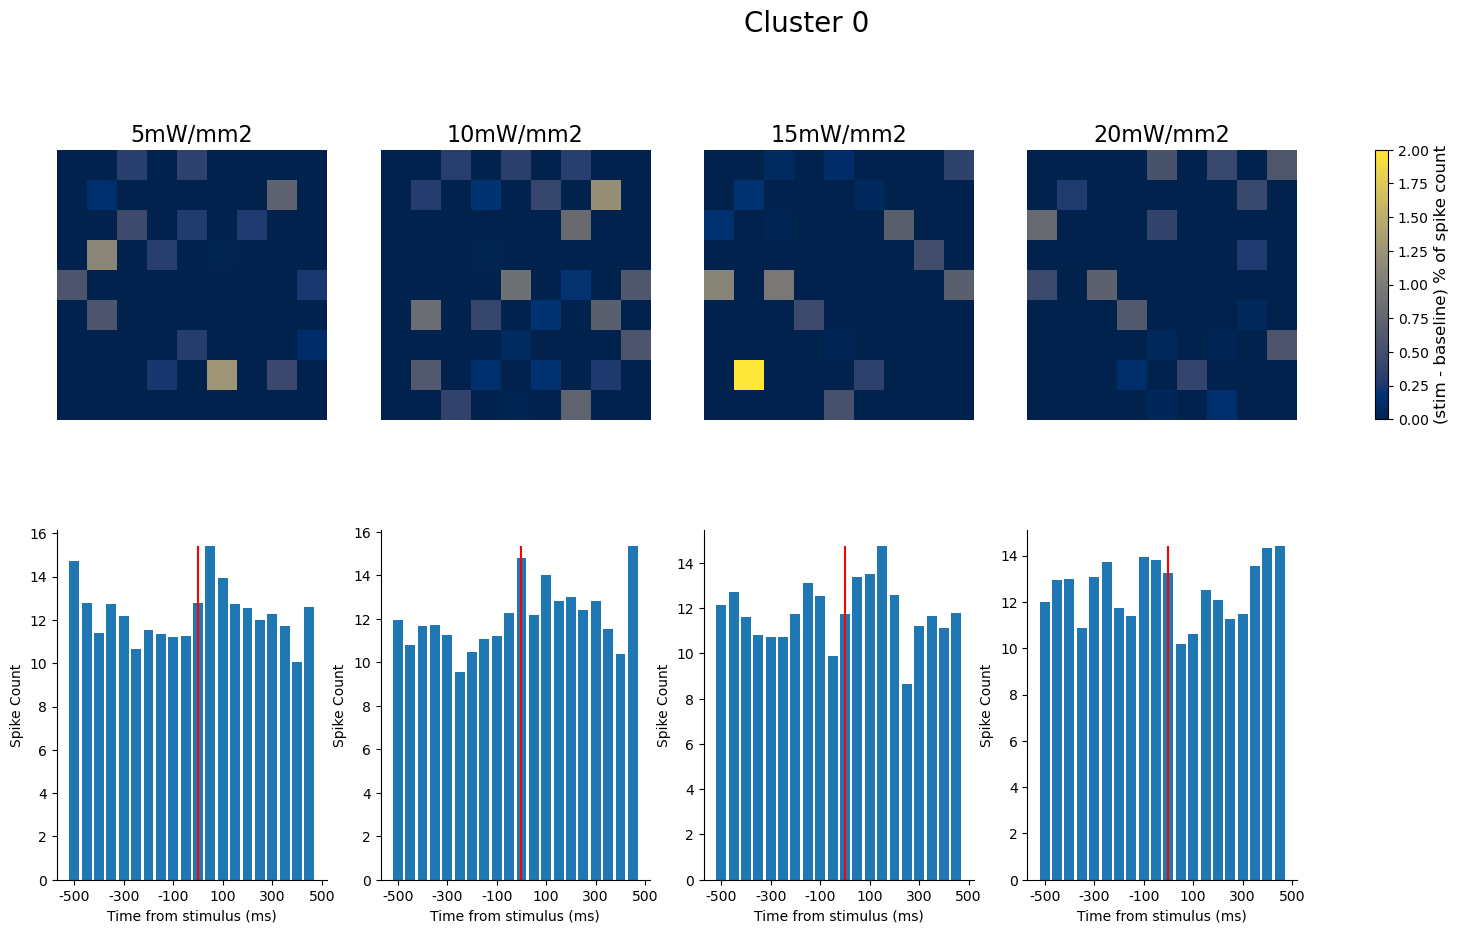

-1.4666666666666668
78.26666666666665
[-9.09090909e-02  1.15384615e+00  1.07142857e-01  1.53846154e-01
 -4.00000000e-01  6.66666667e-01 -1.87500000e-01 -1.00000000e-01
  4.61538462e-01 -2.22222222e-01 -4.16666667e-02 -9.67741935e-02
  2.66666667e-01 -4.50980392e-01  1.18750000e+00  6.15384615e-01
  4.23076923e-01  1.02564103e-01 -5.71428571e-02 -5.78947368e-01
  6.81818182e-01 -4.09090909e-01 -2.94117647e-01  1.07142857e+00
  2.08333333e-01 -3.77777778e-01  7.08333333e-01 -3.87287102e-17
  4.54545455e-01 -4.44444444e-01 -2.92682927e-01  5.90909091e-01
  4.16666667e-02 -4.80000000e-01 -2.50000000e-01 -3.48837209e-01]
14.866666666666667
71.93333333333332
[ 9.16666667e-01  2.85714286e-01 -2.57142857e-01  4.61538462e-01
  1.08108108e-01  5.62500000e-01  4.44444444e-01 -8.47457627e-02
  6.66666667e-01  5.65217391e-01  2.16666667e+00  5.55555556e-02
  3.22580645e-01  1.09561483e-17 -5.00000000e-01  1.53333333e+00
  0.00000000e+00  2.00000000e-02  2.50000000e-01  1.00000000e-01
  6.36363636e-

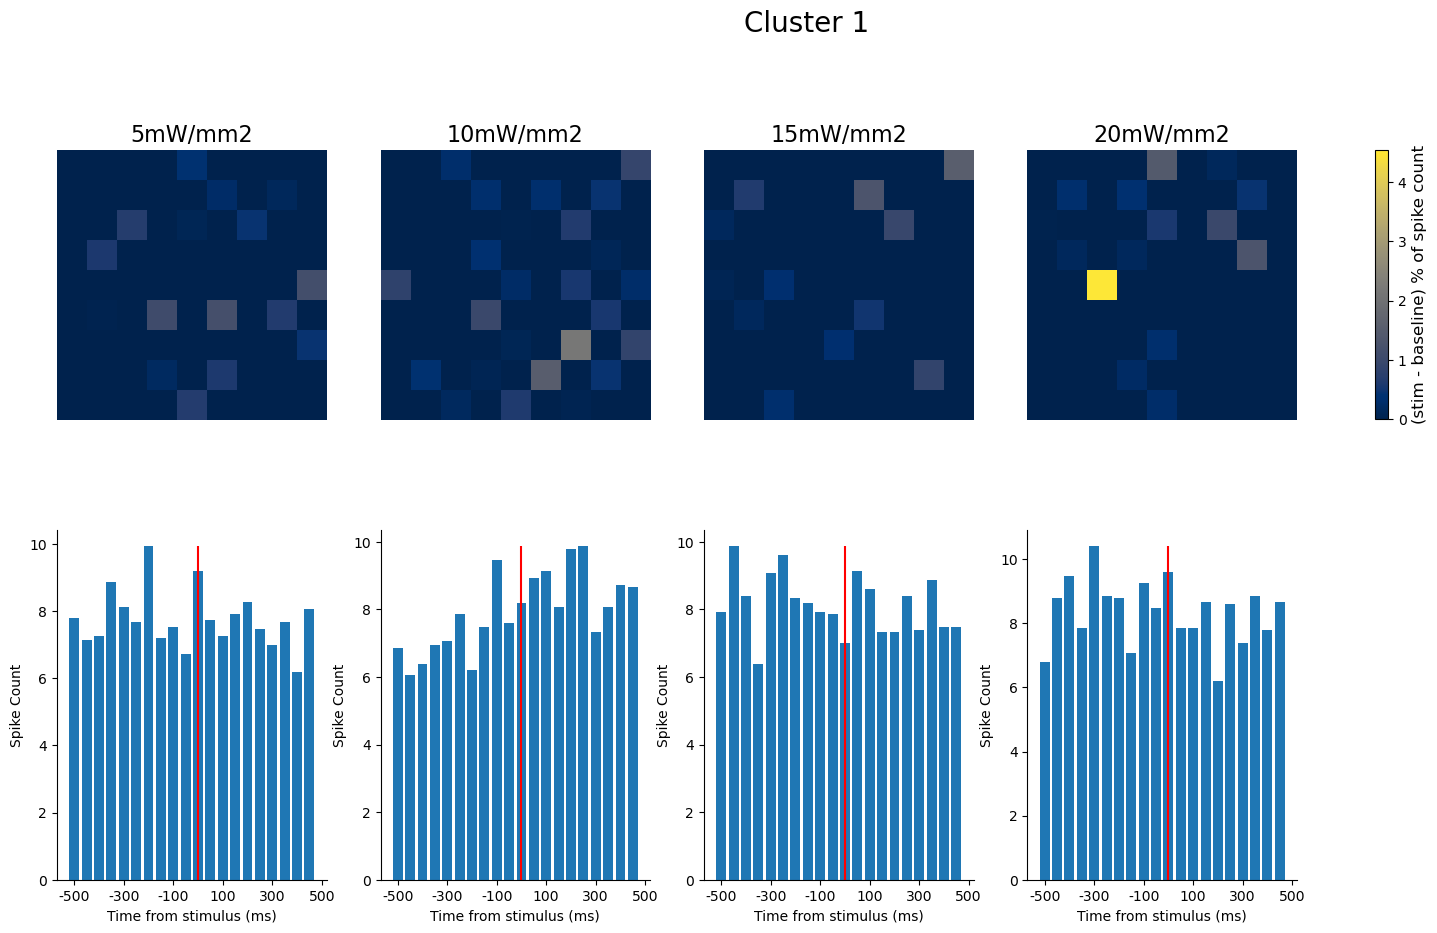

-3.2666666666666666
30.933333333333337
[-5.33333333e-01 -7.61904762e-01  6.36363636e-01  1.66666667e-01
  0.00000000e+00 -6.50000000e-01  2.40000000e+00  1.87500000e+00
  5.38461538e-01 -1.25000000e-01 -2.00000000e-01  5.00000000e-01
 -1.66666667e-01 -6.00000000e-01  5.45454545e-01 -5.00000000e-01
  2.50000000e-01 -5.71428571e-01  5.94762335e-17 -5.71428571e-01
 -7.24137931e-01  8.50000000e+00  3.00000000e+00 -3.00000000e-01
 -4.70588235e-01  5.33333333e+00 -5.15151515e-01 -3.63636364e-01
 -1.66666667e-01 -7.77777778e-01  5.00000000e-01 -5.83333333e-01
  0.00000000e+00 -3.00000000e-01 -4.00000000e-01 -7.50000000e-01]
-2.0000000000000004
25.53333333333333
[ 5.00000000e-01  1.00000000e+00  2.72727273e-01  1.12500000e+00
 -2.22222222e-01  0.00000000e+00 -1.25000000e-01 -2.85714286e-01
  8.00000000e-01 -7.50000000e-01  7.14285714e-01  1.42857143e-01
  4.28571429e-01 -3.50000000e-01 -2.77777778e-01 -4.44444444e-01
  1.16666667e+00  1.66666667e-01 -6.81818182e-01  3.33333333e-01
  5.00000000

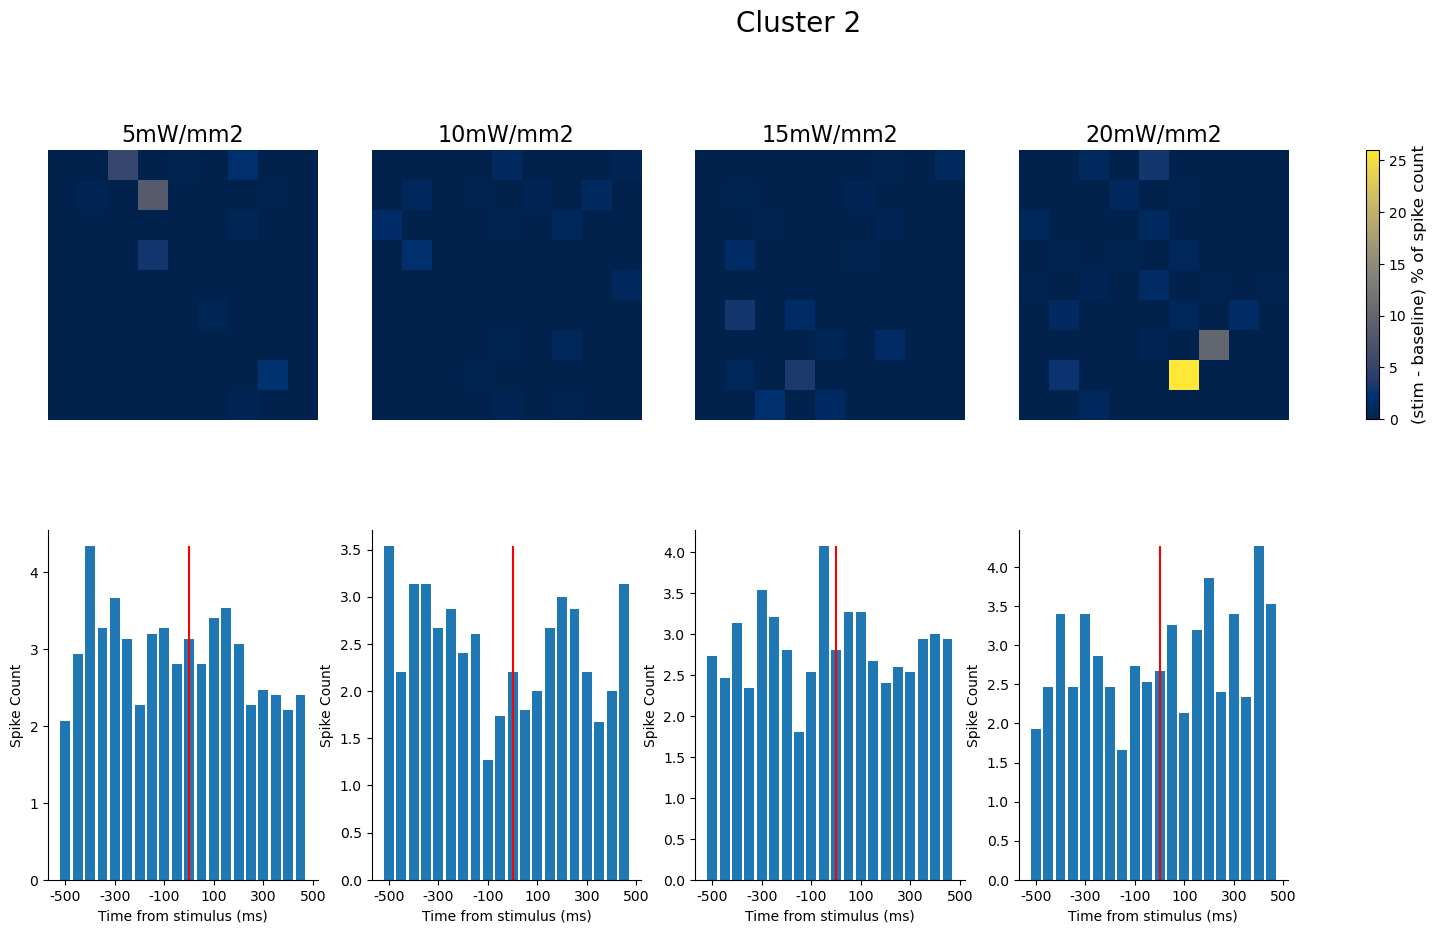

0.2666666666666667
0.7999999999999999
[ inf  nan -1.  -1.  -1.   nan  inf  nan  inf  inf  nan  inf  0.   nan
  nan  nan  inf  0.   nan  nan -1.   inf  nan  nan -1.   inf  nan  nan
 -1.   nan  inf  inf  inf -1.  -0.5 -1. ]
0.13333333333333336
1.0
[ nan  nan -1.   nan -1.   nan  inf  inf  inf  nan  inf  nan  inf  nan
  nan  inf  nan -1.  -0.5  inf  nan  nan  inf -1.  -1.   0.   inf -1.
  nan -1.   inf  nan  inf  nan -1.   nan]
-0.26666666666666666
0.9333333333333333
[  nan  0.     nan   nan   nan   nan   nan -1.     nan   nan  0.     inf
   inf   nan -1.     inf   nan   nan   nan -1.     nan   nan   nan   nan
 -0.75   nan -1.     nan   nan   nan   nan -1.   -1.     inf   inf -0.5 ]


<ipython-input-20-ffdacb82c8dd>:48: RuntimeWarning: divide by zero encountered in true_divide
  leds = np.sum(intens[10:, :] - intens[:10, :], axis=0) / np.sum(intens[:10, :], axis=0)
<ipython-input-20-ffdacb82c8dd>:48: RuntimeWarning: invalid value encountered in true_divide
  leds = np.sum(intens[10:, :] - intens[:10, :], axis=0) / np.sum(intens[:10, :], axis=0)


0.19999999999999996
0.6666666666666666
[nan nan nan inf nan -1. -1. -1. inf -1. nan inf inf inf inf nan nan nan
 nan nan nan nan inf nan nan nan inf nan nan -1. inf nan -1. inf -1.  0.]


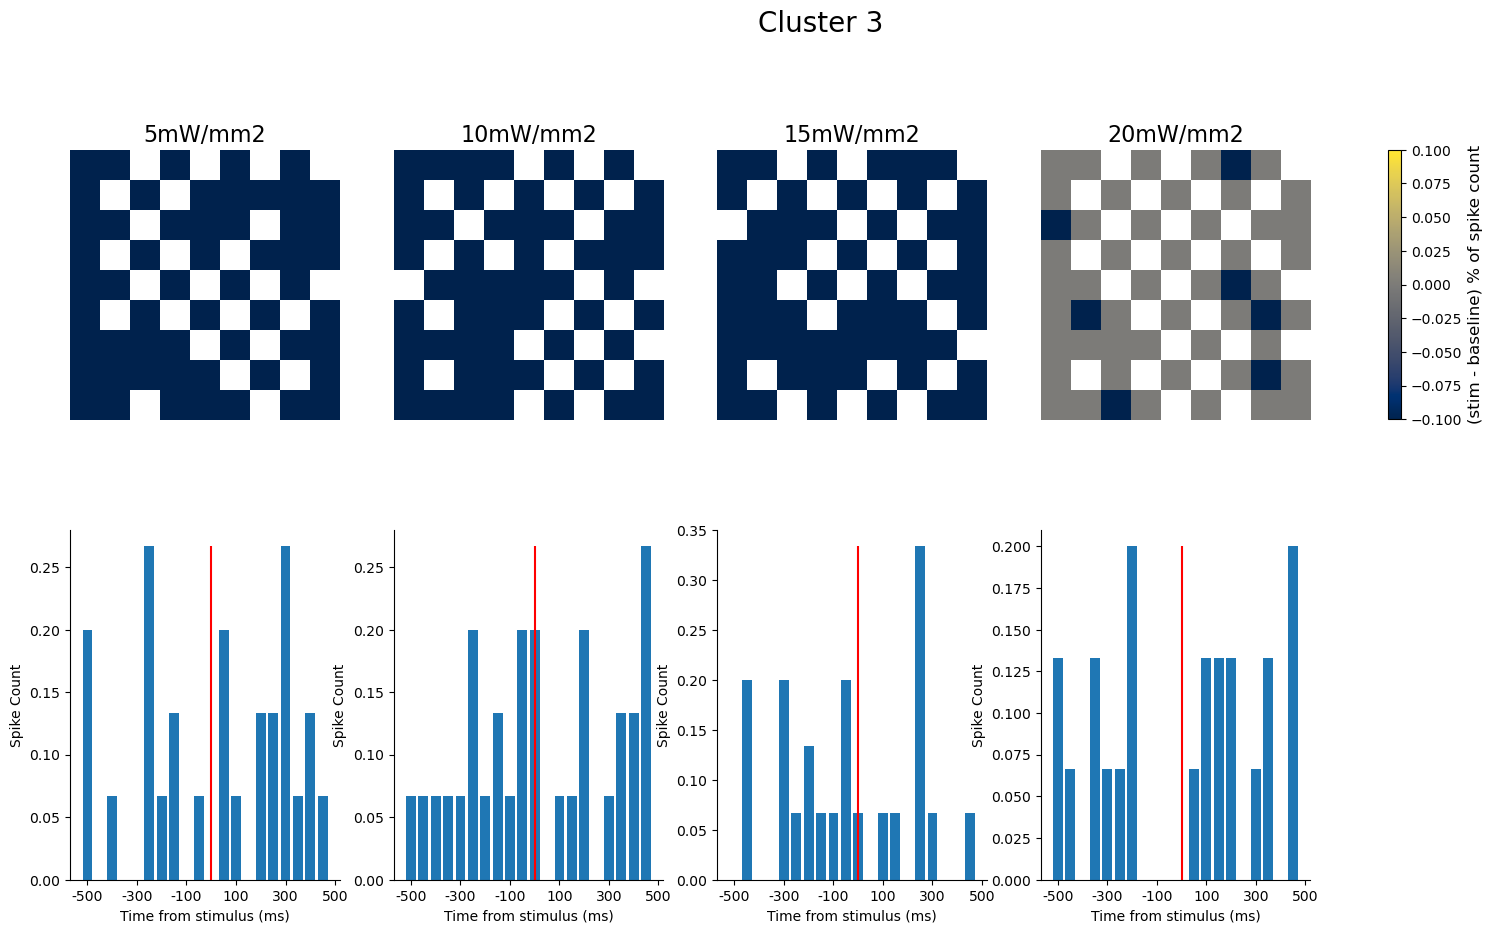

0.2
0.0
[nan nan inf nan nan nan nan nan nan nan nan nan nan nan nan nan nan inf
 nan nan nan nan nan nan nan nan nan inf nan nan nan nan nan nan nan nan]
0.8666666666666667
0.0
[nan nan nan inf inf nan nan nan nan nan nan nan inf nan nan nan inf nan
 nan nan inf inf nan nan inf nan nan nan inf nan nan nan nan nan inf inf]
0.6000000000000001
0.0
[nan inf nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan inf
 nan inf nan nan nan nan inf nan nan inf inf nan inf nan nan inf nan nan]
0.4
0.0
[nan nan inf nan nan nan nan nan nan nan inf nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan inf nan nan inf nan inf nan nan nan nan]


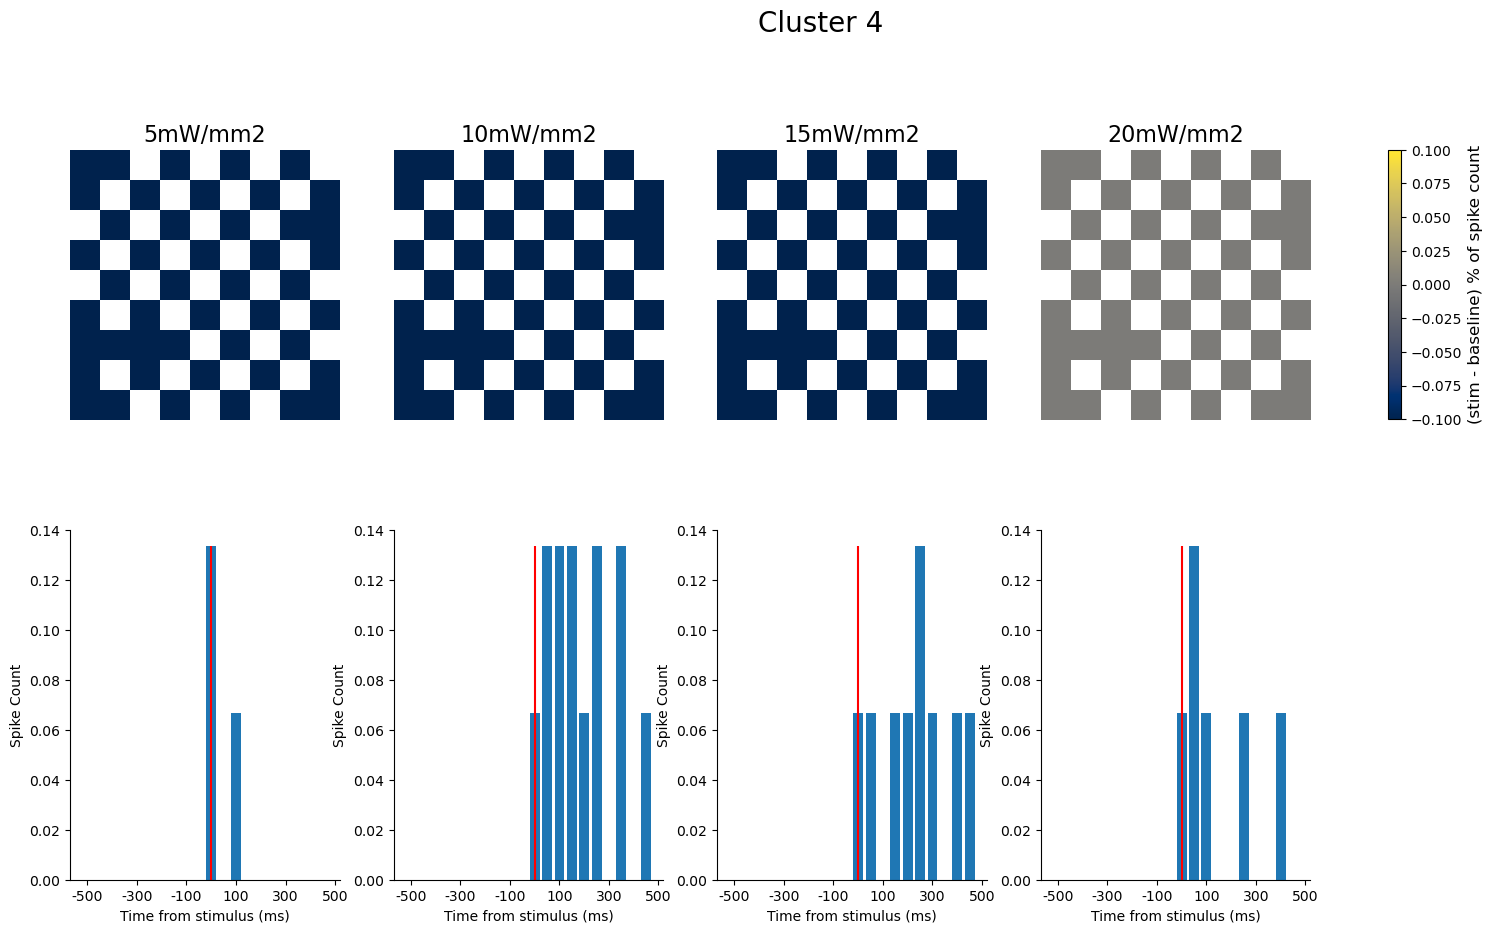

-1.066666666666667
40.800000000000004
[-1.81818182e-01 -2.30769231e-01 -5.55555556e-01 -6.66666667e-01
  1.60000000e+00 -7.20000000e-01  8.75000000e-01  1.50000000e+00
 -2.66666667e-01  5.00000000e-01 -2.69230769e-01 -5.65217391e-01
 -8.14814815e-01 -3.63636364e-01  7.50000000e-01  4.62592927e-17
 -4.09090909e-01  5.26315789e-01  2.40000000e+00  4.37500000e-01
 -4.41176471e-01 -5.00000000e-01  5.94762335e-17  7.40740741e-02
  1.04083409e-16  1.30769231e+00 -2.00000000e-01 -8.00000000e-01
  7.22222222e-01  2.16666667e+00 -8.33333333e-02 -6.66666667e-01
 -5.00000000e-01  2.40000000e+00  4.33333333e+00  2.75000000e+00]
-1.8666666666666663
41.733333333333334
[ 1.90476190e-01  1.55555556e+00  5.71428571e-01  1.81818182e-01
  4.62592927e-17 -5.83333333e-01 -4.23076923e-01 -4.54545455e-01
  2.85714286e-01 -6.06060606e-01 -6.89655172e-02 -1.53846154e-01
 -7.91666667e-01 -4.76190476e-02 -6.25000000e-01  3.33333333e+00
 -4.76190476e-02  1.00000000e+00  1.20000000e+00 -3.20256642e-17
  1.12500000

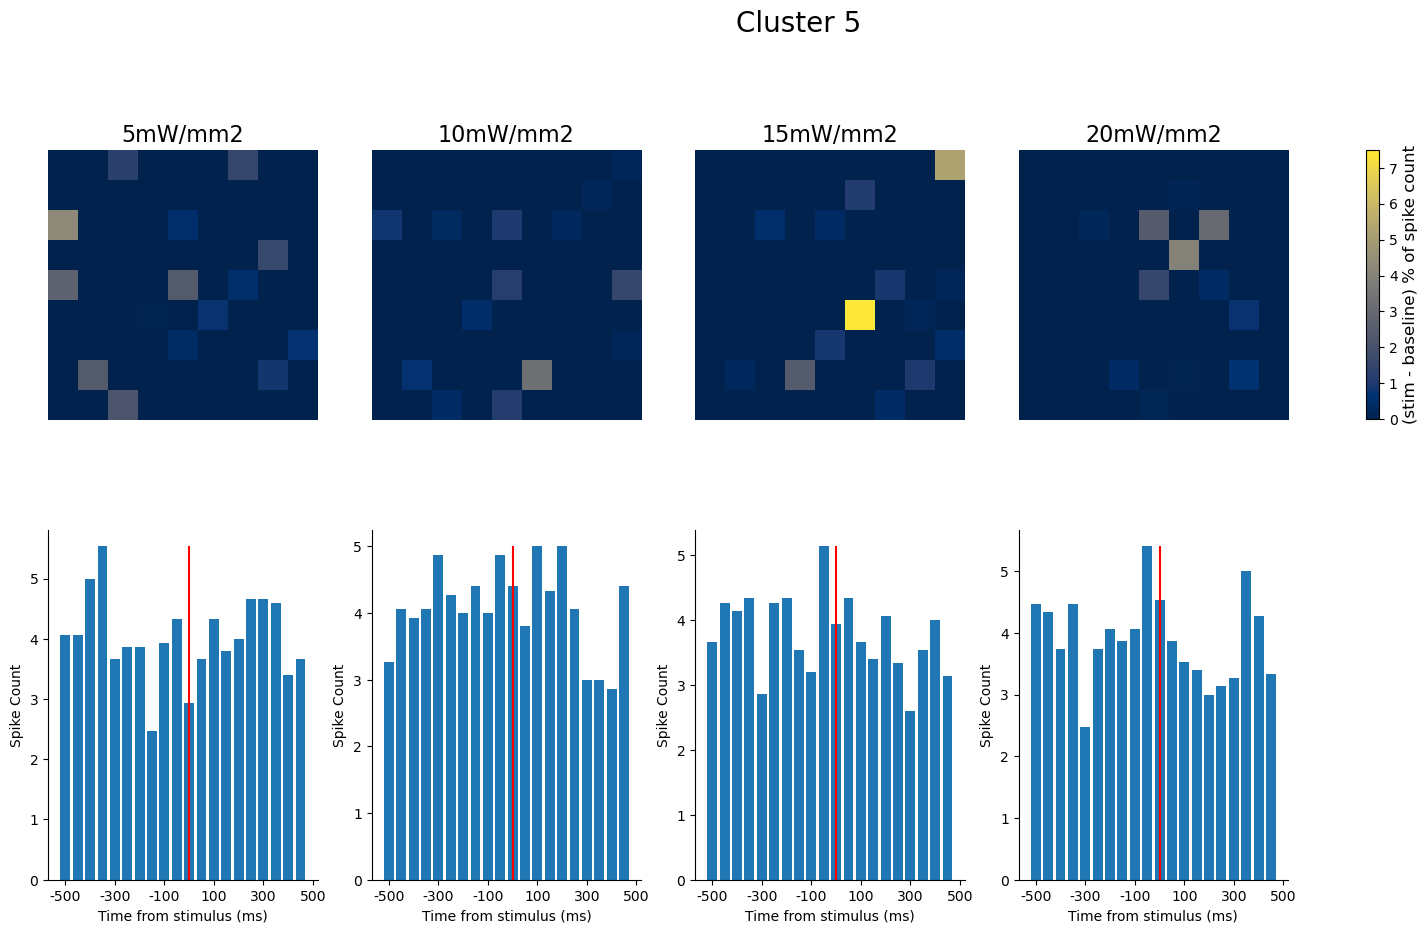

0.8666666666666653
82.73333333333333
[-6.27118644e-01 -4.28571429e-01  4.54545455e-02 -2.10526316e-01
  3.56857401e-17  1.11111111e-01  3.63636364e-01  5.00000000e-01
  3.57142857e-02 -1.53846154e-01  4.25000000e-01 -2.61904762e-01
 -1.63265306e-01 -2.28571429e-01  1.00000000e+00  5.00000000e-02
 -5.58823529e-01  6.12903226e-01  1.92307692e-01 -3.61111111e-01
 -1.02040816e-01 -3.50000000e-01  1.21052632e+00  3.94736842e-01
  2.90322581e-01 -4.34782609e-02  4.13793103e-01 -5.21739130e-01
  6.19047619e-01  2.01451759e-17  1.22451069e-17 -2.00000000e-01
 -4.50980392e-01  4.00000000e-01  5.71428571e-01  3.18181818e-01]
5.0
74.8
[ 0.27272727  0.31818182 -0.20930233  0.47619048 -0.12903226 -0.46153846
 -0.44736842  0.25        0.89285714 -0.10344828  0.7         0.02941176
 -0.50980392 -0.37142857  0.53333333  0.6         0.625      -0.24324324
  0.6        -0.05128205  0.13793103  0.52       -0.03225806  0.15151515
  0.17857143 -0.35294118  0.30769231 -0.67307692  0.83333333 -0.14705882
  0

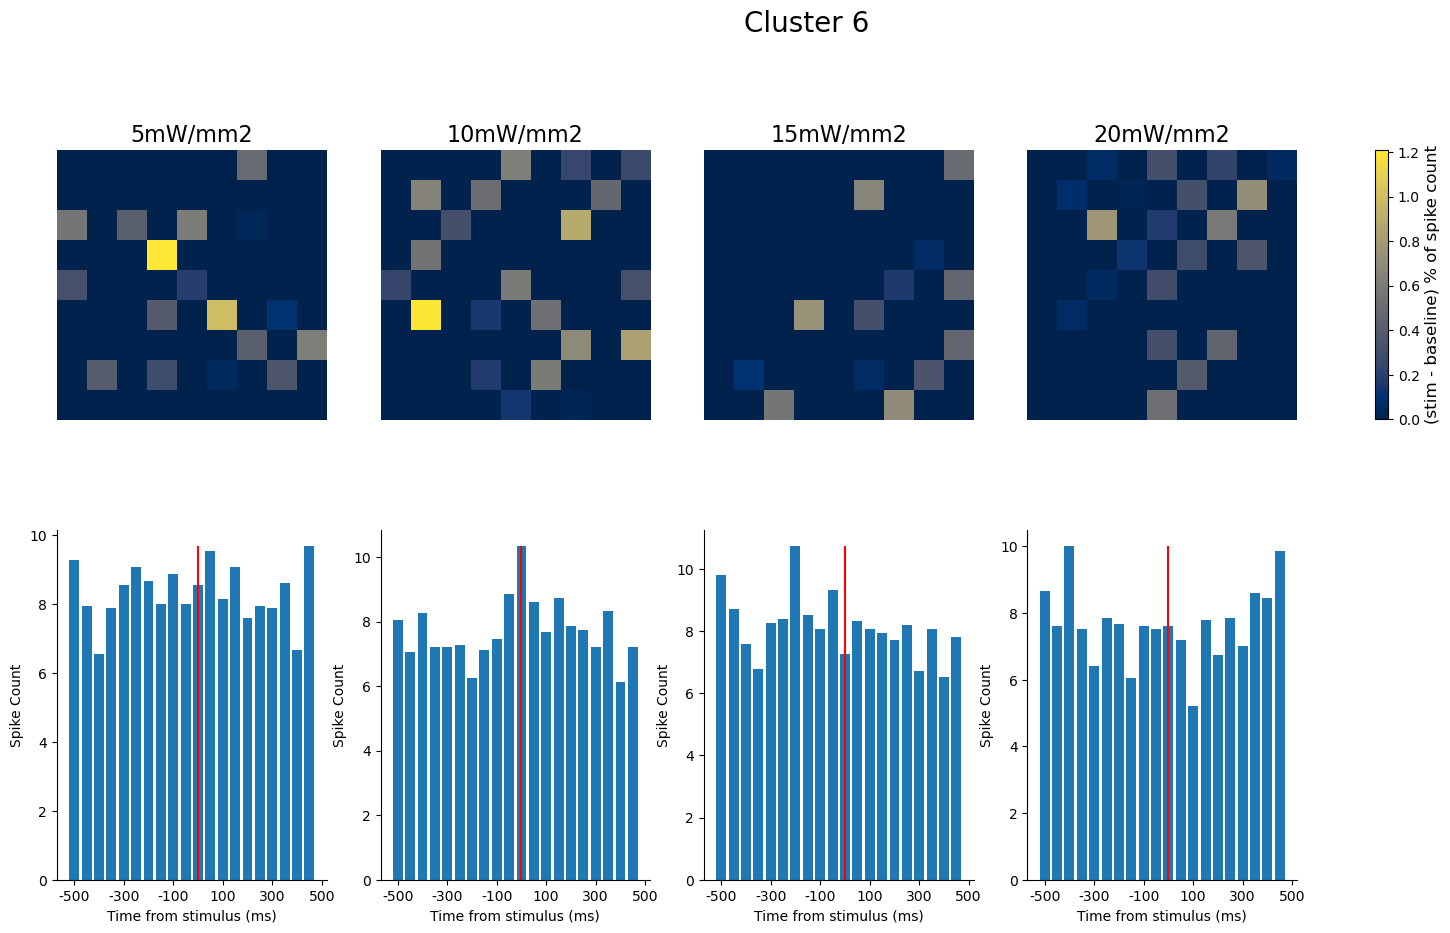

2.0000000000000004
3.8000000000000003
[-1.    0.5    inf  0.     inf   nan -0.5    inf  0.2   1.    1.     nan
 -1.    1.     inf   nan   nan   inf   nan  3.   -0.6  -1.    1.    1.
  0.     inf  0.6    inf  3.    0.   -0.75   nan -1.   -1.     inf  2.  ]
-1.6666666666666667
6.133333333333334
[        inf         inf -1.          0.         -1.         -0.6
 -0.85714286  4.          0.22222222 -1.         -0.66666667 -1.
 -1.          2.          0.          1.          0.5        -0.25
  0.         -0.33333333  1.                 nan -1.         -0.75
         inf  0.         -1.         -1.          0.                 inf
         nan         inf  0.5        -0.66666667 -0.66666667  0.        ]
-1.8666666666666665
7.2
[        inf -0.07692308 -1.         -0.5        -1.         -1.
  0.66666667 -0.5        -0.55555556  1.         -0.66666667  0.
  0.         -0.8                inf -1.          3.         -0.6
 -0.66666667         nan -0.75       -0.5                inf         inf
 

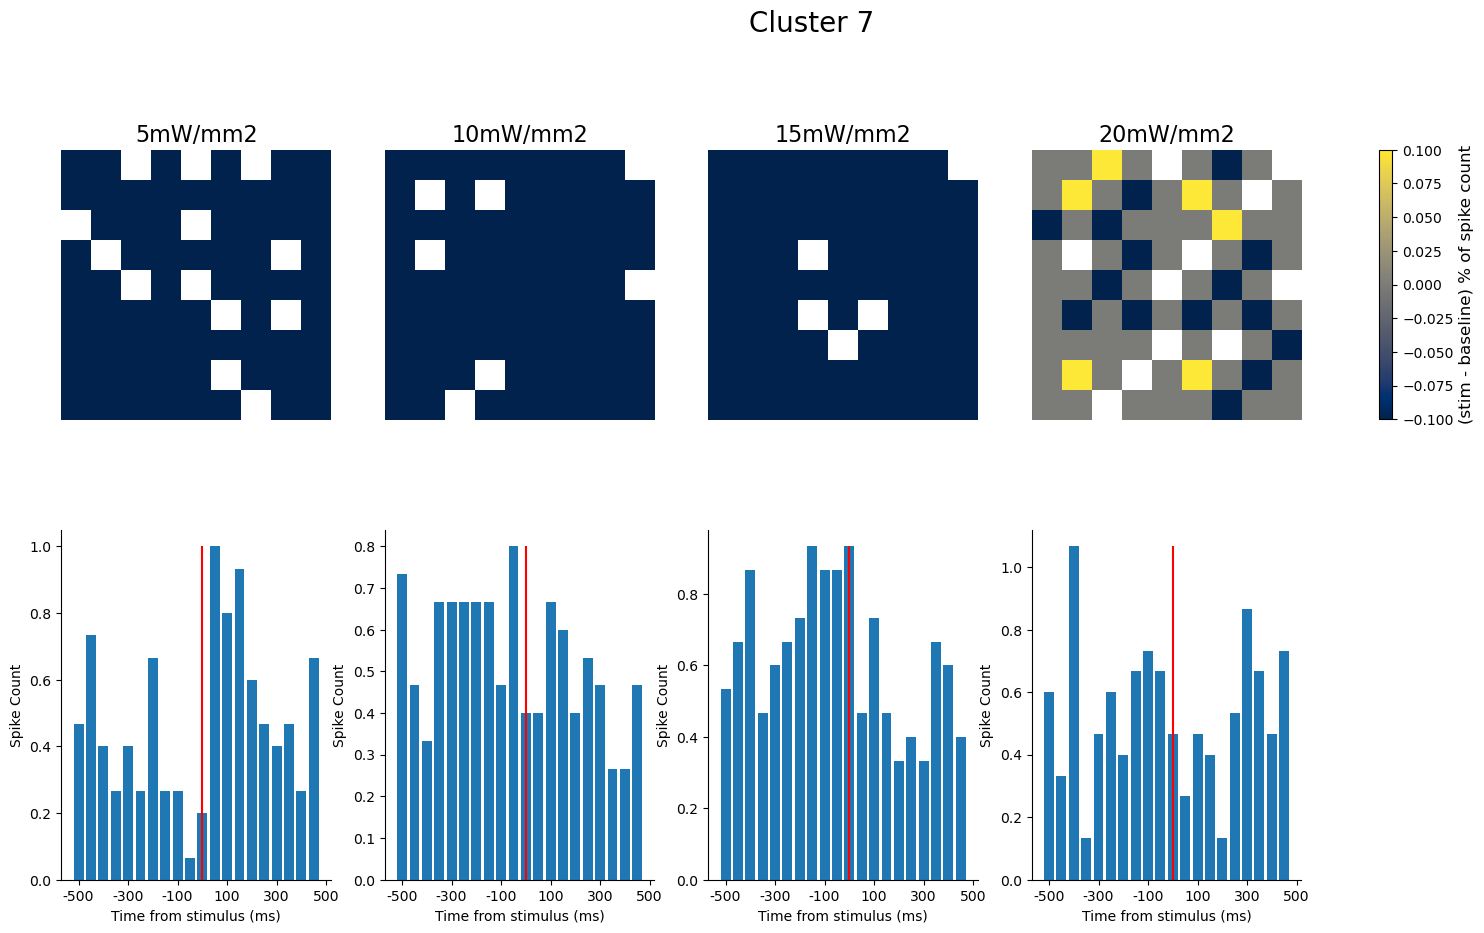

4.996003610813204e-16
77.53333333333332
[-3.33333333e-01 -2.10526316e-01  1.07142857e-01  9.68217754e-18
 -2.90322581e-01  1.92307692e-01  3.68421053e-01  1.05263158e+00
  1.48148148e-01  1.30434783e-01  5.00000000e-01 -3.04347826e-01
 -2.27272727e-01 -4.87804878e-02  1.07142857e-01 -2.34042553e-01
  3.70370370e-02  2.58064516e-01 -2.77555756e-17 -4.35897436e-01
  2.77777778e-02 -8.33333333e-02  1.04761905e+00  6.45161290e-02
  7.31707317e-02 -9.37500000e-02  7.31707317e-02 -3.07692308e-01
  1.70731707e-01 -8.57142857e-02 -6.45161290e-02  9.33333333e-01
 -2.12121212e-01 -1.78571429e-01  1.48148148e-01 -1.00000000e-01]
-0.1333333333333347
75.39999999999999
[-2.30769231e-01  1.53846154e-01  6.80000000e-01  4.13793103e-01
 -4.82758621e-01 -2.00000000e-01 -3.14285714e-01 -1.94444444e-01
 -1.19047619e-01 -3.22580645e-02  1.48148148e-01 -2.16216216e-01
 -1.17647059e-01 -2.14285714e-01  5.88235294e-02  1.04347826e+00
  3.70370370e-01 -1.89189189e-01  3.12500000e-01  1.21212121e-01
  2.5806451

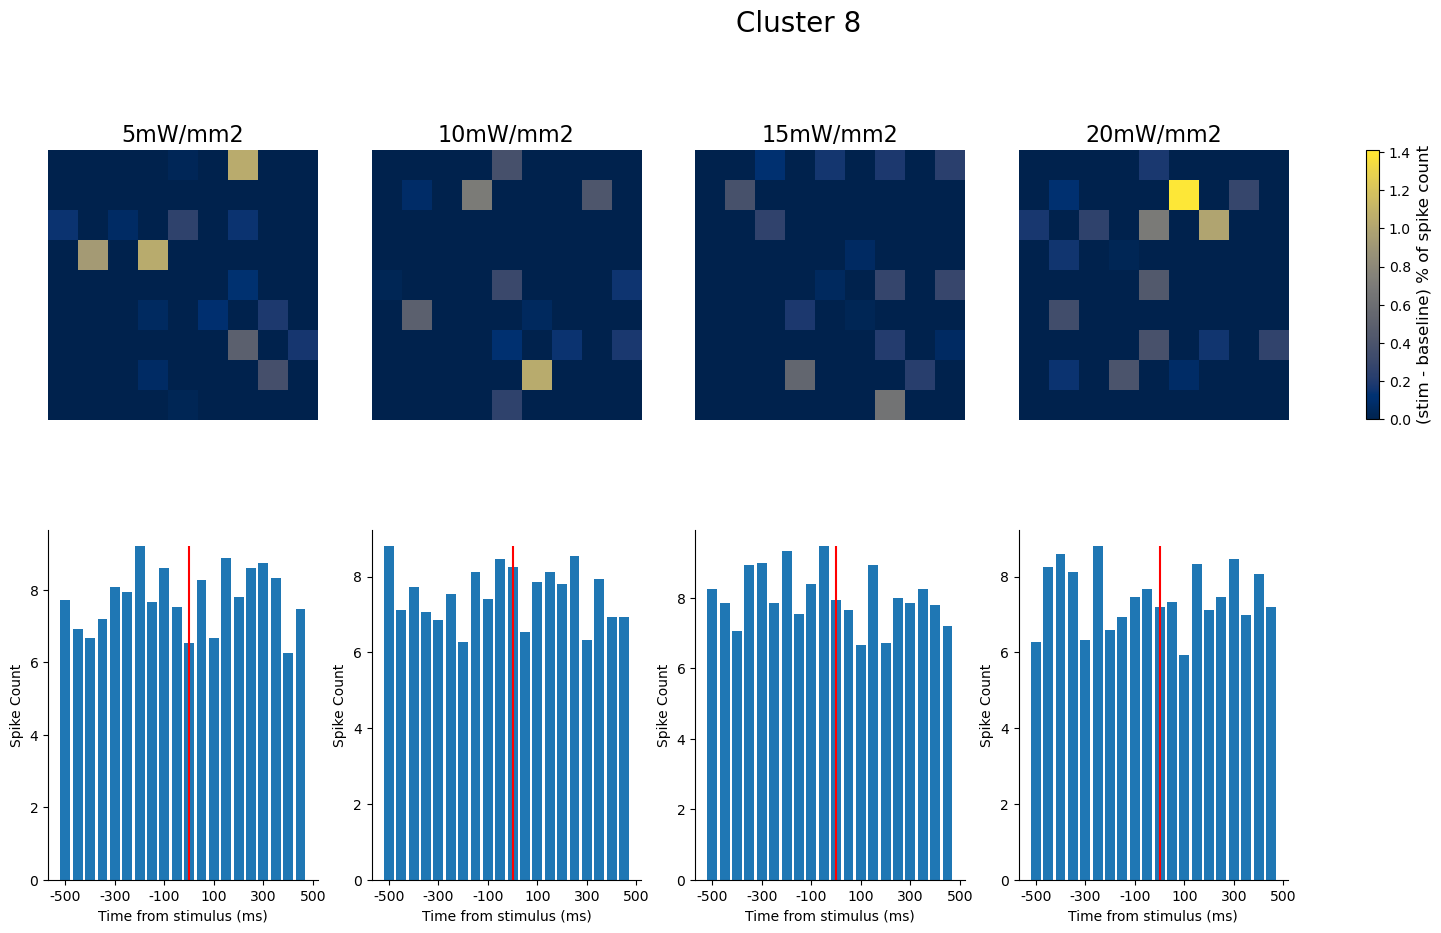

-0.46666666666666673
5.866666666666665
[-0.85714286 -0.77777778 -0.5        -0.5                inf -0.57142857
  0.5                inf -1.         -1.          3.          0.
 -0.5         3.                 inf         inf -1.          0.5
 -1.          1.         -0.375       2.                 nan         inf
  0.          2.          0.25        0.5         6.                 nan
 -0.85714286         inf -1.          3.                 inf         inf]
2.266666666666667
4.466666666666668
[        inf  1.          2.          3.                 inf -0.5
  1.                 inf  1.5         2.         -0.5         0.
 -1.         -1.                 inf         inf  2.5         2.
  0.25        1.5        -0.75               inf  4.          0.25
         inf         inf  0.33333333         inf -1.          0.5
  3.                 inf         inf  0.         -1.          0.        ]
-2.066666666666667
8.133333333333333
[-1.          8.                 inf -1.                 inf 

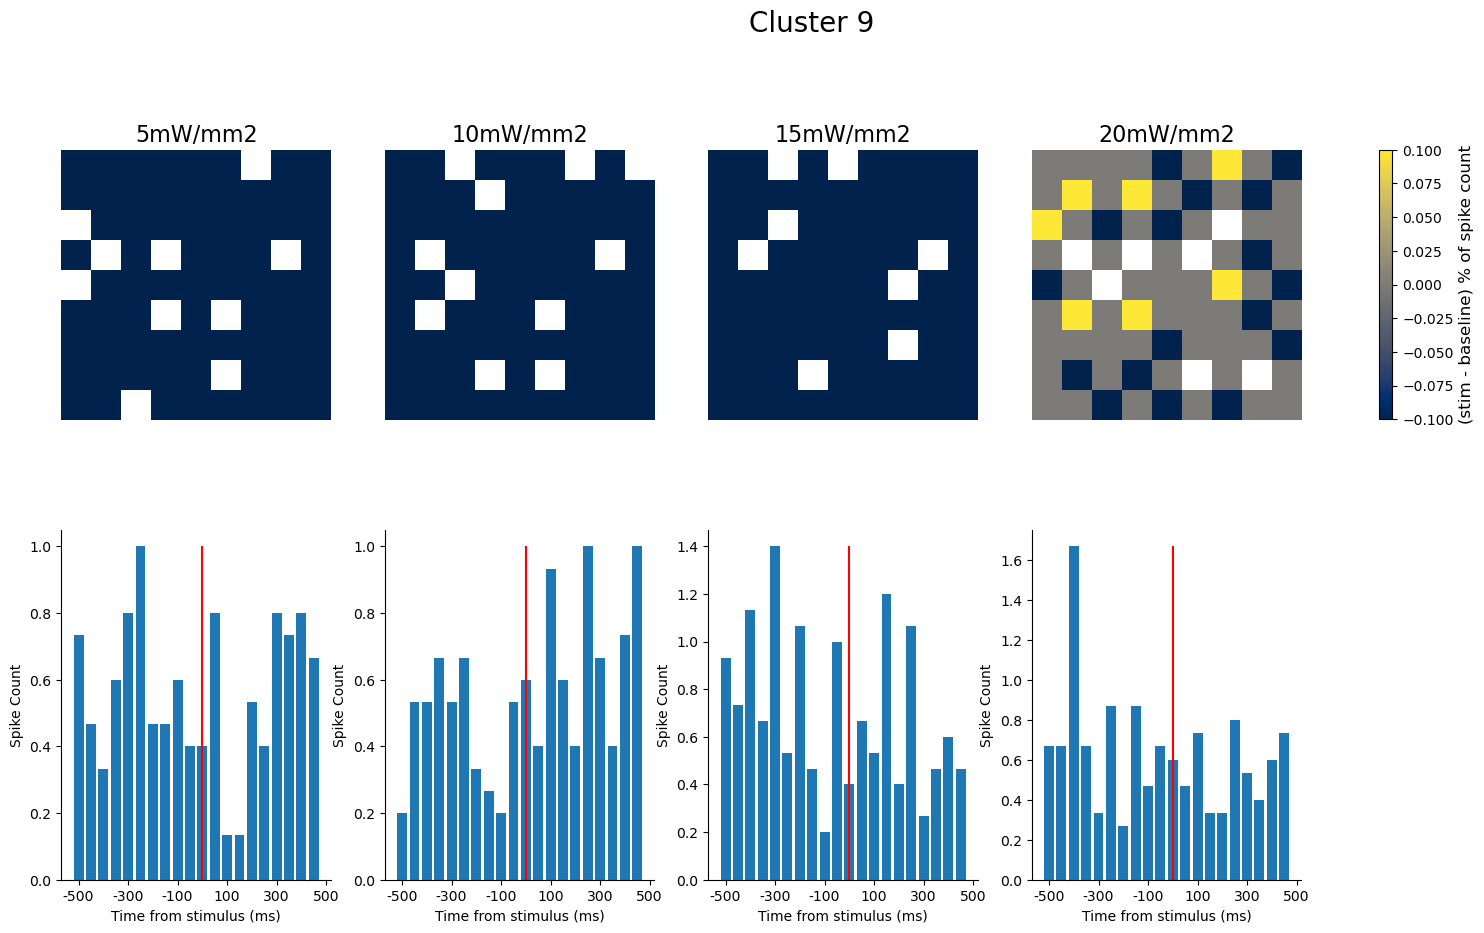

1.5333333333333337
32.800000000000004
[-8.88888889e-01 -7.69230769e-01  1.11111111e-01 -6.31578947e-01
  6.25000000e-01  1.57142857e+00  0.00000000e+00  5.00000000e-01
  2.85714286e-01 -6.00000000e-01  1.53846154e-01 -6.66666667e-01
 -7.36842105e-01  1.83333333e+00  2.33333333e+00  2.50000000e-01
 -2.50000000e-01  4.20000000e+00  1.00000000e+00  1.42857143e-01
 -4.16666667e-02 -5.86206897e-01  1.05263158e-01  1.87500000e+00
 -1.00000000e-01  1.00000000e+00 -1.11111111e-01 -6.52173913e-01
  1.50000000e+00  1.04083409e-16  3.67353207e-17 -6.66666667e-01
 -4.11764706e-01  8.18181818e-01  4.28571429e-01  7.66666667e+00]
5.733333333333333
27.86666666666667
[ 2.85714286e-01 -5.00000000e-01  8.18181818e-01  7.27272727e-01
 -1.57894737e-01 -2.30769231e-01 -8.00000000e-01  3.33333333e-01
  2.00000000e+00 -3.33333333e-01  6.66666667e-01  2.85714286e-01
 -6.52173913e-01 -6.66666667e-01 -5.00000000e-01  2.80000000e+00
  2.11111111e+00  1.81818182e-01  2.00000000e+00  4.00000000e-01
 -7.14285714e-0

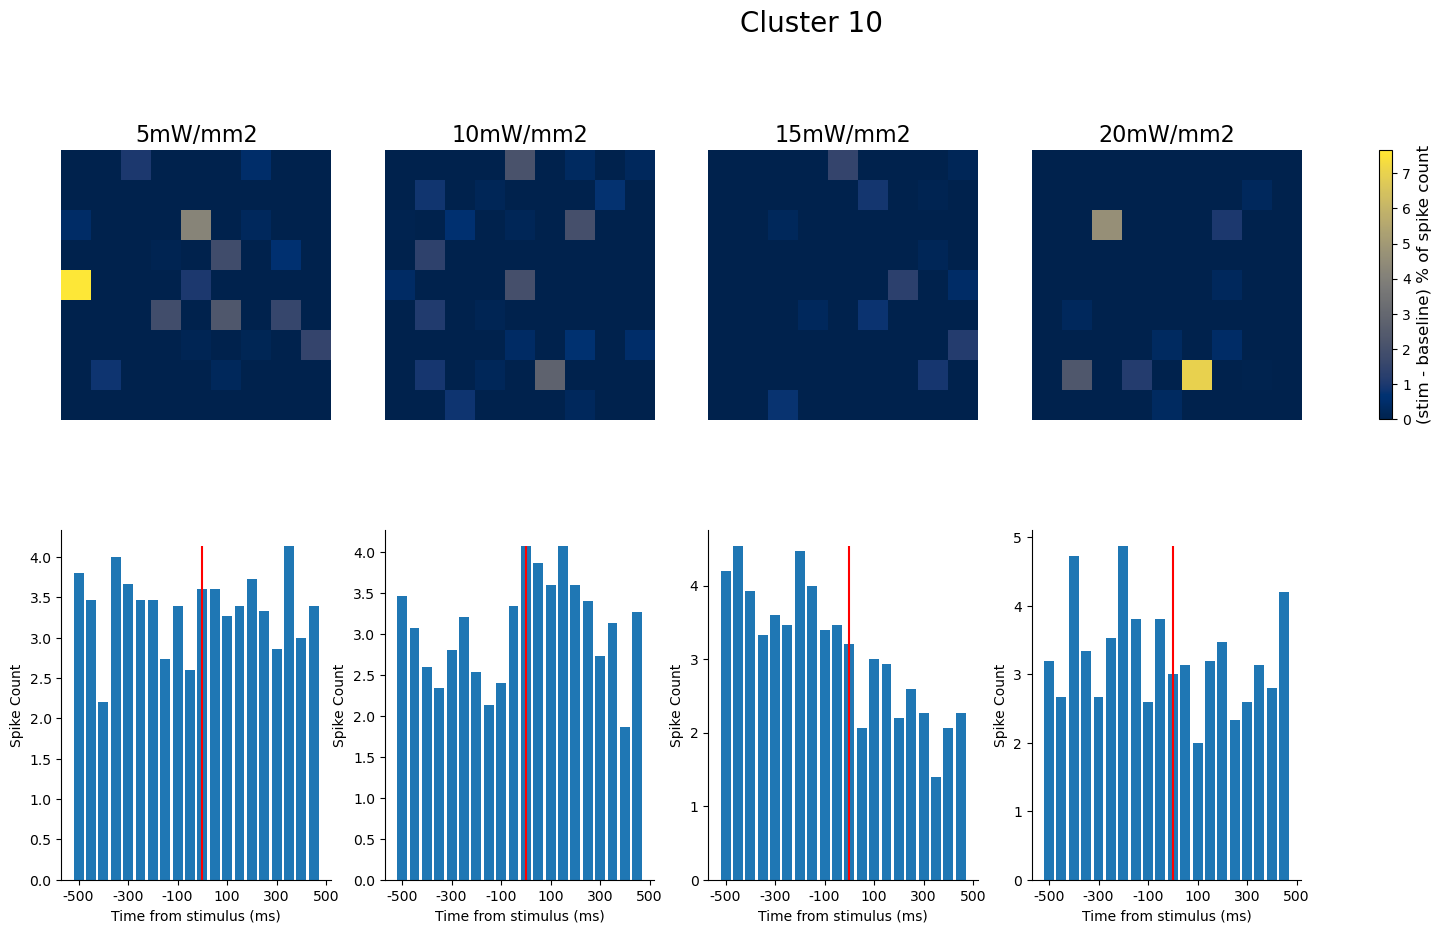

-0.7333333333333332
142.66666666666669
[-0.25373134 -0.11111111  0.28       -0.015625   -0.32432432 -0.21311475
 -0.03571429  0.3125      0.15789474 -0.13235294  0.01785714 -0.1
 -0.15277778 -0.17073171  0.03508772  0.15151515 -0.03225806  0.18965517
 -0.03636364 -0.17460317 -0.20338983 -0.11290323  0.21276596  0.13636364
  0.01587302  0.04761905  0.2745098  -0.10144928  0.03703704  0.12068966
  0.03174603  0.29411765 -0.046875   -0.2         0.30555556  0.17857143]
2.6666666666666674
138.73333333333335
[ 0.05        0.475      -0.08196721  0.375       0.04       -0.31578947
 -0.39130435 -0.11842105 -0.04        0.35416667  0.33333333  0.20408163
  0.02531646 -0.27941176  0.16        0.22222222  0.13114754  0.03703704
  0.          0.1754386  -0.03571429 -0.01886792 -0.01666667 -0.09615385
  0.40983607 -0.21111111 -0.07272727 -0.29032258  0.18181818  0.01449275
 -0.125       0.16981132  0.13207547  0.05263158  0.02173913 -0.13095238]
-2.933333333333335
147.93333333333334
[ 4.28571429e-

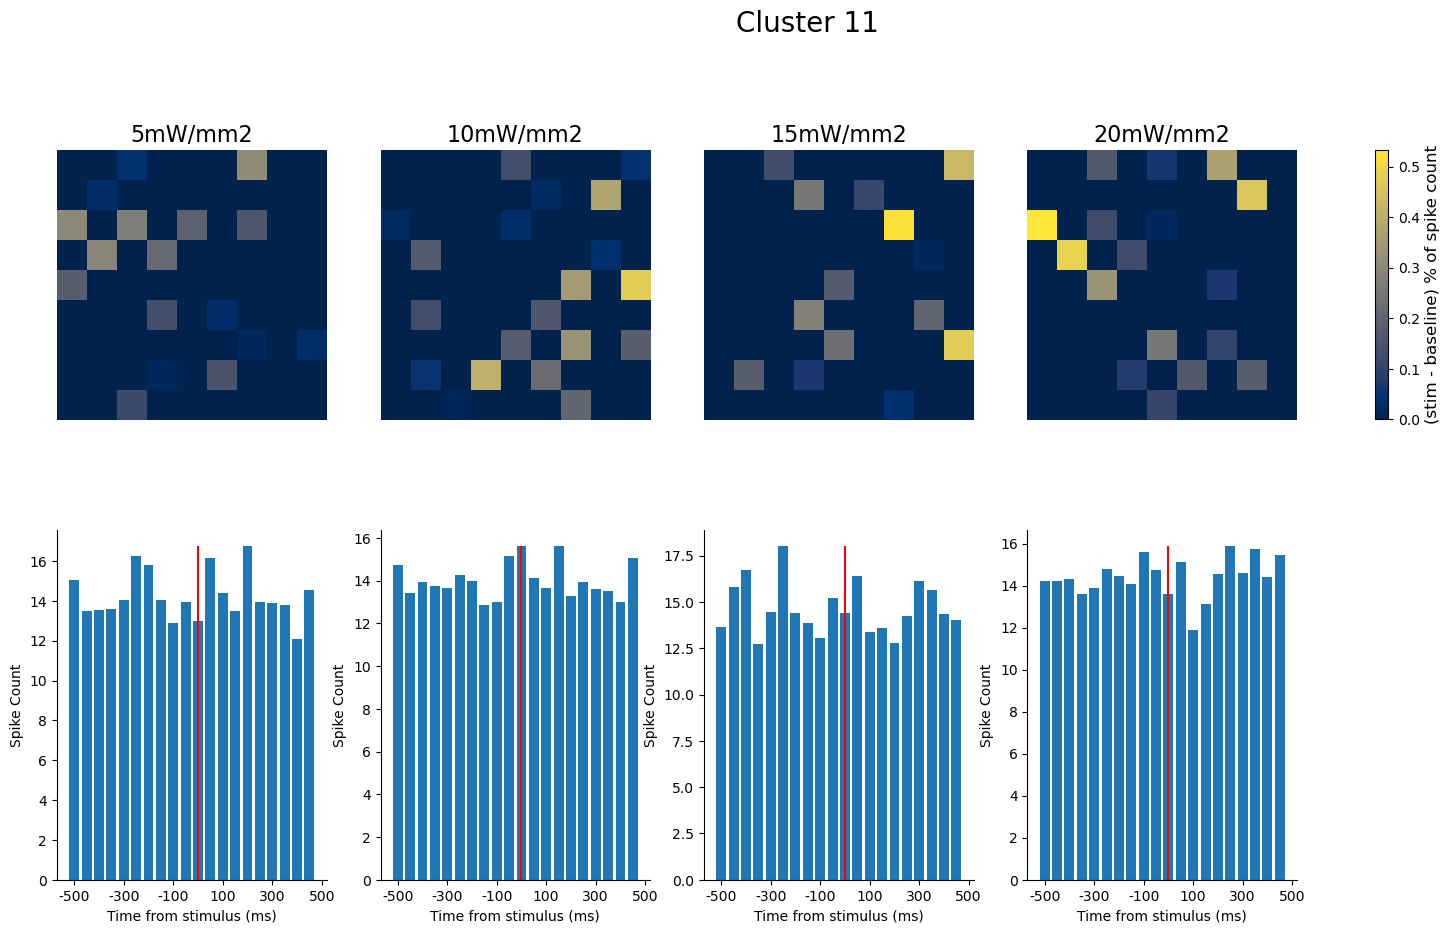

1.533333333333331
403.53333333333336
[-2.44444444e-01 -9.58083832e-02  7.79220779e-02  1.29629630e-01
 -1.50000000e-01  2.92397661e-02  7.73480663e-02  5.90163934e-01
  6.84931507e-03 -1.20218579e-01  4.81927711e-02 -3.50877193e-02
  1.01522843e-02 -2.99180328e-01  6.47058824e-02  1.10552764e-01
 -5.47945205e-02  5.78034682e-03  1.77514793e-01 -1.87878788e-01
 -8.79120879e-02  2.81690141e-02 -1.02167763e-17  5.88235294e-02
  3.82812500e-01  1.33333333e-02  1.78807947e-01 -2.46376812e-01
  6.83229814e-02 -1.14285714e-02  6.13496933e-03  3.13043478e-01
 -9.60451977e-02 -2.57575758e-01  1.56462585e-01  1.49068323e-01]
0.866666666666672
400.66666666666663
[-0.02013423  0.34166667 -0.01149425 -0.02424242 -0.12962963 -0.24444444
 -0.16233766 -0.0106383   0.03378378  0.09090909  0.13513514  0.41780822
 -0.08032129 -0.14723926  0.04519774  0.02994012  0.05454545 -0.02409639
 -0.16346154  0.36956522 -0.07594937  0.14925373 -0.05732484 -0.08241758
 -0.05319149 -0.29081633 -0.00598802 -0.23214286

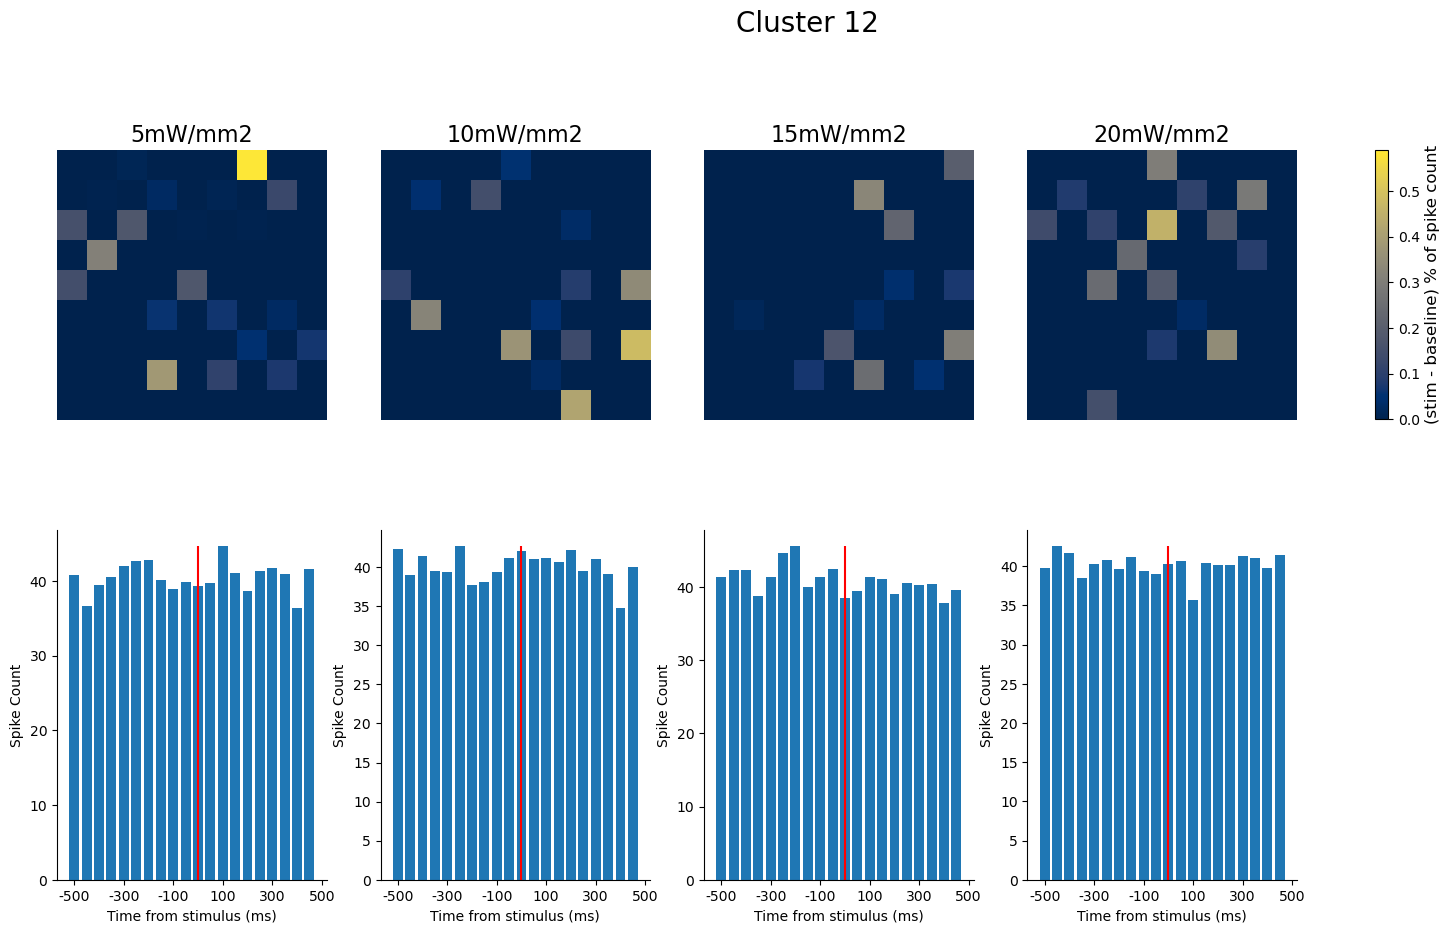

0.4000000000000001
3.266666666666667
[-1.00000000e+00  1.00000000e+00             nan -6.66666667e-01
  3.00000000e+00             inf  1.38777878e-16             inf
  0.00000000e+00 -1.00000000e+00             inf -1.00000000e+00
  1.00000000e+00  0.00000000e+00             inf -1.00000000e+00
 -1.00000000e+00  3.00000000e+00             nan  1.00000000e+00
  1.00000000e+00 -7.14285714e-01             inf -5.00000000e-01
             nan             inf  0.00000000e+00 -1.00000000e+00
  4.00000000e+00             nan -1.00000000e+00             nan
 -8.57142857e-01             inf  0.00000000e+00  0.00000000e+00]
0.3333333333333335
2.7333333333333334
[            inf             nan -1.00000000e+00 -1.00000000e+00
  1.00000000e+00 -5.00000000e-01  6.93889390e-17             inf
  1.00000000e+00 -1.00000000e+00             inf             nan
 -1.00000000e+00             nan             nan             inf
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
             i

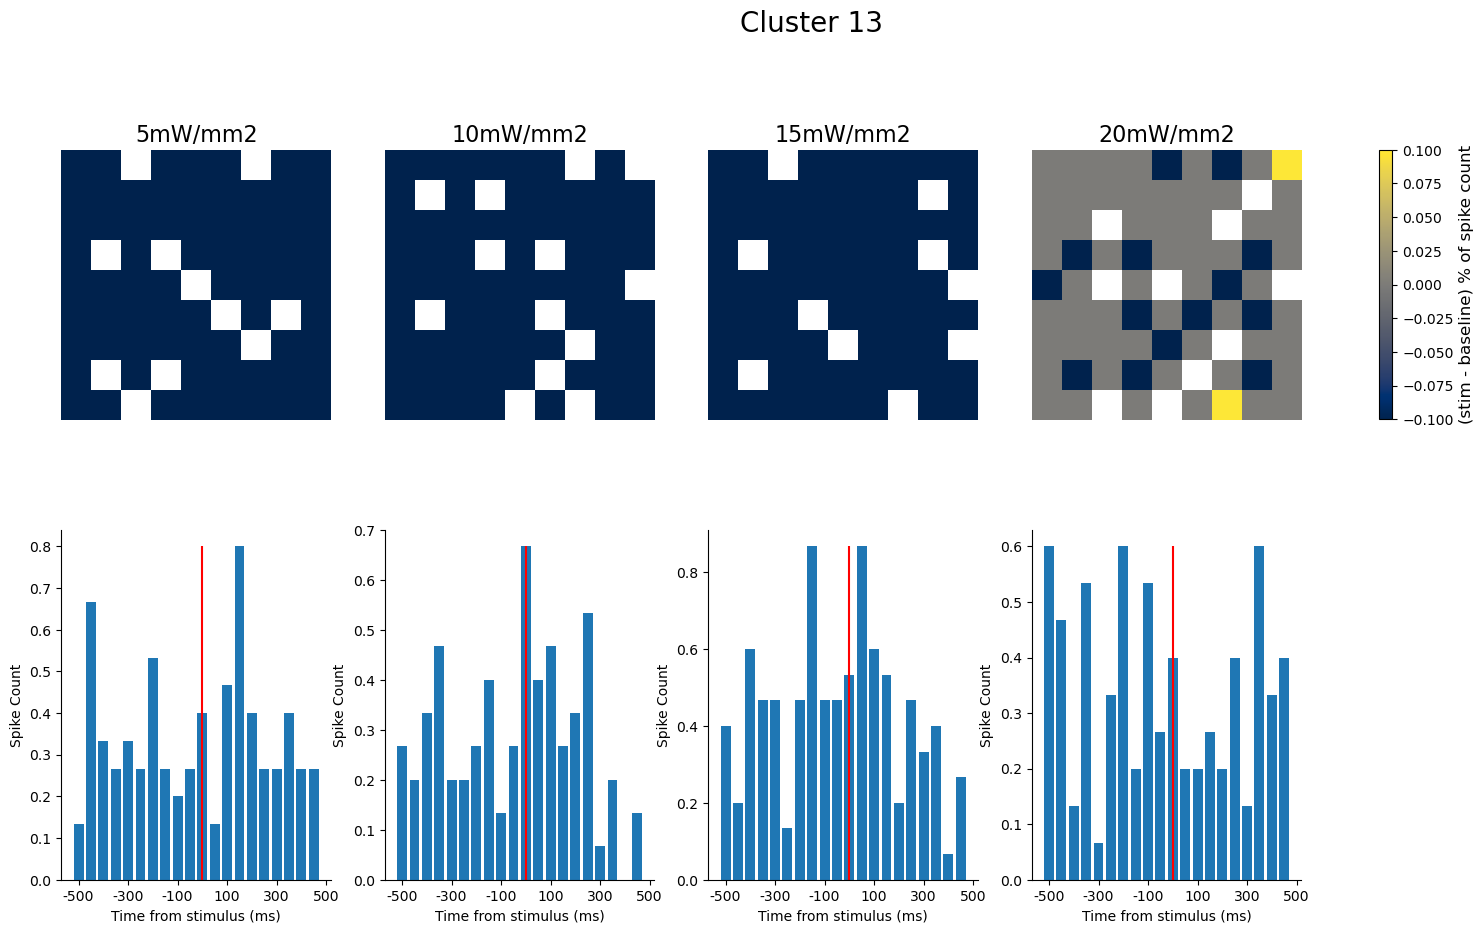

1.7333333333333336
9.600000000000001
[-1.00000000e+00  2.00000000e+00  0.00000000e+00 -5.00000000e-01
             inf             nan             inf             inf
  1.00000000e+01 -7.77777778e-01  1.00000000e+00  4.00000000e+00
 -5.00000000e-01             nan             inf -6.00000000e-01
  5.00000000e-01  5.00000000e-01 -8.69565217e-01 -7.50000000e-01
 -5.00000000e-01  0.00000000e+00 -7.50000000e-01 -5.20417043e-17
  6.66666667e-01 -5.71428571e-01 -8.00000000e-01             inf
             inf             nan  3.00000000e+00 -1.00000000e+00
  4.28571429e-01 -2.50000000e-01             inf  3.00000000e+00]
2.666666666666666
8.400000000000002
[-0.6         4.         -0.78947368         inf         nan         nan
 -1.         -0.4         3.         -0.4        -0.5                inf
  4.         -1.                 inf         inf  3.83333333         inf
  7.5         2.         -0.4         0.         -0.66666667         inf
 -0.83333333  3.         -1.          0.5        

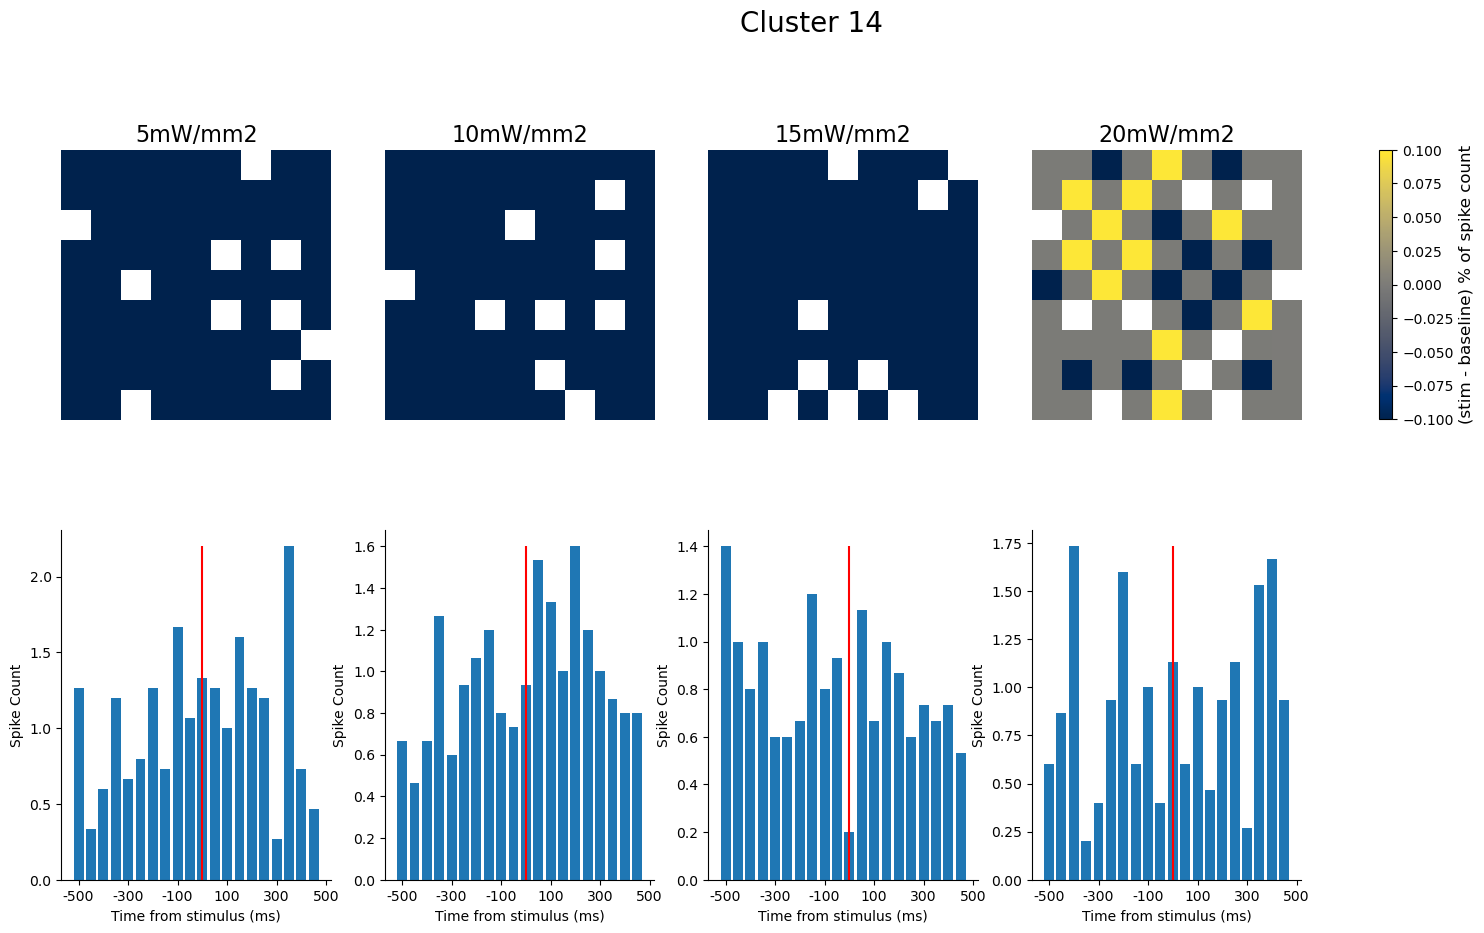

0.26666666666666616
53.800000000000004
[-4.16666667e-01  2.30769231e-01  4.38245931e-17 -3.03030303e-02
 -2.85714286e-01 -2.00000000e-01  2.85714286e-01 -3.84615385e-02
  6.66666667e-01 -3.33333333e-01  0.00000000e+00 -1.00000000e-01
 -6.66666667e-01 -4.58333333e-01  1.00000000e+00  2.66666667e-01
  2.77777778e-01  1.00000000e+00 -3.50000000e-01  1.29032258e-01
 -4.13043478e-01 -4.48275862e-01  6.66666667e-01  1.63636364e+00
 -2.91666667e-01  5.00000000e+00  2.25806452e-01 -4.07407407e-01
  8.57142857e-01 -4.16666667e-02  1.72413793e-01 -2.85714286e-01
 -4.61538462e-01 -2.58064516e-01  1.50000000e+00  5.55555556e-02]
2.8000000000000007
45.99999999999999
[-2.22222222e-01 -6.25000000e-02 -5.00000000e-01 -8.69565217e-02
 -1.42857143e-01 -7.36842105e-01 -6.36363636e-01  4.28571429e-01
  9.23076923e-01 -2.50000000e-01  1.50000000e+00 -5.00000000e-01
  0.00000000e+00  9.09090909e-02  1.00000000e+00  8.00000000e+00
  1.73333333e+00 -2.94117647e-01  2.35294118e-01 -1.85185185e-01
  1.25000000e

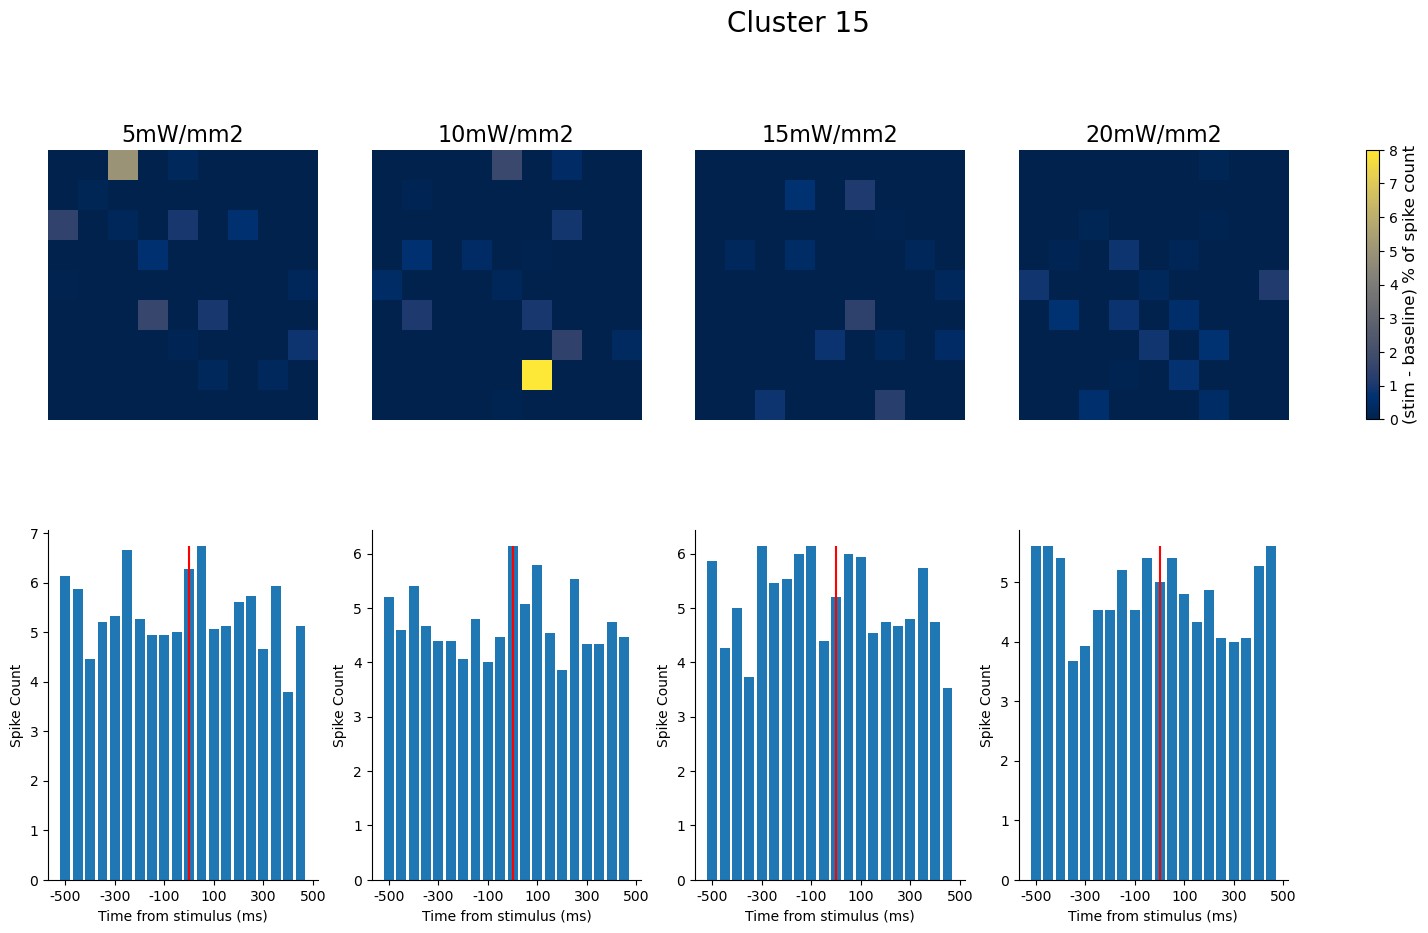

2.8666666666666667
19.73333333333333
[-4.16666667e-01 -6.00000000e-01  4.00000000e-01 -4.41176471e-01
  2.00000000e-01  3.33333333e-01  2.00000000e+00  3.33333333e+00
  3.66666667e+00  0.00000000e+00  2.50000000e-01  3.33333333e-01
 -6.15384615e-01  2.00000000e+00  5.00000000e-01 -4.00000000e-01
  5.00000000e-01  4.28571429e-01  3.25000000e+00  7.00000000e+00
  3.52941176e-01 -5.50000000e-01 -7.50000000e-01  1.25000000e+00
  3.75000000e-01  7.00000000e-01  6.00000000e-01  1.00000000e+00
  4.00000000e-01 -1.66666667e-01  2.31296463e-17 -5.55555556e-01
 -5.00000000e-01  2.20000000e+00  1.42857143e-01 -4.28571429e-01]
-1.2666666666666664
20.86666666666667
[ 1.00000000e+00 -4.00000000e-01 -4.28571429e-01 -7.85714286e-01
 -8.00000000e-01 -5.55555556e-01 -8.88888889e-01  1.32469793e-16
  2.60000000e+00 -6.66666667e-01  8.57142857e-01  3.00000000e+00
 -1.66666667e-01  2.00000000e-01  5.00000000e+00  2.25000000e+00
  6.36363636e-01 -3.33333333e-01  1.25000000e-01 -5.00000000e-01
  1.25000000e+

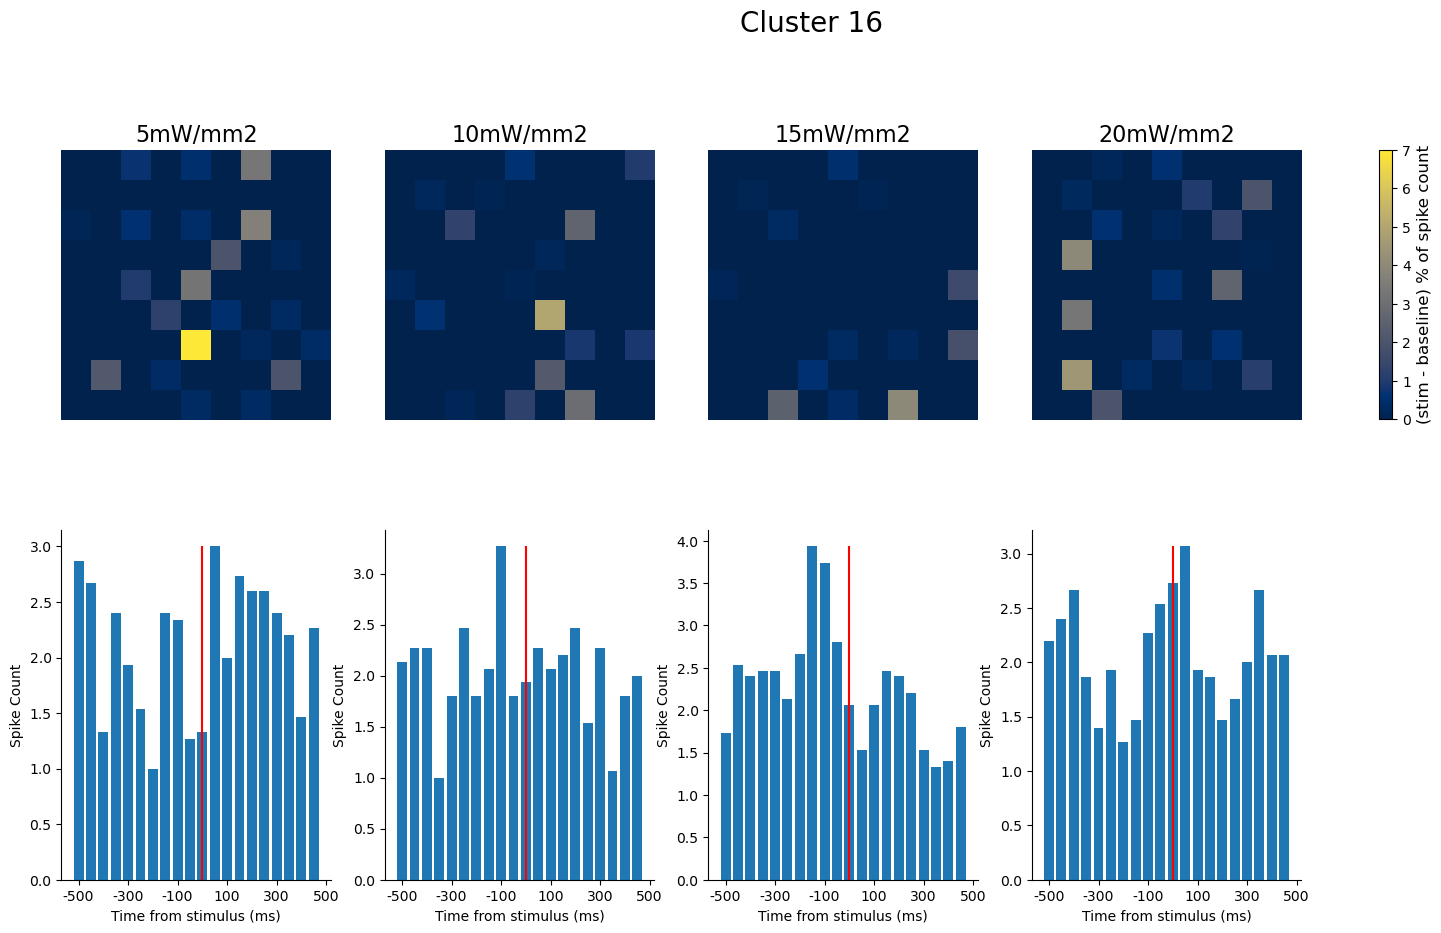

-0.33333333333333354
97.86666666666669
[-0.20512821  0.53846154  0.18421053  0.85294118  0.24137931 -0.04761905
 -0.42857143  1.24        0.52631579  0.19354839  0.67857143 -0.18965517
  0.12820513 -0.2295082   0.25       -0.02631579  0.17391304 -0.29545455
 -0.36734694 -0.08108108  0.08333333 -0.203125    1.10526316 -0.30508475
 -0.0862069   0.175       0.45238095 -0.15       -0.35087719 -0.45454545
  0.14705882 -0.12820513 -0.2        -0.53333333 -0.1875      0.13636364]
-2.0
91.66666666666666
[-0.36956522  0.22857143 -0.09302326  0.46875     0.28571429 -0.53333333
 -0.63333333  0.31818182  2.14285714  0.08333333  0.08        1.41666667
  0.24390244 -0.15384615 -0.28571429  1.03846154  0.21875    -0.25490196
 -0.22727273 -0.17073171  0.3125     -0.4        -0.18421053 -0.31818182
  0.22727273 -0.40677966  0.05263158 -0.3         0.07272727  0.18604651
 -0.03333333  0.12765957 -0.12765957 -0.15384615 -0.24324324 -0.4       ]
-0.7333333333333326
94.6
[-1.11111111e-01  1.41130046e-17  6

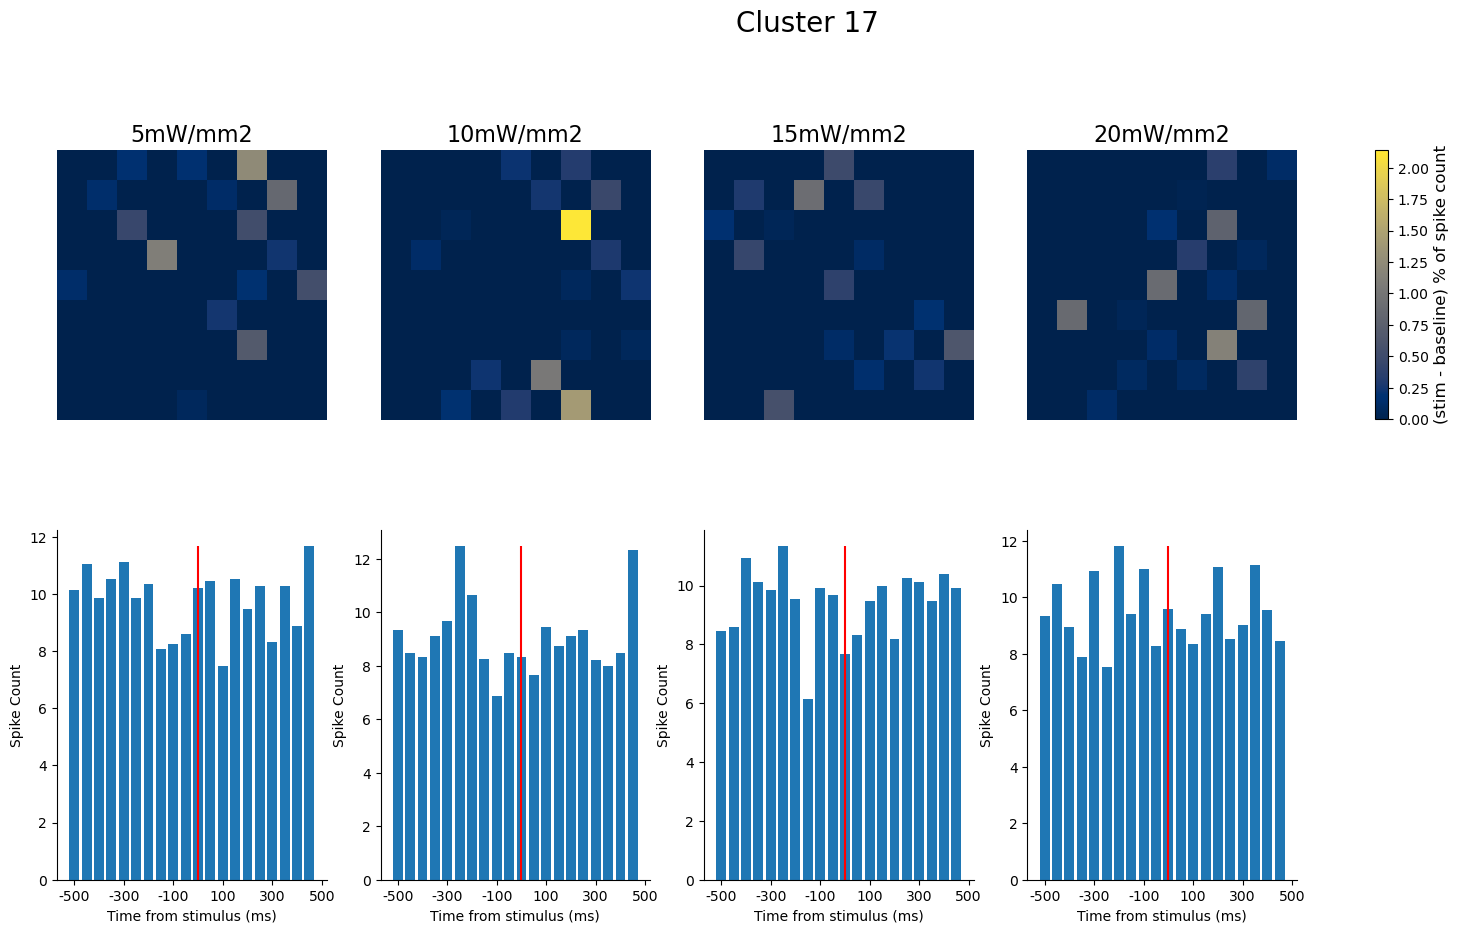

0.6666666666666667
1.9333333333333333
[-1.          0.                 inf  2.         -1.                 nan
  0.                 inf         inf         inf         inf         nan
 -1.                 nan         inf         nan         nan         inf
         inf  1.         -0.75       -0.33333333 -1.                 inf
         inf         inf -1.                 nan         inf         nan
  0.                 inf -0.66666667         nan         inf         inf]
5.551115123125783e-17
2.8
[  nan   inf -1.    1.   -1.   -1.     inf   inf   inf -1.     inf   nan
 -1.    0.     nan   inf -0.25   nan   nan -1.     inf   nan   nan   nan
 -1.   -1.   -1.     nan   inf -1.     nan   inf -0.2  -1.   -0.75   nan]
-0.8666666666666663
3.9333333333333336
[            inf -4.00000000e-01             nan -1.00000000e+00
             inf             inf  2.00000000e+00  1.04083409e-16
 -8.00000000e-01 -1.00000000e+00 -1.00000000e+00             inf
  4.00000000e-01  1.00000000e+00 -5.0000000

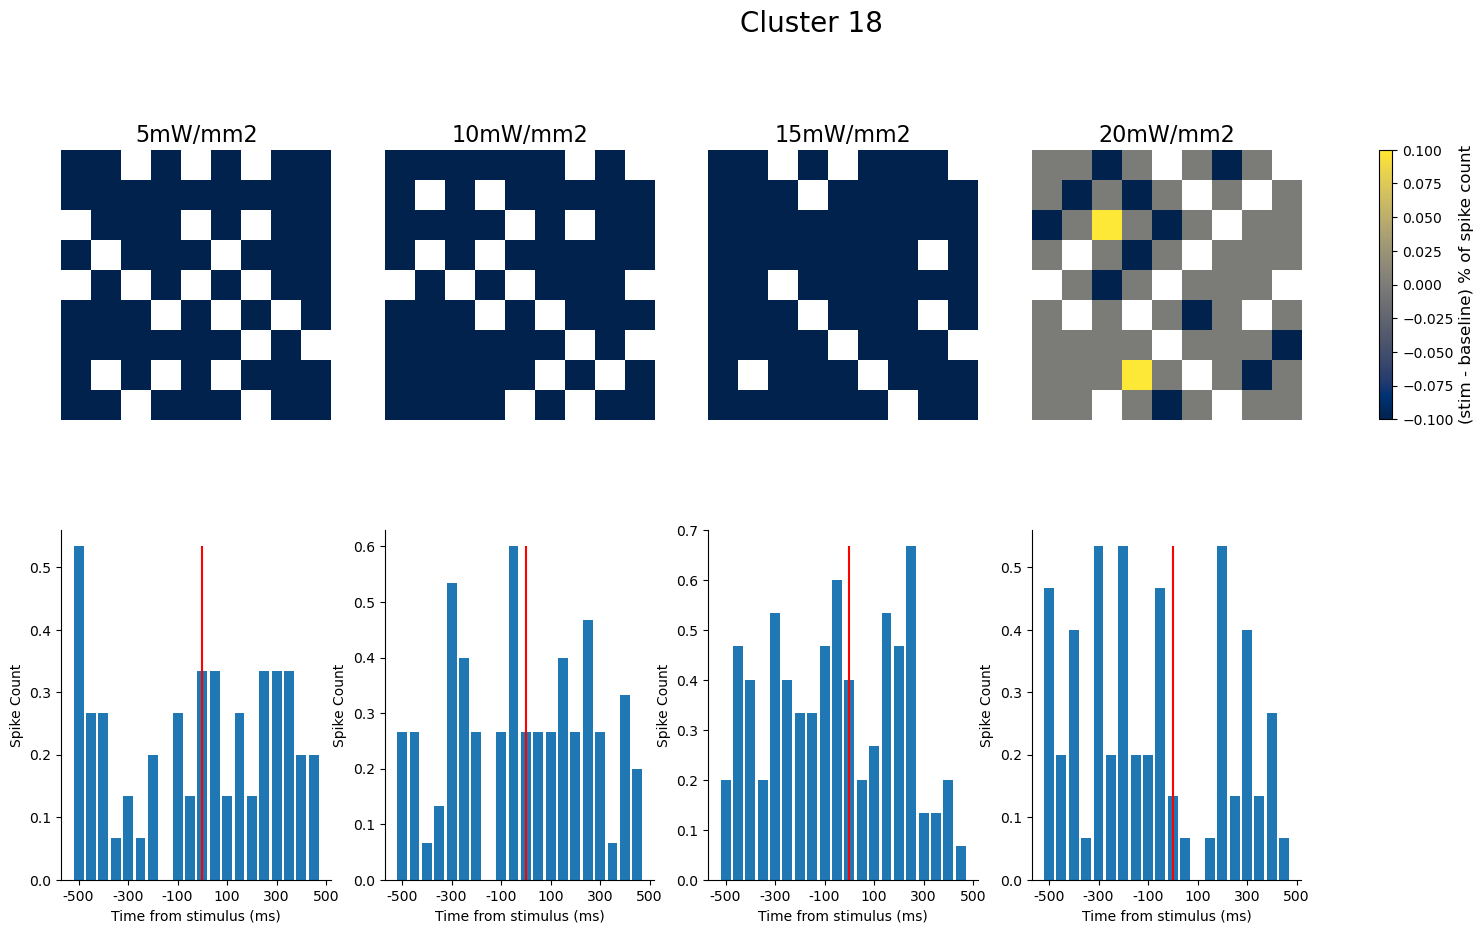

-0.8
80.06666666666666
[-1.84210526e-01 -2.05128205e-01 -3.00000000e-01 -4.81481481e-01
  4.00000000e-01 -1.47058824e-01  4.76190476e-01  8.50000000e-01
 -9.67741935e-02  4.73684211e-01  5.55555556e-02 -3.03030303e-02
  5.90909091e-01  2.42424242e-01  4.16666667e-01 -1.42857143e-01
  3.57142857e-01 -5.40540541e-02 -3.71428571e-01  2.08333333e-01
 -2.00000000e-01 -3.14285714e-01 -1.71428571e-01  6.89655172e-02
 -5.12820513e-02  6.25000000e-02 -1.88679245e-01  1.85185185e-01
  9.67741935e-02 -6.66666667e-02  1.71428571e-01 -4.24242424e-01
 -2.95454545e-01  1.02564103e-01 -2.97381167e-17  8.09523810e-01]
-2.2666666666666666
79.60000000000001
[ 3.03030303e-01 -7.89473684e-02  3.33333333e-02  9.37500000e-02
 -2.85714286e-02  3.12250226e-17 -2.94117647e-01  1.66666667e-01
 -9.09090909e-02 -5.31250000e-01  6.25000000e-02 -2.72727273e-01
 -7.40740741e-02 -1.55555556e-01  2.94117647e-02  2.43902439e-02
  1.14285714e-01  6.92307692e-01 -2.35294118e-01 -2.35294118e-01
  2.22222222e-01 -2.28571429

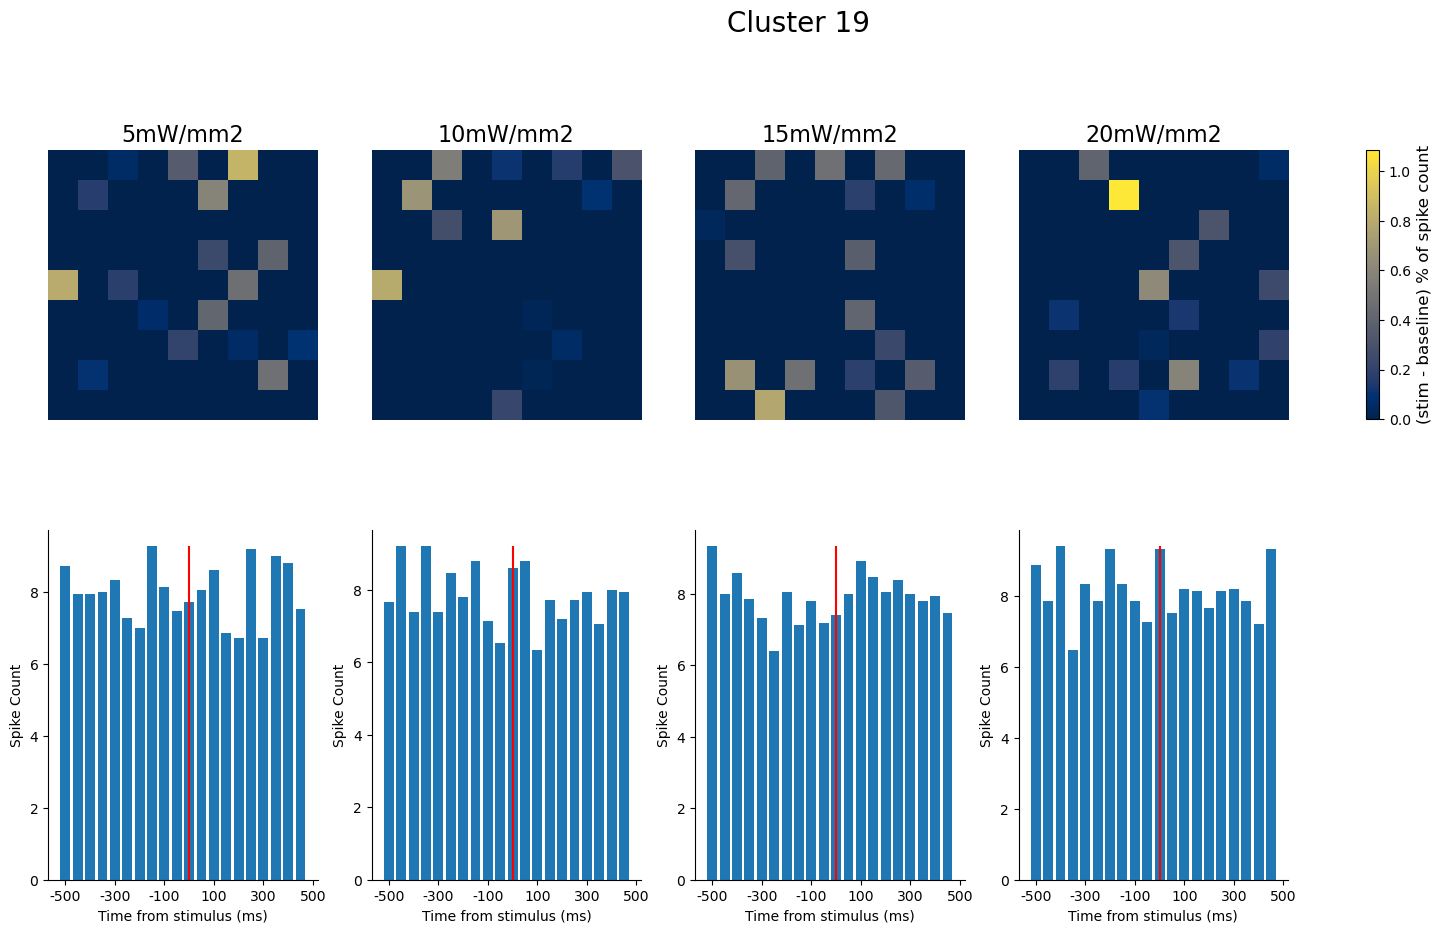

-0.13333333333333341
50.73333333333332
[-1.73913043e-01  1.81014624e-17  9.00000000e-01  1.03448276e-01
 -2.63157895e-01  1.87500000e-01 -1.73913043e-01  4.37500000e-01
  3.21428571e-01 -3.60000000e-01 -1.05263158e-01 -1.36363636e-01
 -2.66666667e-01 -4.54545455e-02  5.00000000e-01  2.50000000e-01
  8.88888889e-01 -9.91270558e-18  2.50000000e-01  0.00000000e+00
 -9.09090909e-02 -3.00000000e-01  3.52941176e-01 -3.70370370e-02
 -1.57894737e-01  5.62500000e-01  4.44444444e-01 -6.41025641e-01
  1.23529412e+00 -2.17391304e-01 -2.59259259e-01 -2.35294118e-01
 -2.59259259e-01 -3.70370370e-01  7.69230769e-02  3.52941176e-01]
1.1999999999999995
50.333333333333336
[-0.31578947 -0.23529412  0.44444444 -0.26086957 -0.47368421 -0.2
 -0.42857143  0.25        0.12       -0.16666667  0.14285714  0.26666667
 -0.11428571 -0.09090909 -0.5         1.16666667  1.33333333 -0.3
  0.82352941  0.46666667  0.11111111  0.5625     -0.33333333 -0.03846154
 -0.08        0.34782609  0.93333333 -0.46666667  0.3333333

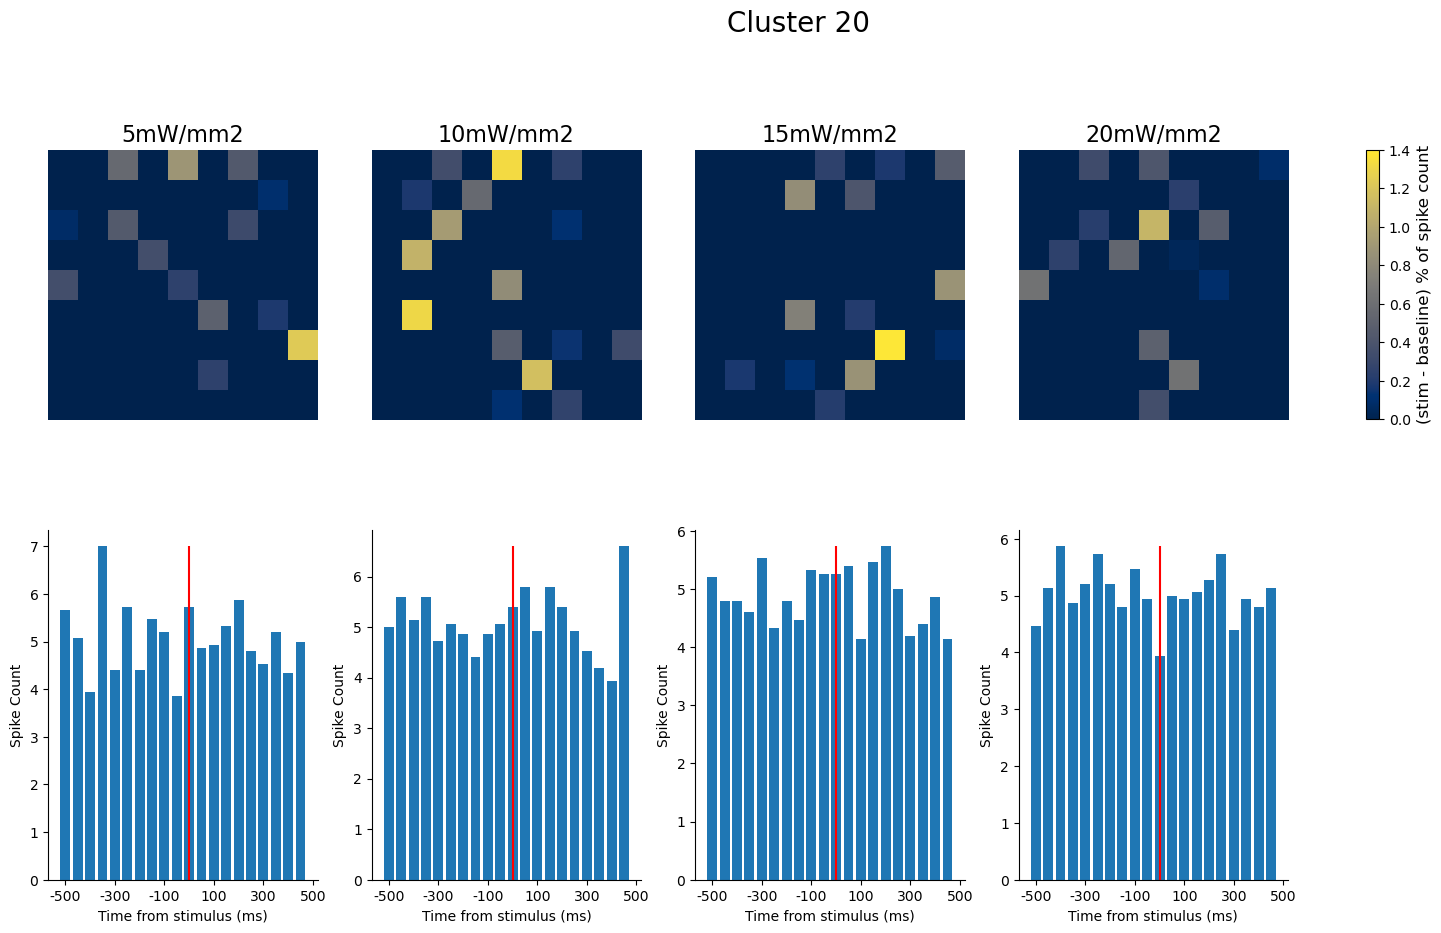

97.2
0.8666666666666667
[inf inf inf inf inf inf nan 23. inf 38. inf 36. 49. inf 36. inf inf inf
 inf inf 15. inf inf inf 46. inf 19. inf 69. inf 43. inf inf inf inf inf]
106.13333333333333
0.9333333333333333
[ inf  inf  inf  inf  inf  inf  nan  inf  inf 45.  58.  63.  53.   inf
 30.   inf 58.   inf  inf 38.   inf  inf 26.   inf  inf 43.  43.   inf
  inf 25.5  inf  inf  inf  inf  inf 12. ]
99.93333333333332
1.0666666666666667
[inf inf inf inf 13. inf nan inf inf 38. 50. inf inf 40. inf 39. inf inf
 inf inf 21. inf inf inf 55. inf 57. inf 67. 17. 67. inf inf inf inf inf]
103.13333333333333
1.0000000000000002
[39.  33.  33.   inf  inf  inf  nan  inf  inf 40.   inf  inf 24.   inf
  inf  inf 22.   inf  inf 51.  16.5  inf  inf  inf  inf 49.  46.   inf
  inf 25.   inf  inf  inf 35.   inf  inf]


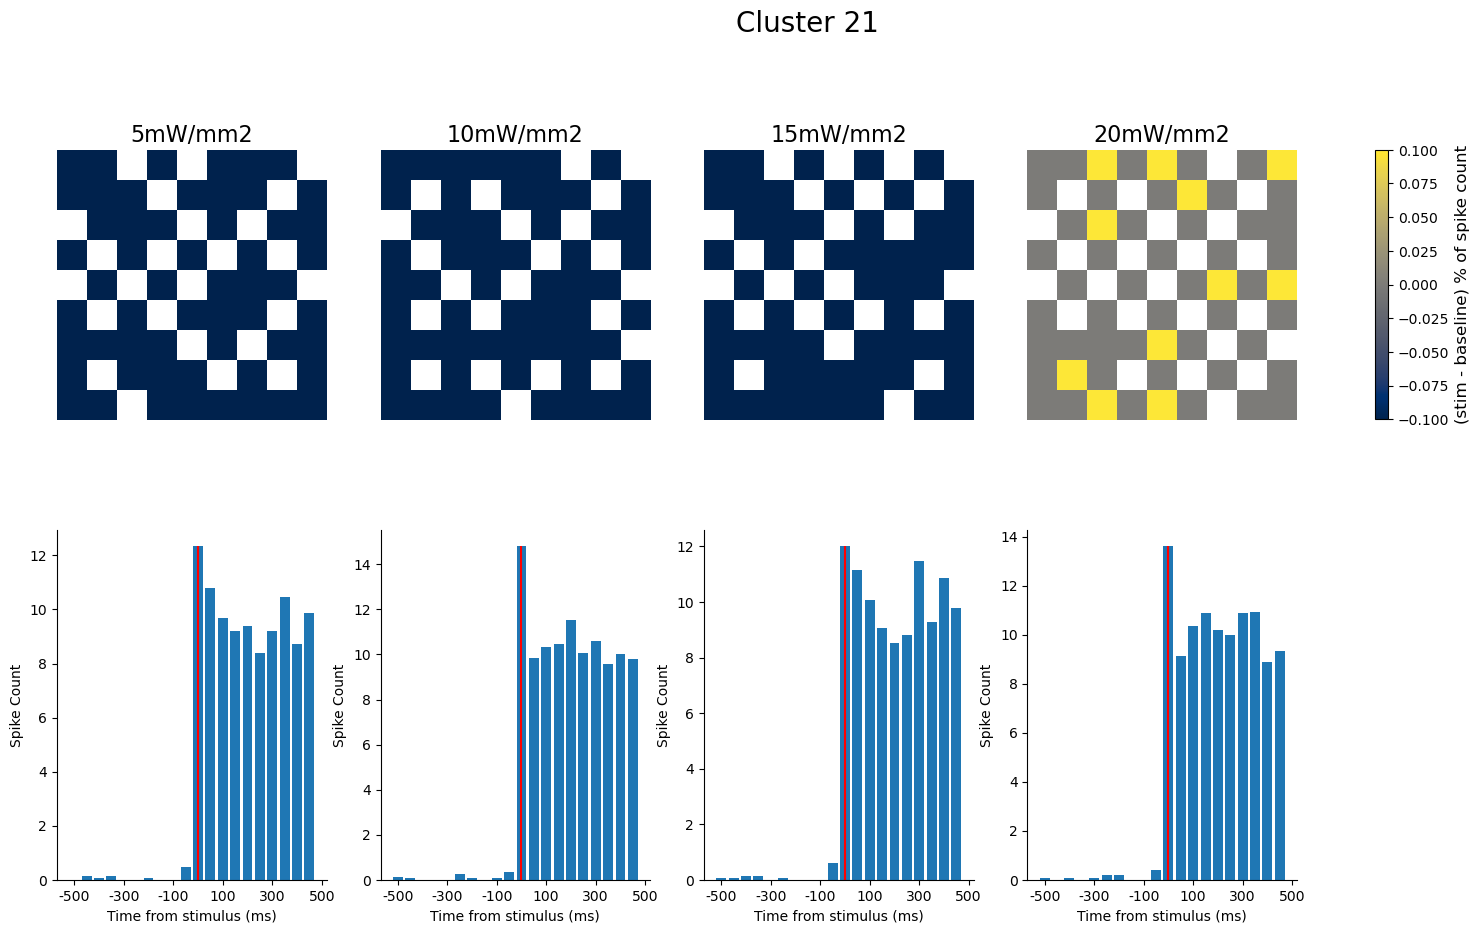

98.33333333333331
3.1333333333333337
[        inf         inf 59.                 inf         inf         inf
  0.         20.5        39.                 inf 27.         57.
 15.                 inf 17.         47.         25.                 inf
         inf 27.         55.                 inf 61.         19.
         inf 15.66666667 16.         14.5        19.         57.
 19.33333333 33.                 inf 12.33333333  8.         10.5       ]
101.60000000000001
3.6666666666666674
[        inf         inf         inf         inf 59.                 inf
         nan 14.                 inf 17.         19.         25.
 64.         16.5        10.33333333         inf 49.         18.5
 17.         53.         15.5        11.33333333         inf 24.5
 16.5        24.         17.33333333 17.         46.         40.
 13.33333333 20.5        28.         13.66666667 11.33333333 12.        ]
106.20000000000002
3.6666666666666674
[        inf         inf         inf         inf         inf   

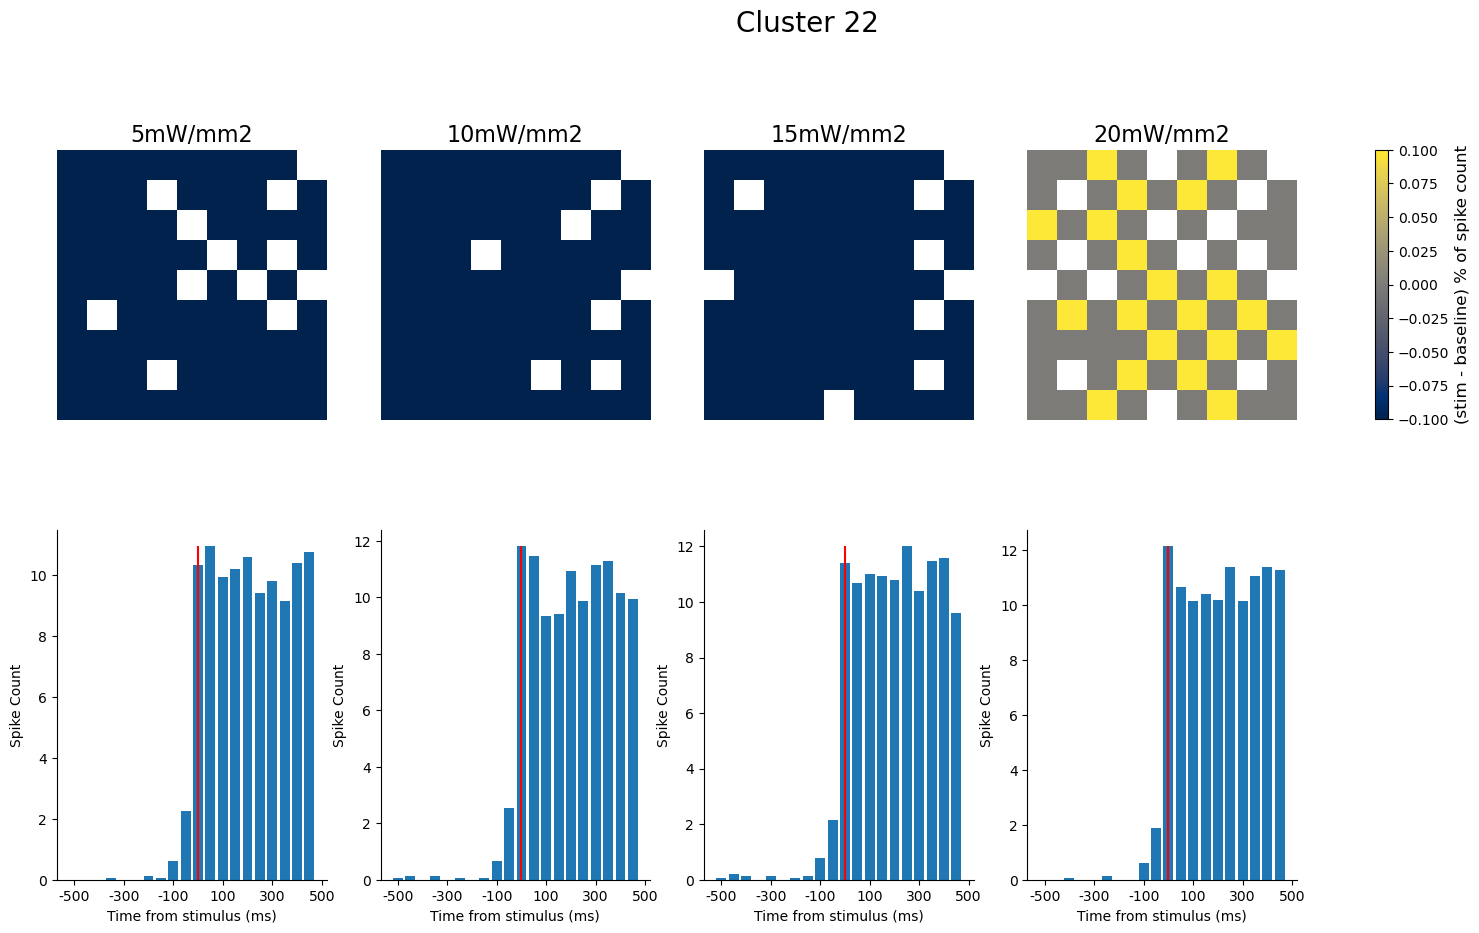

179.46666666666667
2.1333333333333333
[        inf         inf         inf         inf         inf         inf
         nan 47.5                inf 28.         80.         94.
 63.         58.                 inf         inf 35.                 inf
         inf 28.         18.75       89.                 inf 58.
 82.         77.                 inf 71.         70.         91.
         inf 22.66666667 55.                 inf 79.         28.        ]
196.13333333333333
3.866666666666667
[         inf          inf          inf          inf          inf
          inf          nan  30.         107.          27.33333333
  29.66666667  37.          86.                  inf          inf
  43.          46.          72.          14.8         53.
  22.33333333 103.                  inf  35.5         25.33333333
  26.          42.          23.33333333  57.5         45.
          inf  34.5         69.          39.          36.
  17.25      ]
193.66666666666666
2.866666666666667
[        inf        

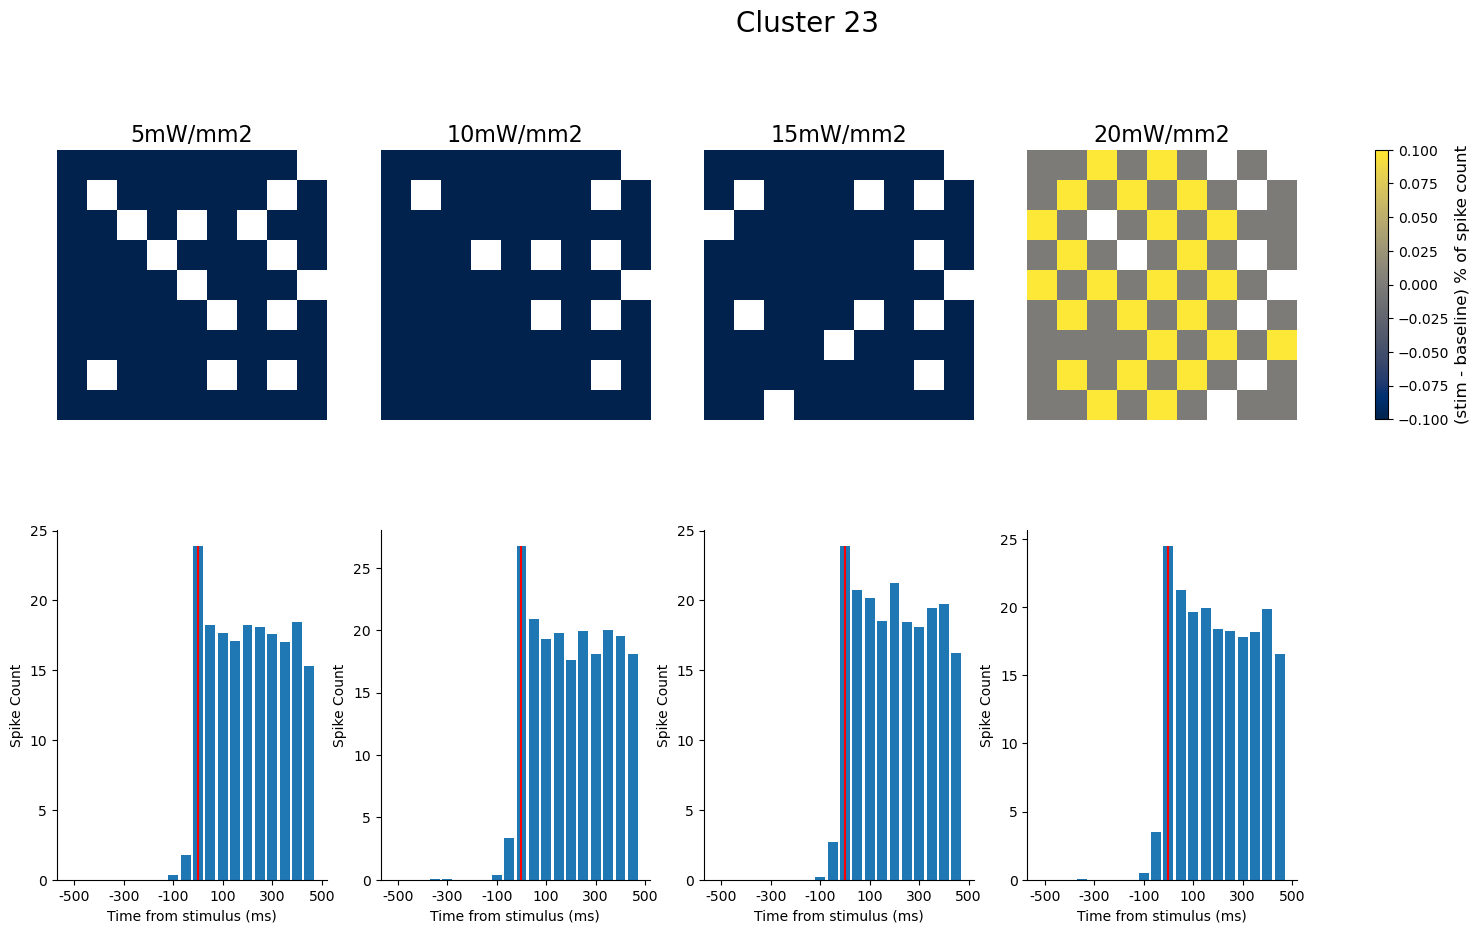

16.933333333333337
38.86666666666667
[-0.16666667  0.08695652  1.07692308  0.5        -0.15       -0.28571429
  0.1         0.08        0.66666667 -0.03448276 -0.11764706 -0.05
 -0.27272727  1.25        1.11111111  0.41176471  1.6         0.08333333
  0.3         0.64285714  0.13043478  0.92857143  0.52631579  0.75
  1.3125      1.21428571  1.88888889  0.6         0.4         0.41176471
  0.63636364  0.2         1.3         0.3125      1.08333333  0.875     ]
21.533333333333335
41.199999999999996
[-0.16666667 -0.38461538 -0.05555556  0.21428571 -0.09090909  0.46153846
  0.61111111  0.21052632  0.72727273  1.33333333  1.30769231  0.85714286
  0.54545455  1.46153846  0.57142857 -0.11111111  0.28571429  1.18181818
  0.75        1.21428571  0.18181818  0.84615385  0.05        3.14285714
  0.95238095 -0.10526316  0.15        0.92307692  1.5         0.2
 -0.07142857  0.94117647  2.46153846 -0.29166667  0.6         0.73076923]
25.266666666666666
39.466666666666654
[ 2.77777778e-01 -1.33333333

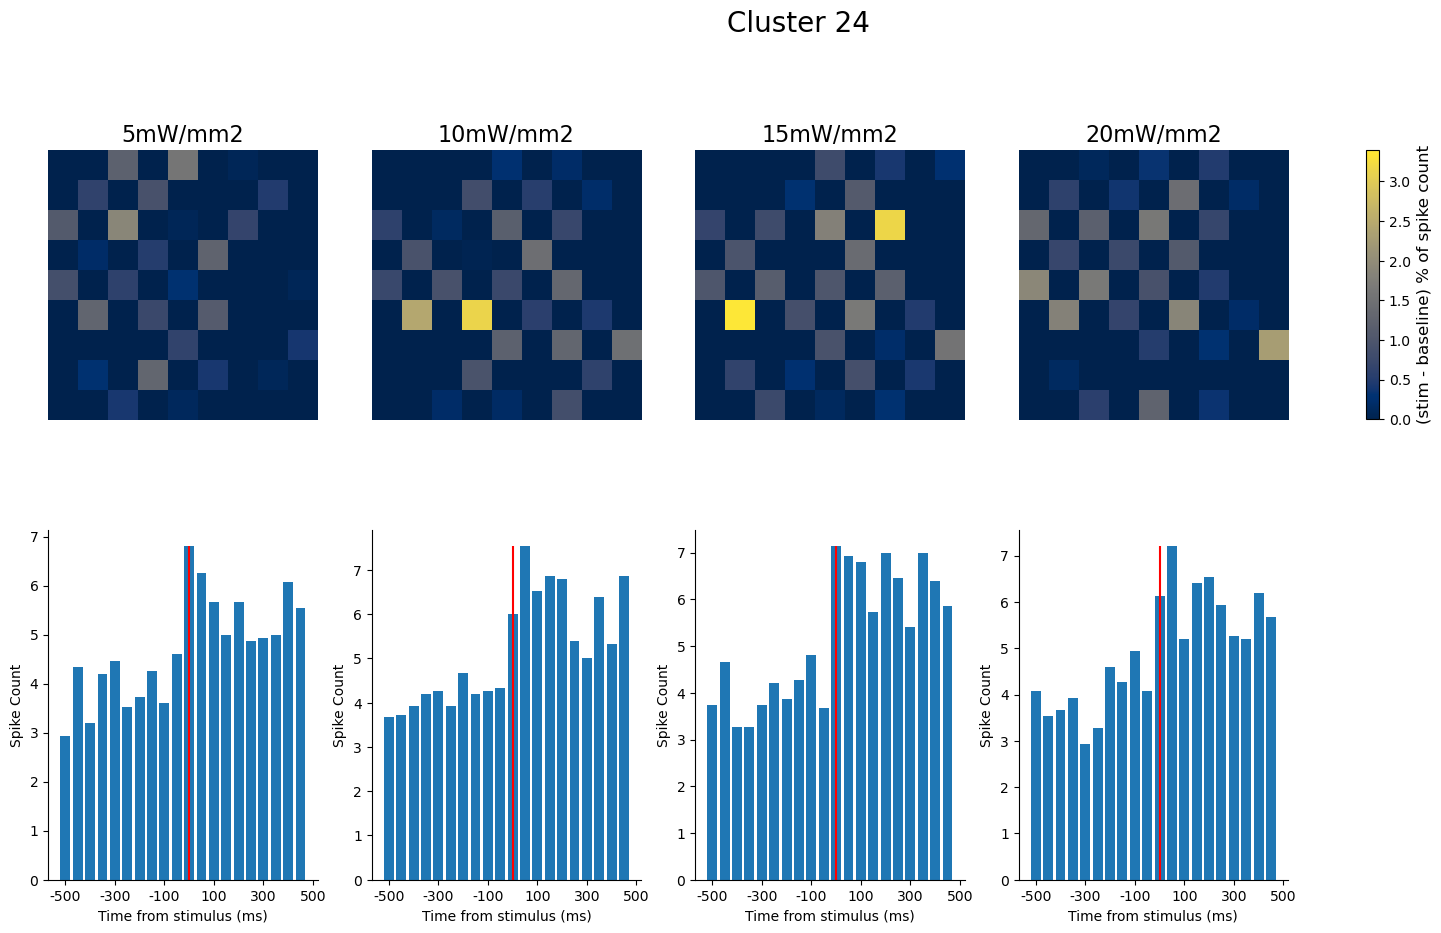

1.0
28.53333333333333
[-3.33333333e-01  1.05263158e-01  3.75000000e-01  0.00000000e+00
  9.09090909e-02 -9.09090909e-02 -7.14285714e-02  4.44444444e-01
  7.27272727e-01 -2.00000000e-01  2.20000000e+00  7.77777778e-01
 -3.33333333e-01 -3.52941176e-01 -2.00000000e-01  1.37500000e+00
  3.33333333e-01  1.37500000e+00 -6.25000000e-01 -3.33333333e-01
  2.85714286e-01 -1.81818182e-01 -4.78260870e-01 -3.75000000e-01
  1.66666667e-01 -2.22222222e-01  2.00000000e+00  1.53846154e-01
  4.00000000e-01 -5.26315789e-02 -2.72727273e-01  5.20417043e-17
  3.07692308e-01  1.00000000e+00  9.09090909e-02 -6.66666667e-01]
2.2666666666666666
27.93333333333333
[ 3.00000000e+00 -4.61538462e-01  2.00000000e-01  6.66666667e-01
 -9.04761905e-01 -1.66666667e-01  1.53846154e-01  2.30769231e-01
  2.72727273e-01  1.60000000e+01  3.63636364e-01  3.00000000e+00
  2.85714286e-01 -1.42857143e-01 -4.44444444e-01  3.33333333e-01
 -4.16666667e-01  7.00000000e-01 -5.71428571e-01  3.07692308e-01
 -2.00000000e-01  1.00000000e+

/home/anverdie/.conda/envs/Antonin/lib/python3.8/site-packages/matplotlib/image.py:449: RuntimeWarning: invalid value encountered in double_scalars
  newmin = vmid - dv * fact


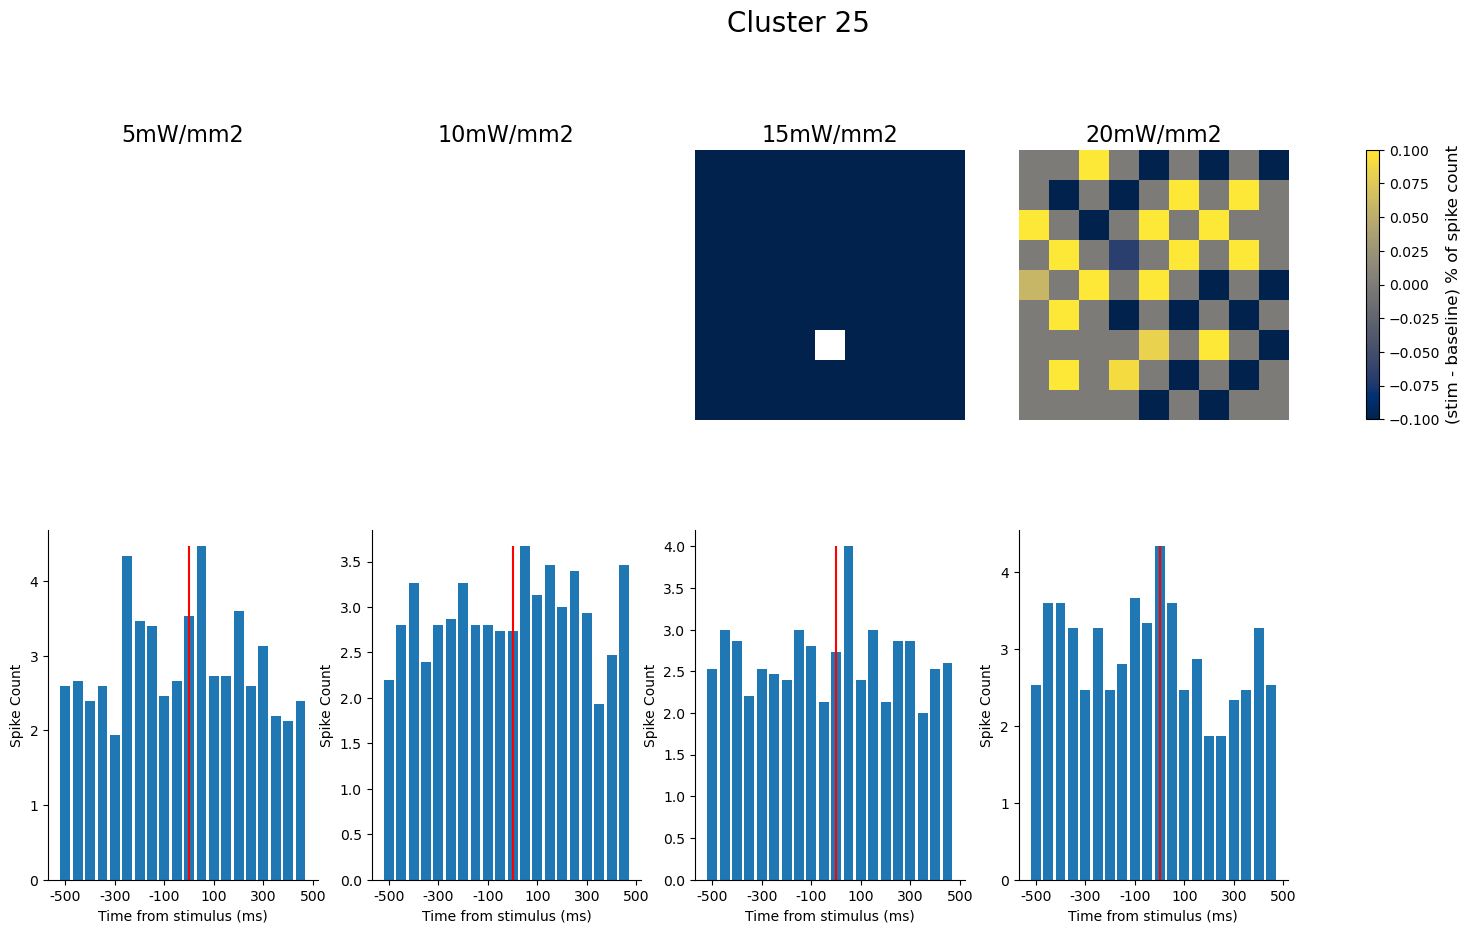

6.3999999999999995
15.466666666666667
[ 0.25       -0.5         0.1         4.          0.5         0.33333333
 -0.33333333  2.66666667 -0.25       -0.57142857 -0.25       -0.5
  1.2        -0.27272727  0.25        4.5         0.5         0.5
  0.44444444  0.5         0.5         0.8         0.125       0.11111111
  2.42857143  2.         -0.4         0.5         0.          0.88888889
  0.14285714 12.          4.          0.2        -0.66666667  0.16666667]
11.733333333333334
16.53333333333333
[ 3.00000000e+00  3.33333333e-01  6.66666667e-01  4.50000000e+00
 -1.04083409e-16 -2.00000000e-01  2.50000000e-01  4.16333634e-17
  7.50000000e-01  1.15384615e+00  1.66666667e-01  7.14285714e-01
  1.00000000e+00  2.25000000e+00  7.14285714e-01  7.50000000e+00
  5.00000000e-01  1.42857143e+00  5.55555556e-01  8.33333333e-01
 -1.81818182e-01  1.33333333e+00  8.00000000e-01  5.33333333e+00
 -2.50000000e-01 -2.30769231e-01  3.50000000e+00  2.00000000e-01
  8.75000000e-01  1.11111111e-01  3.57142857e

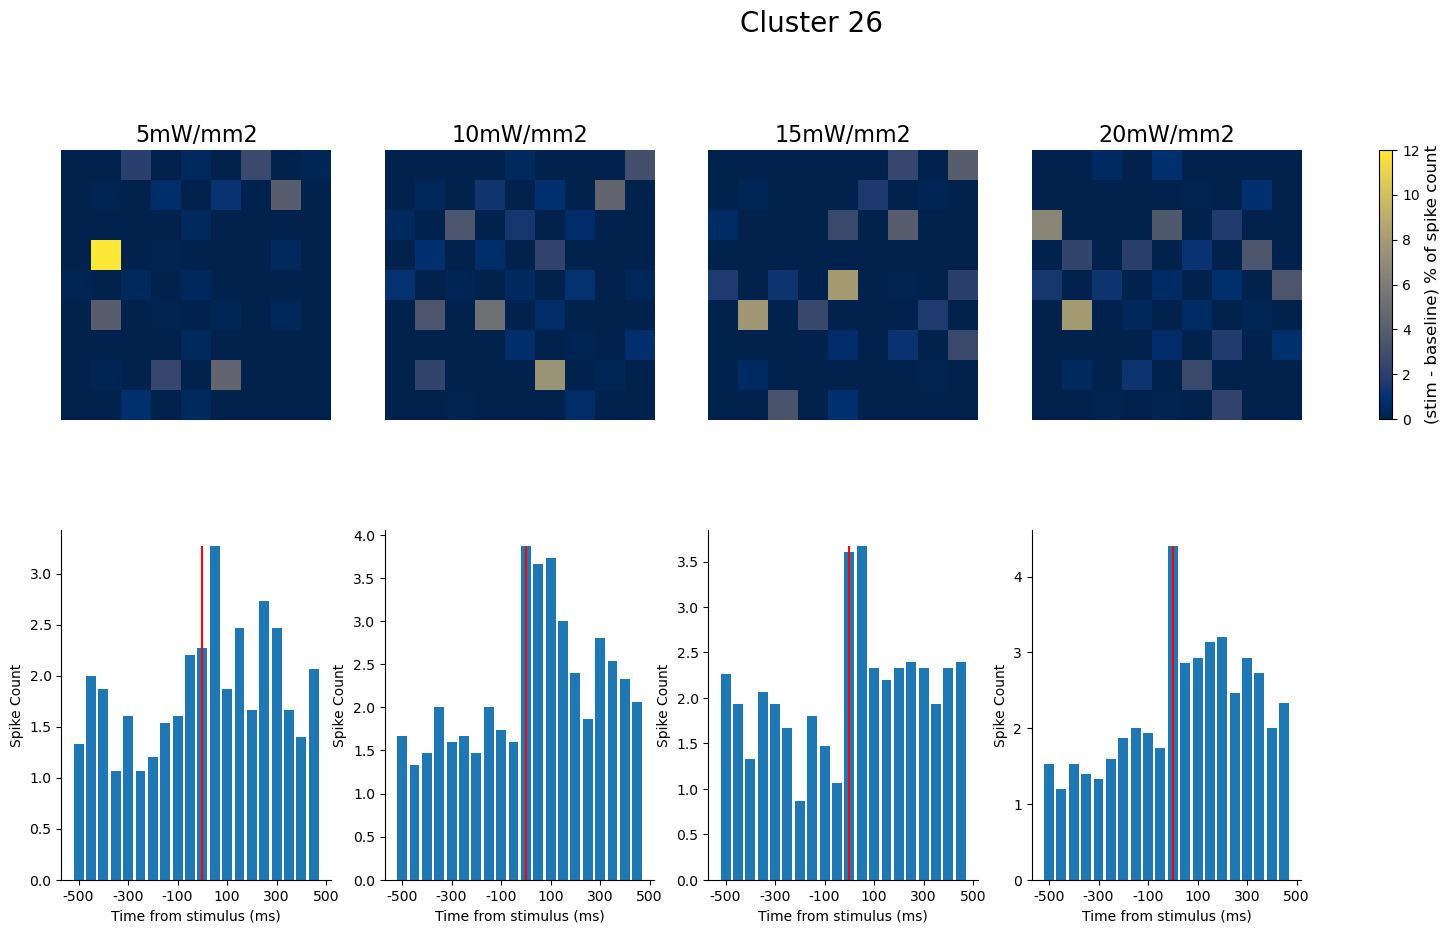

3.533333333333334
56.53333333333334
[-4.16666667e-02 -3.84615385e-02  1.38888889e+00  1.17647059e-01
  1.00000000e+00 -3.33333333e-01  4.11764706e-01 -3.66666667e-01
 -4.23076923e-01 -3.47826087e-01 -3.33333333e-01 -2.43243243e-01
  3.12500000e-01  8.69565217e-02 -9.37500000e-02  9.09090909e-02
 -5.26315789e-02 -1.11111111e-01  1.29411765e+00  6.87500000e-01
  5.00000000e-01  1.50000000e-01  8.12358311e-17  1.00000000e+00
  3.50000000e-01 -3.05555556e-01 -7.14285714e-02 -3.22580645e-02
 -2.63157895e-01  3.33333333e-01  3.75000000e-01 -1.50000000e-01
 -1.30434783e-01  3.80952381e-01 -3.57142857e-02  2.50000000e-01]
3.4666666666666663
54.06666666666666
[ 2.50000000e-01 -1.66666667e-01  5.83333333e-01 -4.07407407e-01
  5.33333333e-01 -2.85714286e-01 -4.76190476e-02  4.11764706e-01
 -4.44444444e-01  9.04761905e-01  3.12500000e-01 -5.13513514e-01
 -2.97381167e-17 -1.30434783e-01  3.92857143e-01  3.57142857e-01
 -2.05882353e-01  4.16666667e-02  5.00000000e-01  1.20000000e-01
  3.70370370e-02

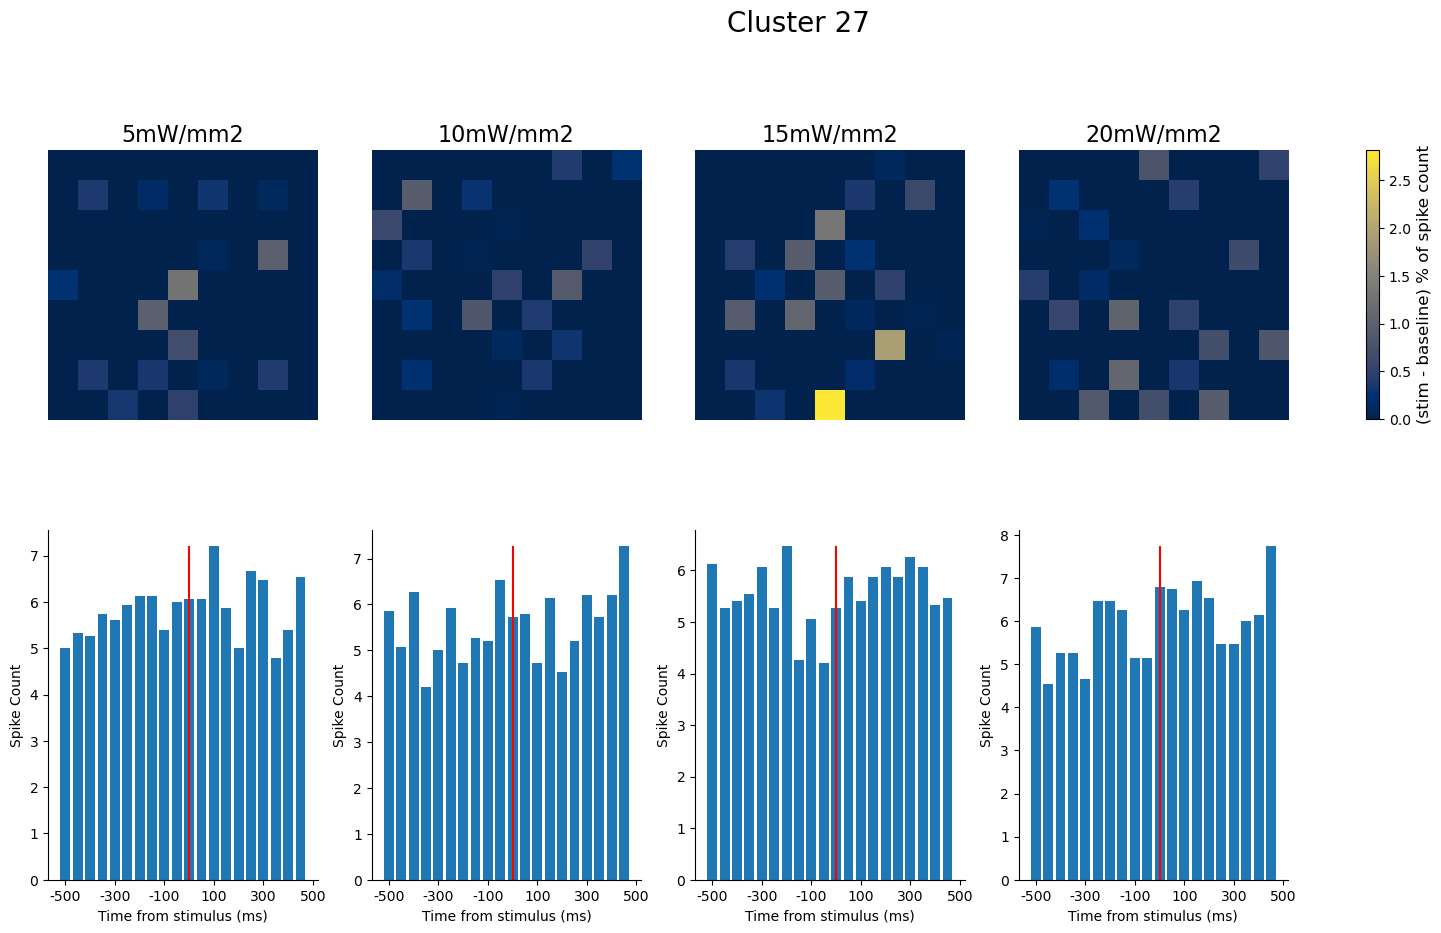

-0.26666666666666666
0.5333333333333333
[-1. inf nan nan nan -1. nan nan nan nan nan nan nan nan nan inf -1. nan
 nan inf nan nan nan nan  0. nan nan nan nan -1. nan nan nan -1. nan -1.]
0.06666666666666667
0.4
[nan nan nan nan -1. nan nan inf nan nan nan nan inf nan -1. nan inf -1.
 -1. nan nan -1. nan nan inf nan nan nan inf inf nan nan nan nan nan -1.]
0.13333333333333333
0.2
[nan -1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan inf nan  0. inf nan inf nan nan nan nan inf -1. nan nan nan nan]
0.06666666666666668
0.4666666666666667
[ nan  inf  nan  nan  nan  nan  nan  nan  nan  nan  nan -1.   nan  nan
  nan  0.   nan  inf  nan  nan  nan  nan  inf  nan  nan  inf  inf  nan
  nan -0.5  nan  nan -1.   nan  inf -1. ]


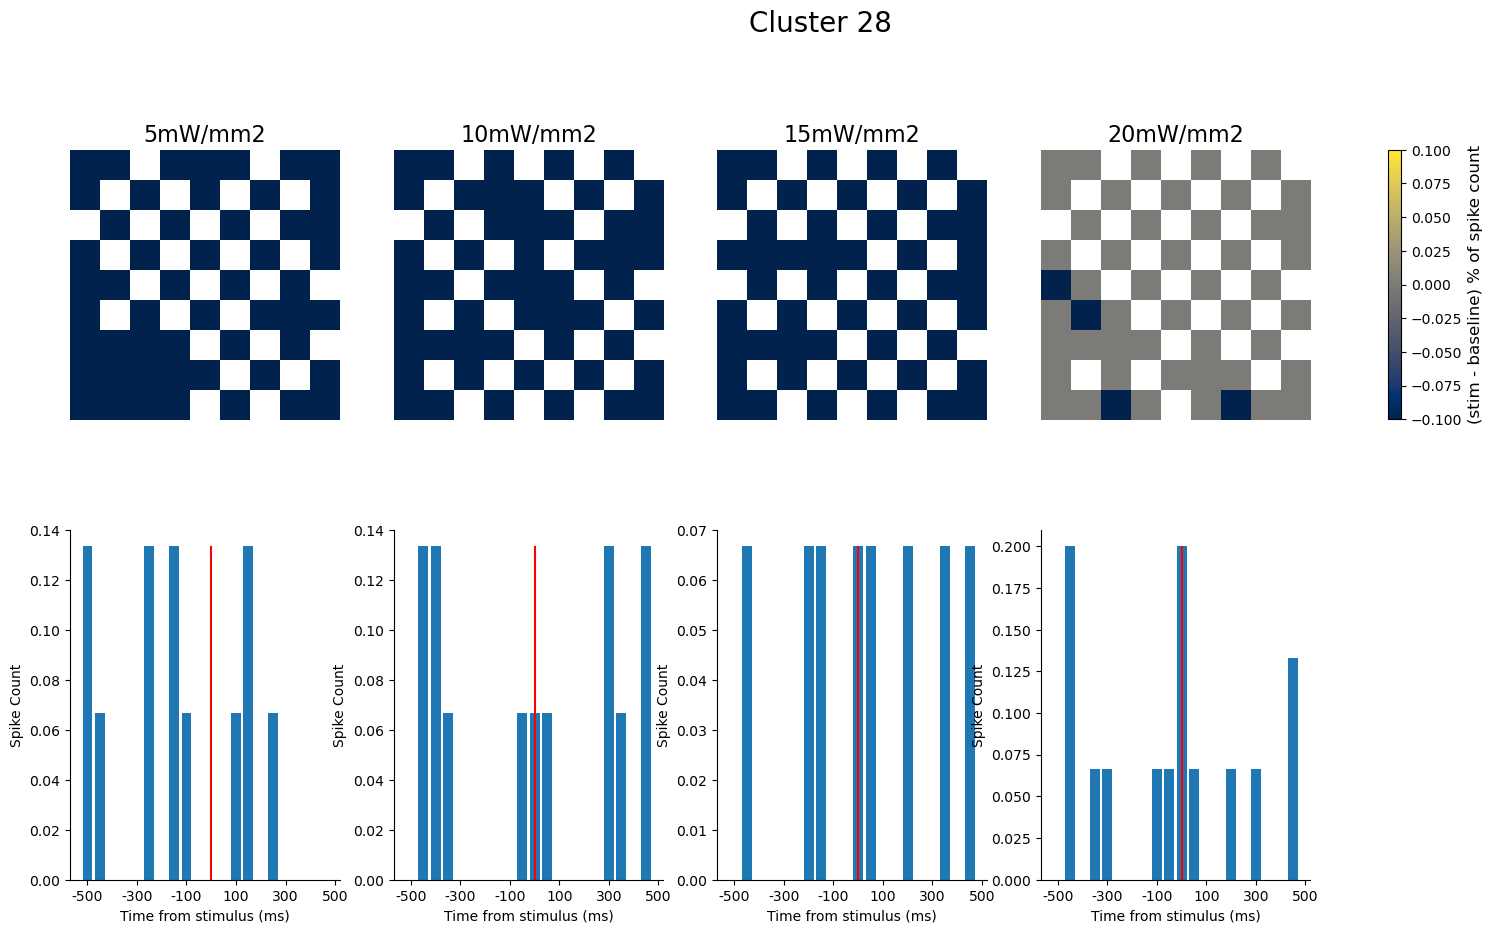

9.733333333333336
103.2
[-2.56410256e-02 -4.00320802e-17  7.57575758e-01 -3.33333333e-02
  1.59090909e+00  1.33333333e-01 -4.89361702e-01  5.26315789e-02
  1.38888889e-01  2.82051282e-01 -2.07547170e-01  3.90243902e-01
  1.42857143e-01  2.11538462e-01 -2.50000000e-01  0.00000000e+00
 -4.10958904e-01  3.01886792e-01 -5.66037736e-02  1.33333333e-01
  3.07692308e-01  2.08333333e-02 -2.11538462e-01  1.28205128e+00
  8.48484848e-01 -4.44444444e-01  3.37567812e-17  4.00000000e-02
 -1.09090909e-01  3.54166667e-01  1.17241379e+00 -2.40740741e-01
  4.05405405e-01  4.66666667e-01 -2.81250000e-01 -2.12765957e-01]
17.333333333333332
100.0
[ 4.78260870e-01 -3.86363636e-01  3.33333333e-01  1.89189189e-01
 -7.14285714e-02  1.37931034e-01 -2.25000000e-01  5.00000000e-01
 -2.29166667e-01  1.53846154e+00 -2.00000000e-01 -1.33333333e-01
 -2.20338983e-01 -3.23076923e-01  2.32558140e-01  5.89743590e-01
 -1.20689655e-01  8.52941176e-01  8.66666667e-01  3.68421053e-01
  5.33333333e-01  2.85714286e-01  3.6585

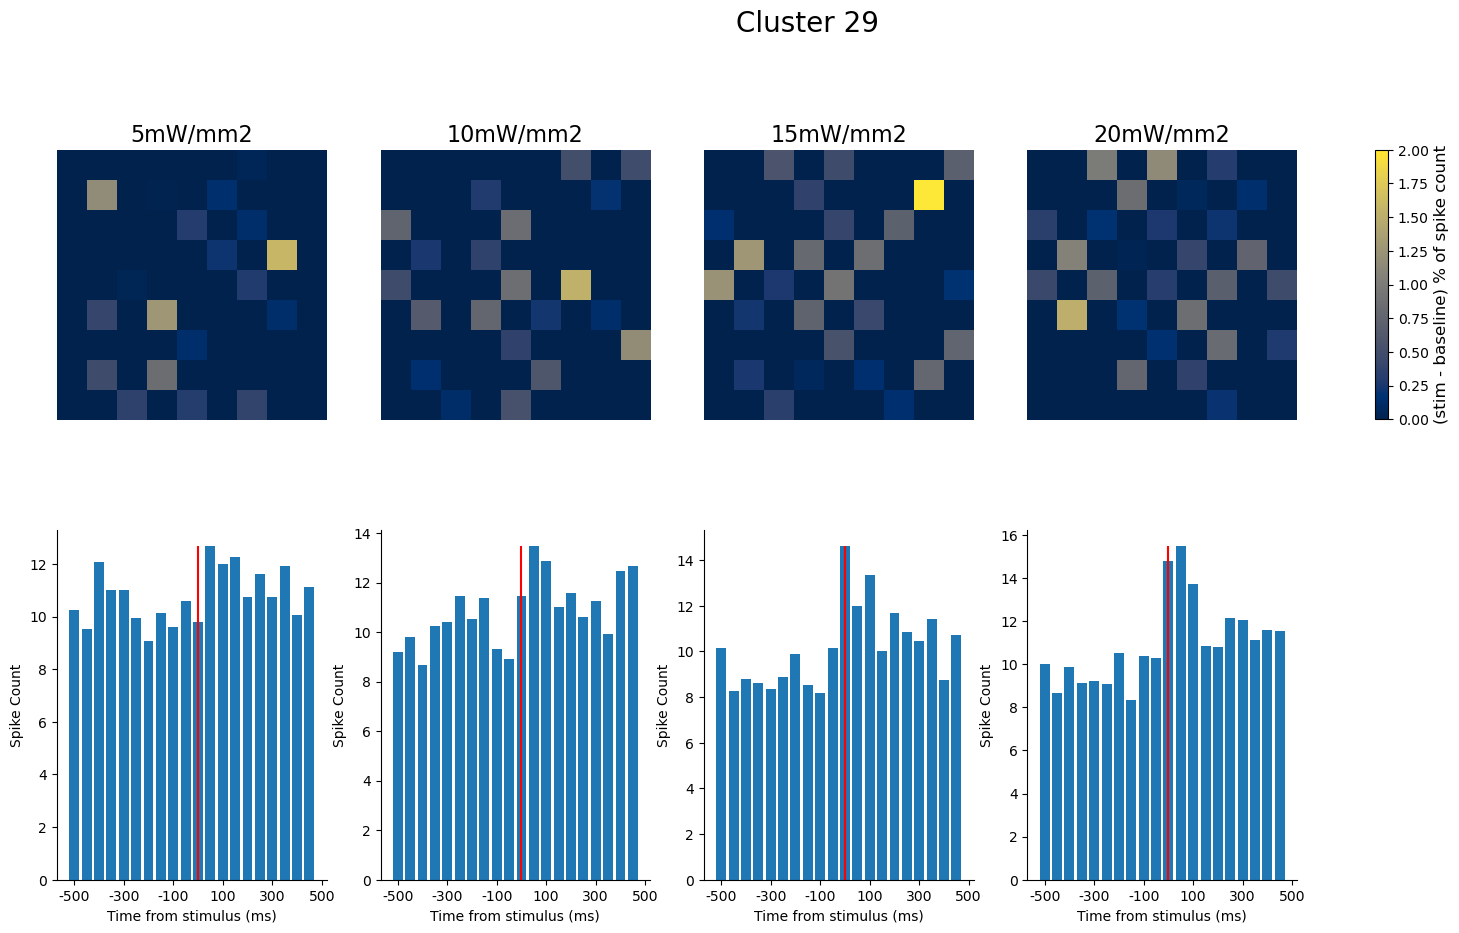

2.933333333333333
30.199999999999996
[-3.07692308e-01  0.00000000e+00  1.81818182e-01  2.22222222e-01
 -1.33333333e-01  1.11111111e+00  2.50000000e+00  1.66666667e-01
 -3.80952381e-01  2.00000000e-01  5.20417043e-17 -2.85714286e-01
 -5.62500000e-01  5.83333333e-01  1.28571429e+00 -6.25000000e-02
  6.66666667e-01 -4.40000000e-01  3.40000000e+00  1.20000000e+00
 -1.66666667e-01  1.28571429e+00  1.05263158e-01 -7.56970244e-17
 -3.33333333e-01 -4.33333333e-01 -5.00000000e-01 -3.00000000e-01
 -2.50000000e-01  1.81818182e-01  5.00000000e-01  6.66666667e-01
  4.25000000e+00 -1.05263158e-01  1.66666667e-01 -1.25000000e-01]
3.333333333333333
30.266666666666662
[-8.57142857e-01  1.81818182e-01  7.14285714e-02  1.33333333e+00
  1.00000000e+00  3.33333333e-01  6.00000000e-01  1.90476190e-01
  1.50000000e+00  1.25000000e-01 -3.33333333e-01  1.33333333e+00
  9.09090909e-01 -3.84615385e-01 -1.17647059e-01 -5.00000000e-01
 -1.89242561e-17  2.00000000e-01  1.48690584e-17 -3.07692308e-01
  1.42857143e-0

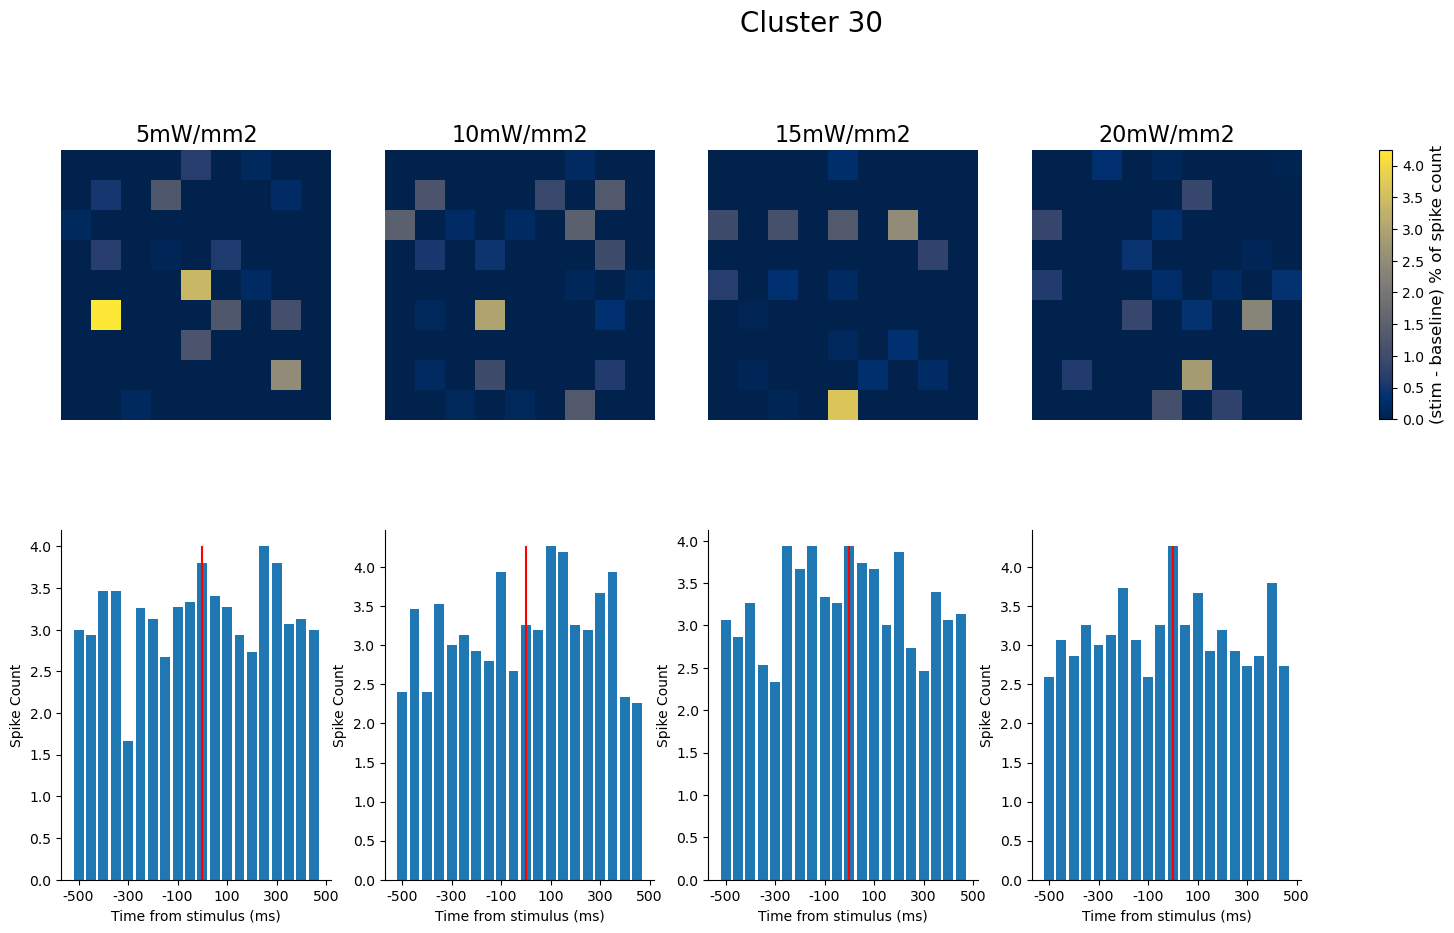

-2.466666666666667
49.0
[-0.41666667  0.09090909  2.71428571 -0.83333333  0.6875     -0.28571429
 -0.55882353 -0.23529412 -0.36842105 -0.42105263  0.0625      0.11764706
  0.25        0.5         0.          0.04347826  0.1         0.07692308
 -0.375      -0.31818182  0.25        1.09090909 -0.07692308  0.22222222
 -0.18518519  0.1         0.26666667 -0.23333333  2.14285714 -0.31818182
  0.46666667 -0.1        -0.21875    -0.07692308  0.17948718 -0.37837838]
5.266666666666665
45.33333333333334
[ 6.66666667e-01 -4.00000000e-01 -2.60869565e-01  8.23529412e-01
 -5.71428571e-01  2.10526316e-01 -3.21428571e-01  5.94762335e-17
  6.47058824e-01  1.21428571e+00 -1.30434783e-01  2.94117647e-01
  2.00000000e-01  1.00000000e-01  1.30769231e+00  9.52380952e-02
 -4.00000000e-01 -2.33333333e-01  2.30769231e-01  1.15384615e-01
  5.00000000e-01  4.89804276e-17 -5.51724138e-01  7.14285714e-02
  7.50000000e-01  7.77777778e-01 -2.40000000e-01 -2.97297297e-01
  1.09090909e+00 -4.16333634e-17 -2.17391304e-

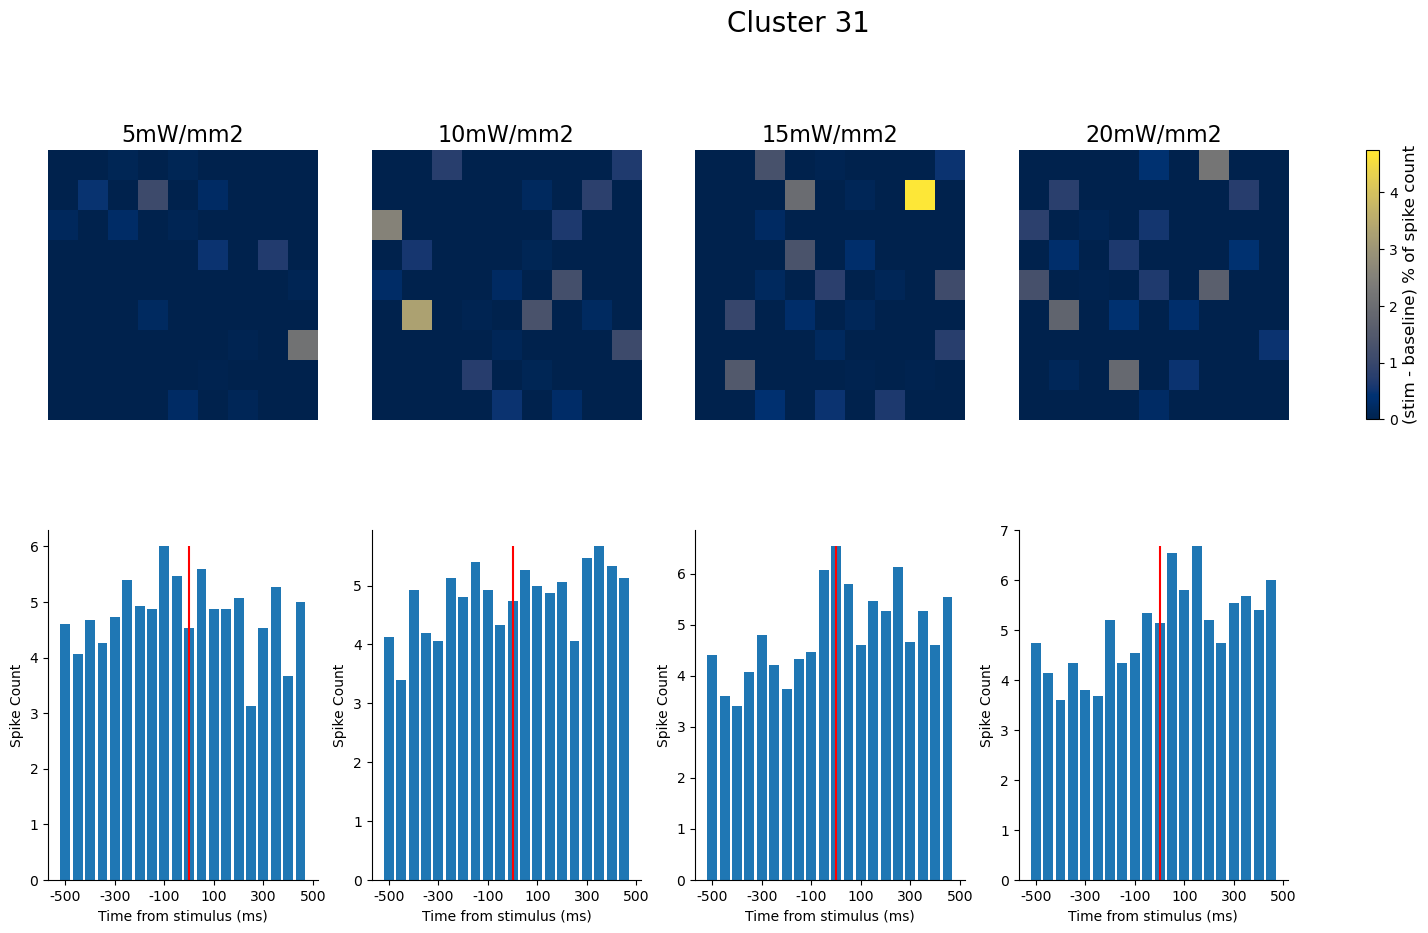

2.1999999999999993
42.533333333333324
[ 8.57142857e-01  6.66666667e-01  2.77777778e-01 -1.87500000e-01
  6.66666667e-01 -3.57142857e-01  4.81481481e-01 -1.66666667e-01
  5.67727683e-17 -2.42424242e-01 -6.15384615e-01  6.36363636e-01
  3.84615385e-01  6.66666667e-02 -5.20000000e-01  4.16666667e-01
 -2.77777778e-01  2.85714286e-01  1.11111111e-01  4.73684211e-01
  6.00000000e-01  1.83333333e+00 -3.51351351e-01  2.33333333e+00
  2.77777778e-01 -4.76190476e-01 -5.00000000e-01  1.83333333e+00
  3.33333333e-01 -2.85714286e-01  1.25000000e+00  4.66666667e-01
  5.00000000e-02 -3.57142857e-01 -4.48275862e-01 -4.66666667e-01]
-0.5333333333333335
43.53333333333333
[ 5.00000000e-01  6.00000000e-01 -2.10526316e-01  2.77777778e-01
 -3.70370370e-02 -1.38777878e-17 -1.20000000e-01  1.25000000e-01
 -4.81481481e-01  1.93333333e+00  1.25000000e-01 -1.90476190e-01
 -4.44444444e-01 -6.19047619e-01 -2.17391304e-01 -3.12500000e-01
 -6.25000000e-02  2.38095238e-01 -4.28571429e-01 -5.88235294e-02
 -4.50000000e

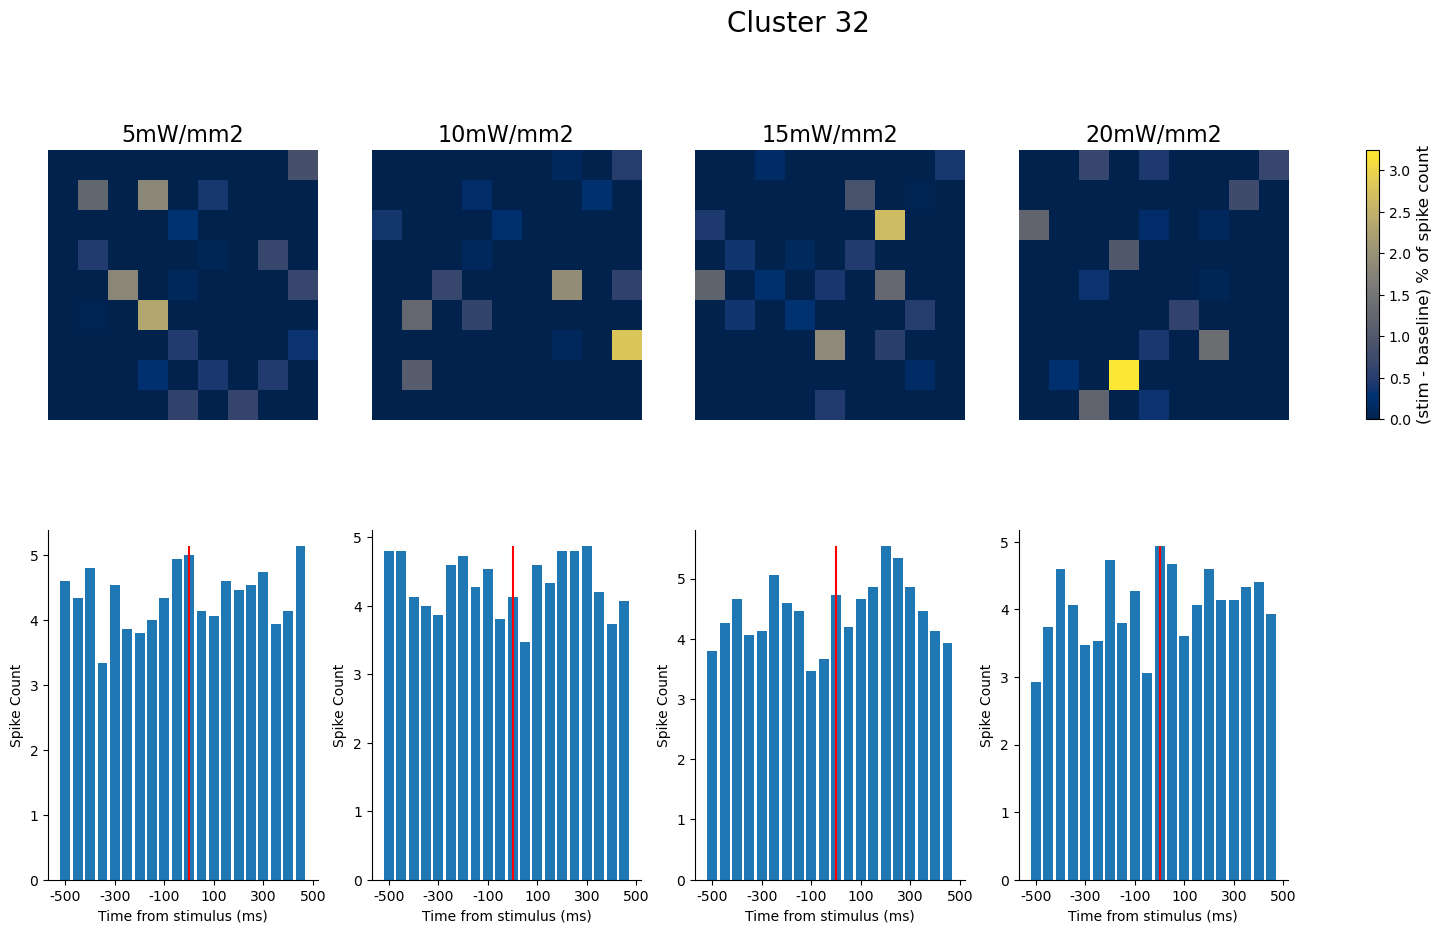

1.4
47.8
[-4.50000000e-01  7.27272727e-01  6.00000000e-01  1.42857143e-01
 -2.42424242e-01 -2.63157895e-01 -1.72413793e-01 -4.00000000e-01
 -8.69565217e-02  2.60869565e-01 -1.66666667e-01 -2.00000000e-01
 -2.85714286e-01  3.57142857e-01  2.60869565e-01 -2.75862069e-01
  5.94762335e-17  9.54545455e-01  1.03448276e-01  3.33333333e-01
  3.84615385e-01  6.25000000e-02 -4.76190476e-01  7.14285714e-02
  5.33333333e-01 -4.34782609e-01 -3.68421053e-01 -4.16666667e-01
  1.00000000e+00  1.15384615e+00 -5.00000000e-02  5.00000000e-01
  3.78485122e-17  7.14285714e-02  1.73913043e-01  8.33333333e-02]
2.9333333333333336
48.93333333333332
[-3.20000000e-01 -5.88235294e-02  7.27272727e-01  1.50000000e-01
 -6.66666667e-01  7.27272727e-01  2.97381167e-17 -8.33333333e-02
 -1.00000000e-01  5.71428571e-01  3.33333333e-01 -3.60000000e-01
 -1.42857143e-01  3.33333333e-01  1.00000000e+00  6.66666667e-02
 -3.44827586e-02 -1.05263158e-01 -3.33333333e-01 -2.72727273e-01
 -3.07692308e-01  4.54545455e-02  3.0000000

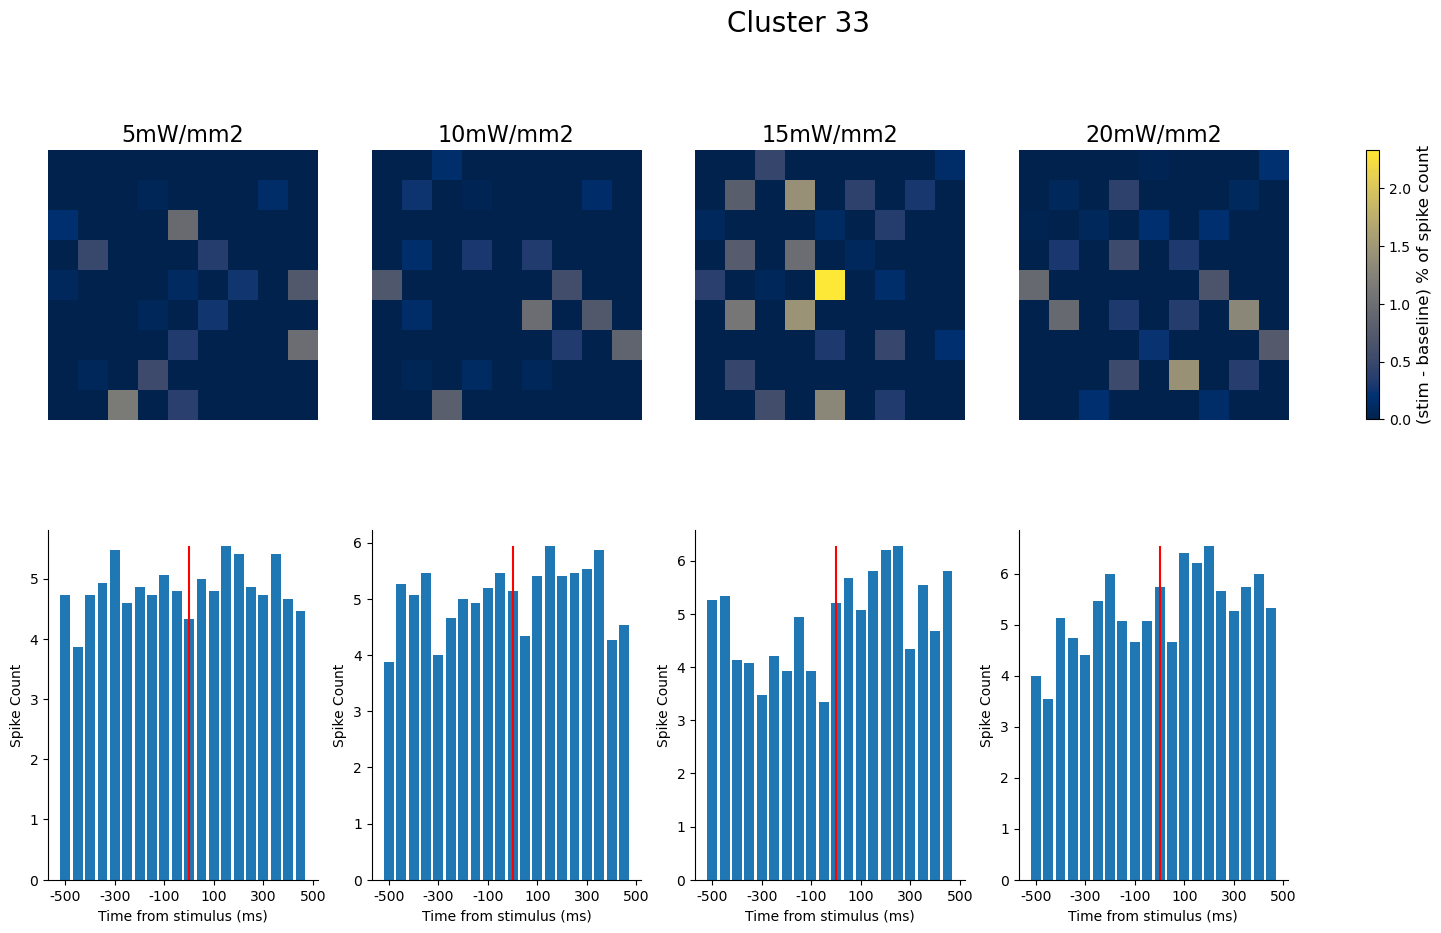

0.6000000000000001
5.6000000000000005
[-1.00000000e+00  2.00000000e+00  2.00000000e+00             inf
  6.66666667e-01  0.00000000e+00 -7.50000000e-01 -7.50000000e-01
  0.00000000e+00  2.00000000e+00 -5.00000000e-01  0.00000000e+00
 -7.50000000e-01             nan  1.50000000e+00  0.00000000e+00
             nan -5.00000000e-01             inf  0.00000000e+00
 -5.00000000e-01 -5.00000000e-01  5.00000000e-01 -4.44444444e-01
  0.00000000e+00  2.50000000e+00  1.50000000e+00  0.00000000e+00
 -1.04083409e-16  2.00000000e+00 -2.50000000e-01 -6.00000000e-01
  1.00000000e+00  2.50000000e-01  5.00000000e-01  1.00000000e+00]
1.6
5.400000000000001
[ 2.                 nan         inf -0.8        -1.         -0.33333333
  0.         -0.5         1.33333333  0.          0.          0.66666667
  2.                 nan -1.          0.          0.5                inf
  1.          1.          0.33333333  0.25               inf         inf
 -0.25       -0.6        -0.4                inf -0.28571429  

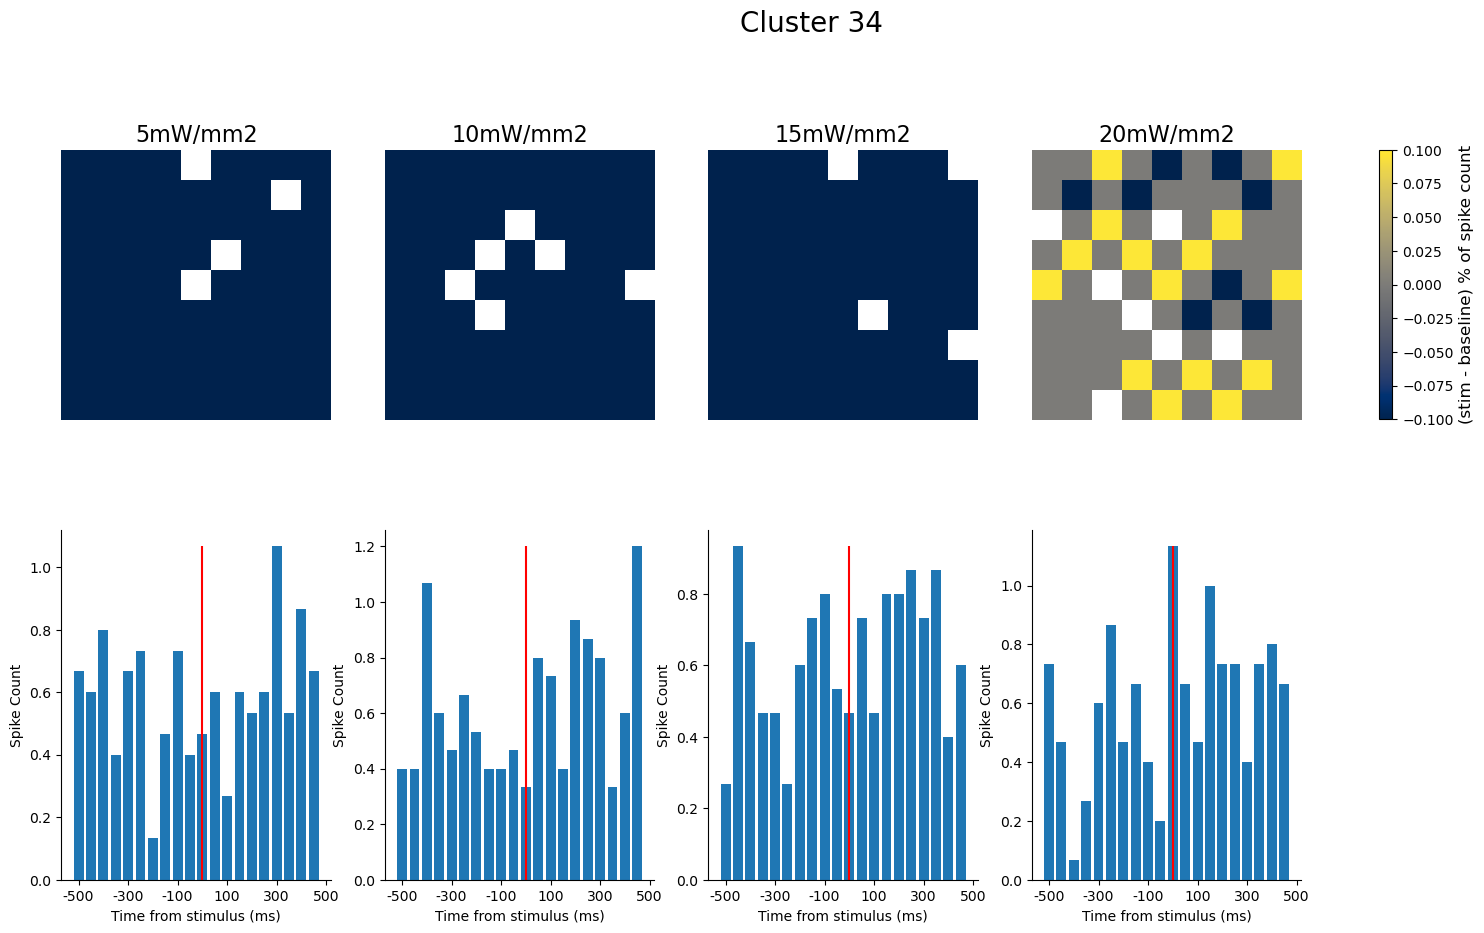

11.600000000000001
125.33333333333334
[-0.08510638  0.04081633  0.40909091 -0.30882353 -0.14285714 -0.12195122
 -0.05555556  0.23333333 -0.32258065  0.28571429  1.48        0.17777778
 -0.38297872  0.19354839  0.52380952  1.          0.37037037  0.13461538
 -0.25423729  0.17741935 -0.02       -0.08064516  0.13636364 -0.42857143
  0.31818182  0.37735849 -0.20895522 -0.04918033  0.76744186  0.24444444
 -0.06666667  0.10638298  0.25925926 -0.17567568 -0.17741935  0.72093023]
20.46666666666667
114.33333333333333
[-4.65116279e-02 -4.84848485e-01 -3.15789474e-01  3.09523810e-01
 -2.75862069e-01  1.17647059e-01  2.38095238e-02  1.77777778e-01
 -1.89242561e-17  9.33333333e-01 -3.94366197e-01  2.36842105e-01
  1.12121212e+00  8.64864865e-01  1.50000000e-01  1.84210526e-01
 -2.72727273e-01  0.00000000e+00 -4.44444444e-02  1.91489362e-01
  9.52380952e-02 -2.78688525e-01  2.11538462e-01  1.15384615e-01
  1.69491525e-01  9.52380952e-02 -8.77192982e-02  4.44444444e-01
  1.10204082e+00  7.94871795e-0

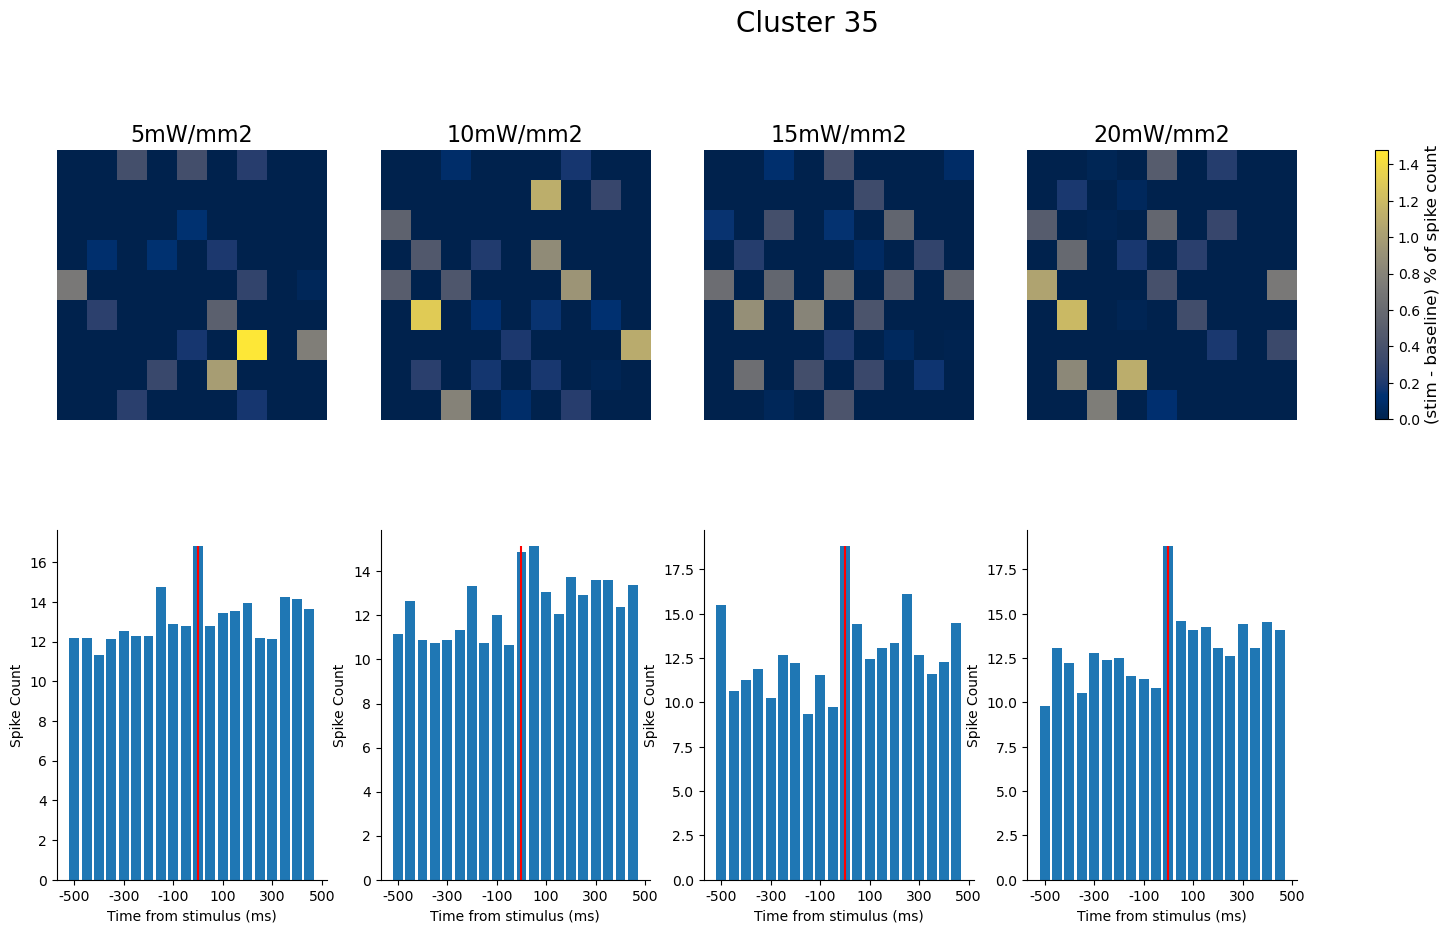

8.666666666666666
64.2
[-0.0952381   0.23076923  1.91666667  0.07407407 -0.60714286  0.
  0.15384615 -0.06976744 -0.10810811  0.43478261 -0.53846154  1.1
  0.26666667  0.75        0.31818182  0.93333333 -0.175       1.23076923
 -0.10714286  0.04        1.          1.2        -0.12121212  0.61538462
  0.18181818 -0.04651163 -0.34210526 -0.33333333  0.46666667 -0.14705882
  0.24390244  0.09090909  0.26315789  0.04347826 -0.10714286  0.42105263]
11.999999999999998
60.4
[ 5.45454545e-01 -5.86206897e-01 -5.23809524e-01  7.00000000e-01
 -5.17241379e-01 -2.38095238e-01  7.89473684e-01 -2.70270270e-01
  5.71428571e-01  6.81818182e-01 -4.76190476e-02 -3.63636364e-01
  5.16129032e-01  1.40000000e+00  8.69565217e-01  6.11111111e-01
  8.00000000e-01  5.71428571e-01  1.48148148e-01 -3.44827586e-02
 -8.33333333e-02 -2.85714286e-02  1.07142857e-01 -3.03030303e-01
 -1.59090909e-01 -5.88235294e-02  1.76470588e-01 -1.07142857e-01
  7.05882353e-01  1.11111111e+00  1.73913043e-01  1.57894737e-01
  8.26086

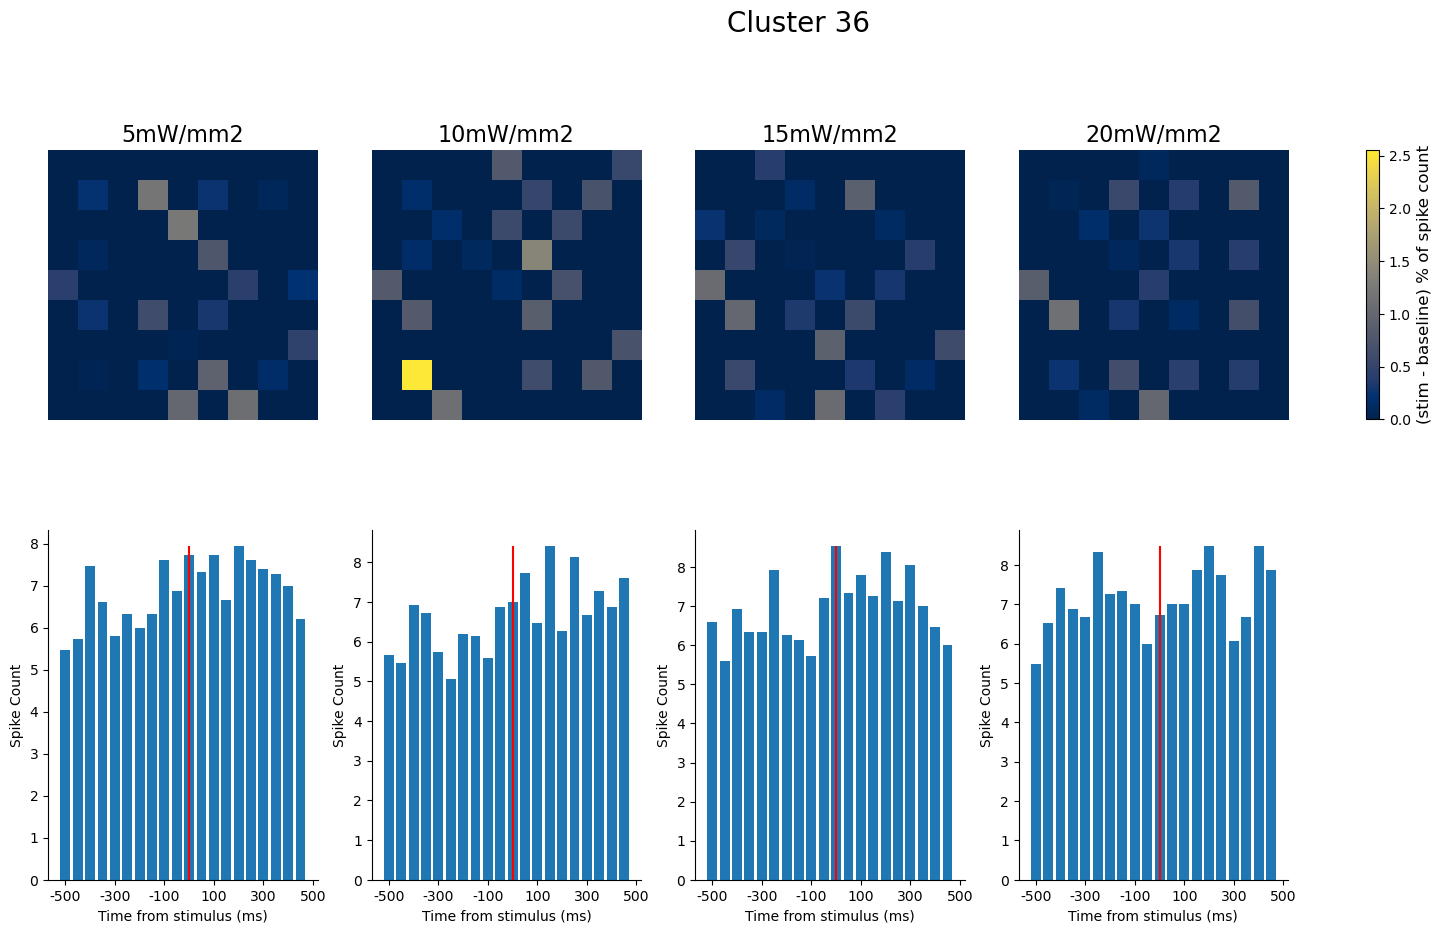

9.866666666666667
58.399999999999984
[-4.61538462e-01  4.34782609e-02 -2.60869565e-01  3.33333333e-01
 -3.84615385e-02  3.33333333e-01  2.60869565e-01  5.71428571e-02
 -2.70270270e-02  1.00000000e+00  5.00000000e-01 -5.40540541e-01
 -4.00000000e-01  3.57142857e-02  9.54545455e-01  2.10526316e-01
  3.75000000e-01  1.25000000e+00  1.50000000e+00 -1.37931034e-01
  2.50000000e-01  8.69565217e-02 -3.33333333e-01 -6.89655172e-02
  1.37931034e-01  1.47368421e+00  7.05882353e-01 -8.69565217e-02
  1.11111111e-01  1.66666667e+00 -3.14285714e-01  6.16790569e-17
 -4.04761905e-01  1.11764706e+00  8.69565217e-01  6.95652174e-01]
8.799999999999997
63.999999999999986
[ 0.         -0.19230769  1.27272727  0.47619048  0.03030303 -0.52631579
 -0.27586207  0.41176471  0.47368421 -0.66101695  0.13636364  0.04878049
  0.44444444 -0.10526316 -0.03703704  0.25       -0.19512195 -0.03333333
  0.22222222  0.52        2.52941176 -0.03846154 -0.1         0.22222222
  0.95454545 -0.28        1.18181818  0.38461538

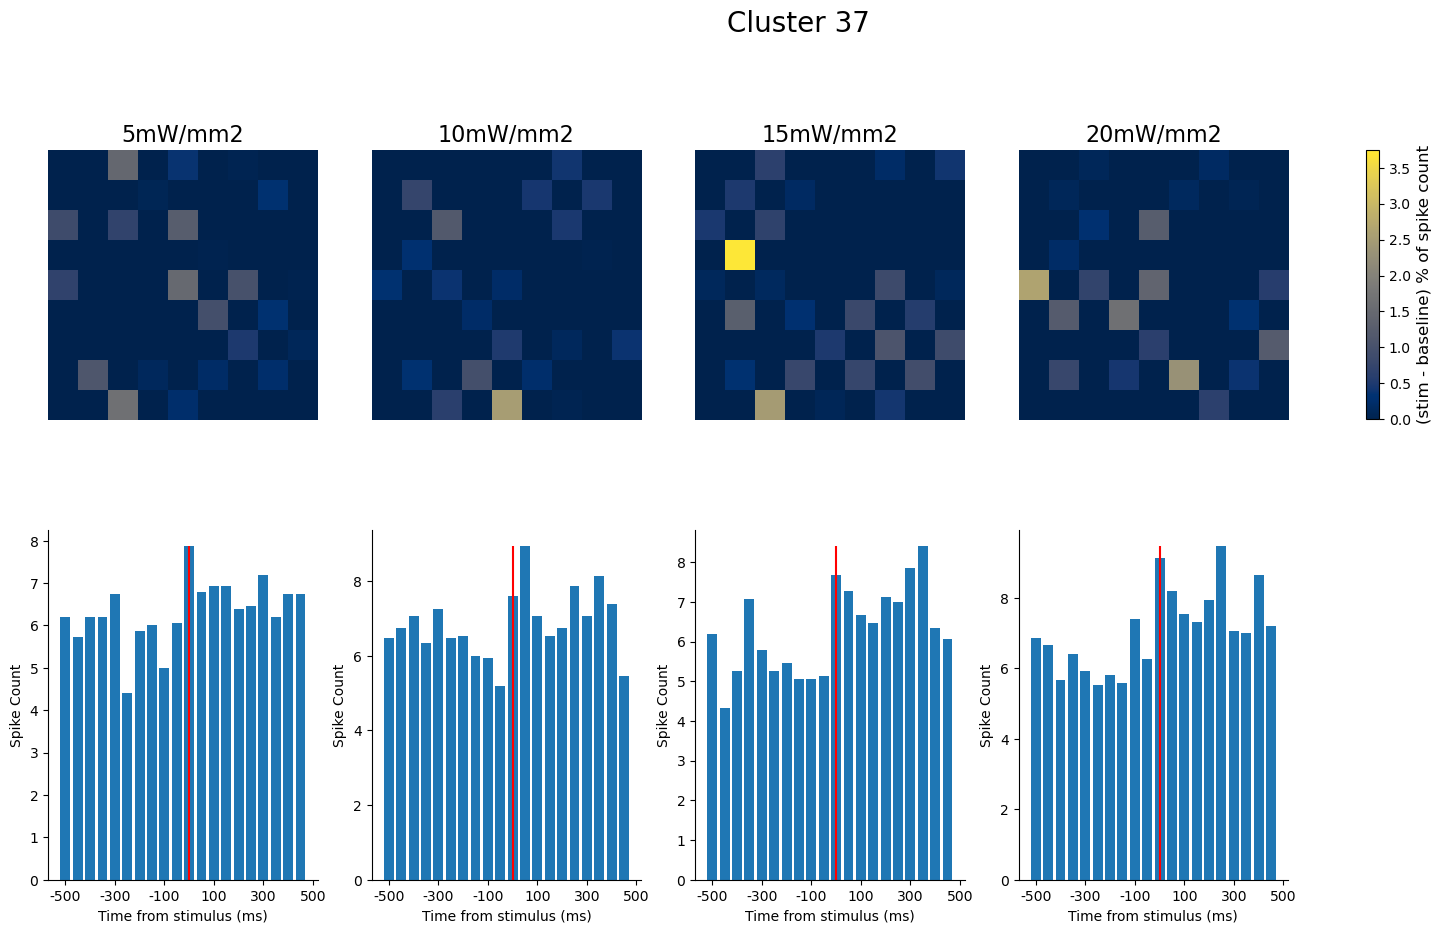

6.933333333333333
23.400000000000002
[-2.00000000e-01 -7.69230769e-02  1.14285714e+00 -3.33333333e-01
  6.00000000e+00  1.50000000e+00  1.42857143e-01  6.25000000e-01
 -2.72727273e-01 -2.31296463e-17 -3.84615385e-01  1.25000000e-01
  2.85714286e-01  1.42857143e+00  2.66666667e+00  6.36363636e-01
  8.33333333e-01  4.44444444e-01  4.76190476e-02 -4.70588235e-01
  5.00000000e-01 -2.22222222e-01 -2.50000000e-01  1.66666667e-01
  5.45454545e-01  1.30434783e-01  5.00000000e+00  1.11111111e-01
  2.00000000e+00 -4.66666667e-01  3.60000000e+00 -1.25000000e-01
  4.44444444e-01 -1.33333333e-01  5.38461538e-01 -2.50000000e-01]
3.4000000000000004
27.666666666666664
[ 2.66666667e+00  1.33333333e+00  1.30104261e-16  1.44444444e+00
 -4.50000000e-01  5.71428571e-01 -5.00000000e-01  6.00000000e-01
  8.57142857e-01  1.37500000e+00  6.00000000e-01  1.89242561e-17
 -3.88888889e-01 -7.50000000e-01 -5.00000000e-01  1.50000000e+00
 -3.07692308e-01  1.66666667e+00 -4.07407407e-01 -7.69230769e-02
 -4.00000000e-

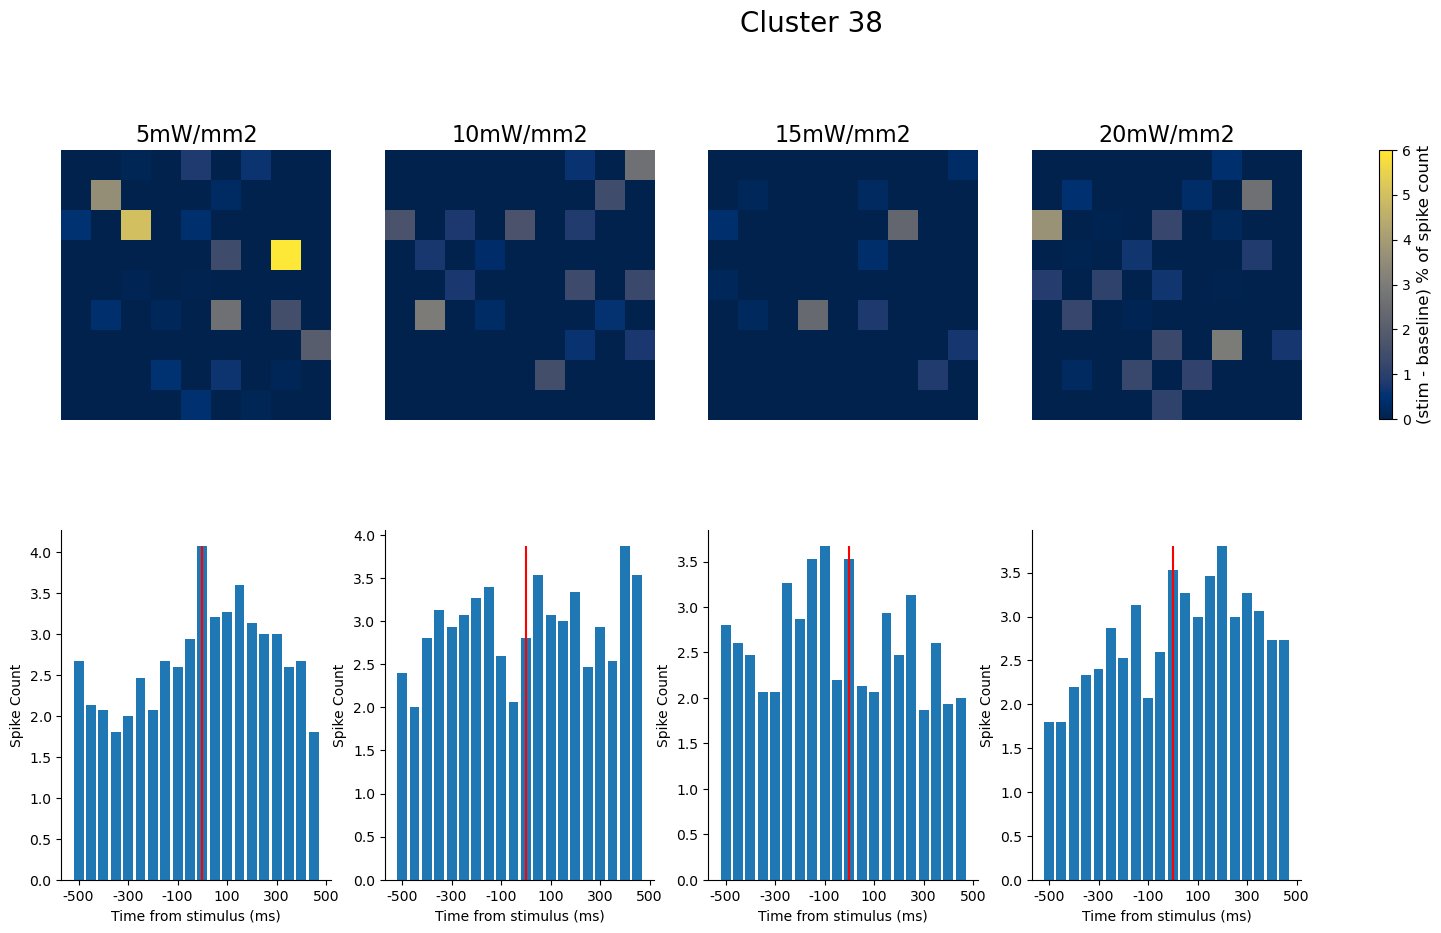

18.200000000000003
4.866666666666666
[ 1.66666667e+00  1.00000000e+01  5.00000000e+00             inf
             inf             inf -4.28571429e-01  2.00000000e+00
  1.90000000e+01 -3.33333333e-01             inf  6.50000000e+00
  1.20000000e+01  2.00000000e+00 -1.38777878e-16  1.60000000e+01
  6.33333333e+00  1.50000000e+00  4.00000000e+00  8.33333333e-01
             inf  1.80000000e+00  1.70000000e+01             inf
  6.00000000e+00  8.00000000e+00             inf  1.50000000e+00
             inf  0.00000000e+00  0.00000000e+00  1.40000000e+01
  4.50000000e+00             inf -2.50000000e-01  3.25000000e+00]
24.73333333333333
4.466666666666668
[        inf  8.          4.                 inf  0.75        2.66666667
 -0.42857143         inf  1.75       18.         27.          7.5
         inf         inf  1.          3.         18.                 inf
  0.75        2.          7.          5.33333333         inf         inf
  1.5        11.                 inf  0.25        7.    

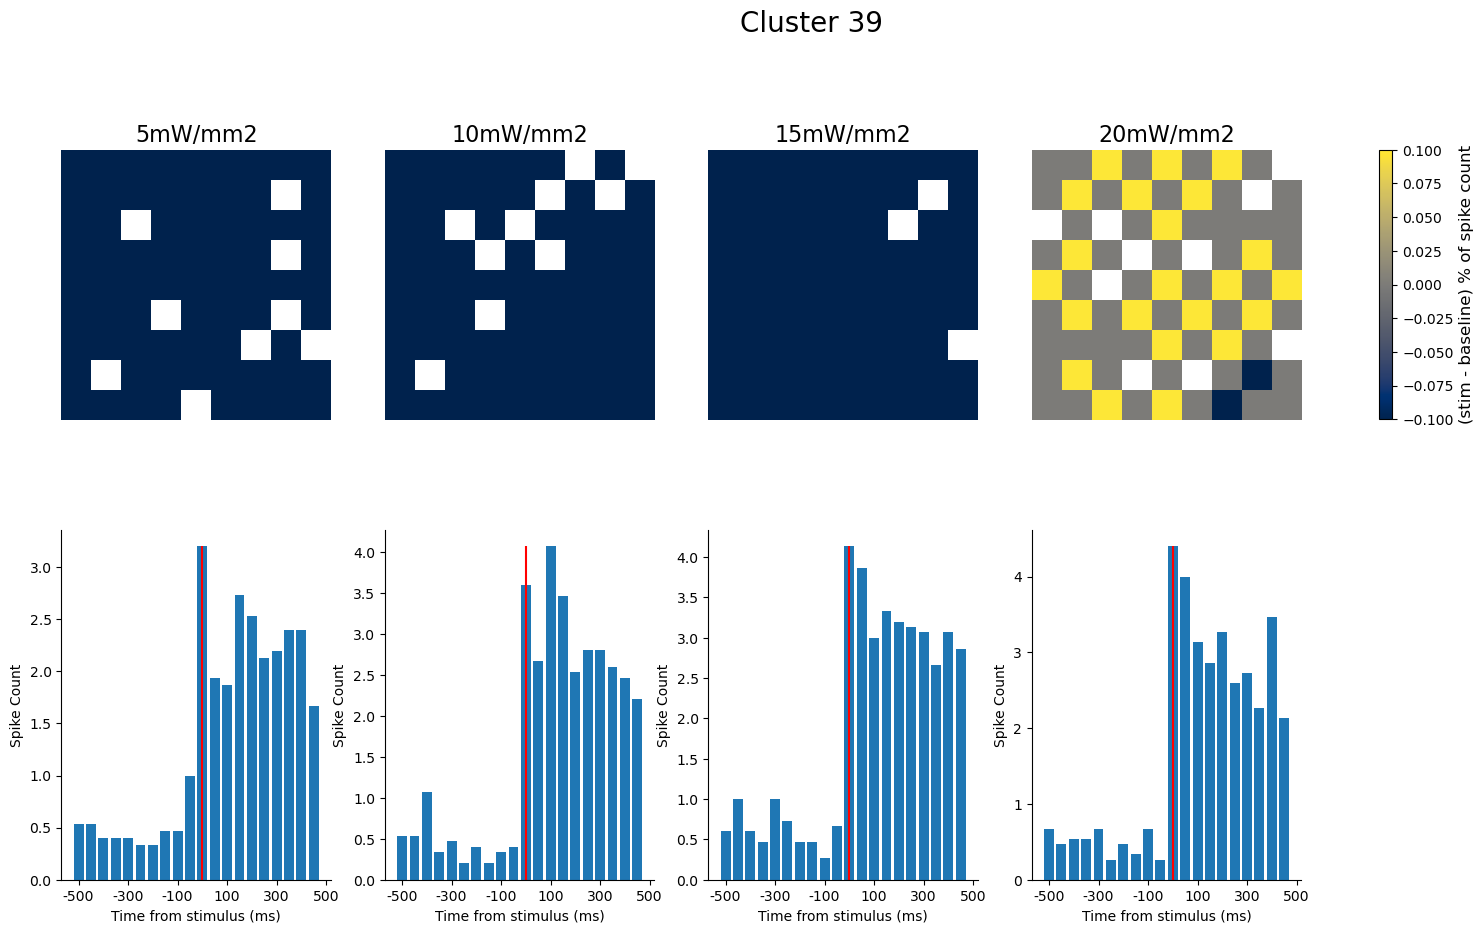

3.466666666666666
12.933333333333334
[-0.5         1.8         1.5         3.          0.5        -0.71428571
  0.         -0.28571429 -0.33333333  2.         -0.33333333  1.2
 -0.14285714 -0.25        0.25        0.66666667 -0.2         2.
  4.33333333  0.16666667         inf -0.375      -0.4         2.66666667
  0.25        0.22222222  1.5         1.          0.14285714  0.
 -0.625       0.66666667  0.66666667  0.33333333 -0.84615385 -0.5       ]
2.6666666666666665
13.666666666666666
[-1.66666667e-01  0.00000000e+00 -5.00000000e-01  2.00000000e-01
  5.00000000e-01 -5.00000000e-01 -2.85714286e-01 -6.00000000e-01
  3.00000000e+00  3.00000000e+00 -1.04083409e-16  3.75000000e-01
             inf -2.50000000e-01 -2.85714286e-01  3.33333333e-01
 -1.25000000e-01  6.00000000e+00 -2.50000000e-01 -5.55555556e-01
  2.50000000e-01  2.00000000e+00             inf -3.33333333e-01
 -5.00000000e-01 -1.11111111e-01  6.66666667e-01 -2.22222222e-01
 -1.42857143e-01 -2.85714286e-01  1.25000000e-01  3.75

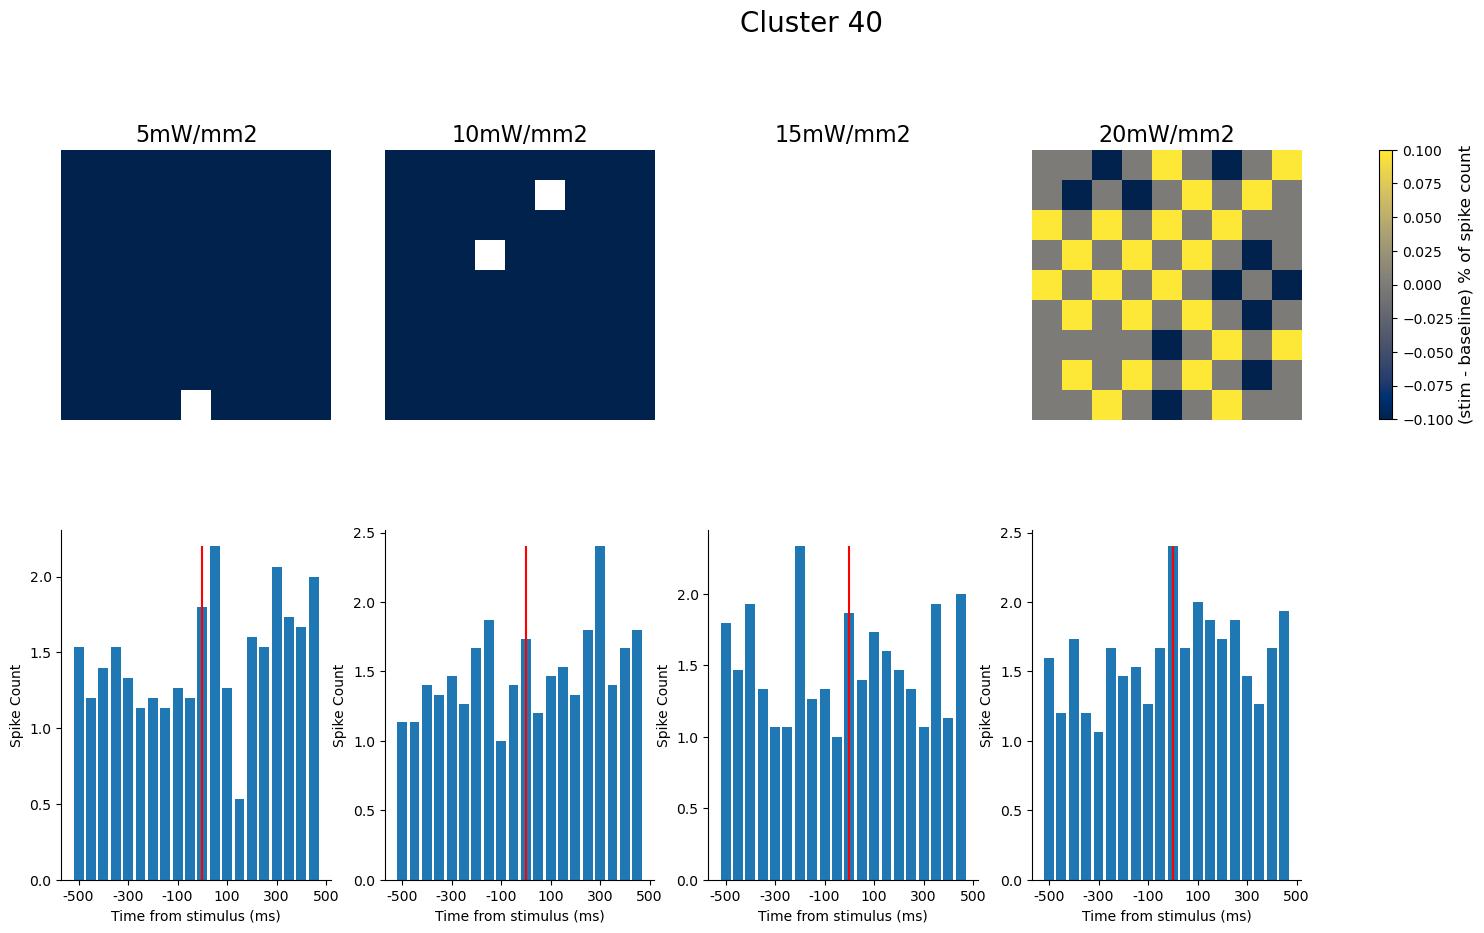

In [20]:
import matplotlib
# plt.style.use('default')
# datar = np.load('data.npy')
# average_data = np.mean(datar, axis=3)
# names = ['5', '10', '15', '20']

# for idc, cluster in enumerate(average_data[:3]):
#     fig, axs = plt.subplots(1, 5, figsize=(30, 4))
    
#     grids = []
#     for i, intens in enumerate(np.rollaxis(cluster, 2)):
#         grid = np.zeros((9, 9))
#         leds = np.mean(intens[50:, :] - intens[:50, :], axis=0)
#         psth = np.mean(intens, axis=1)
        
#         if i == 3:
#             axs[4].bar(np.arange(len(psth)), psth)
#             axs[4].vlines(50, 0, np.max(psth), color='red')
#             axs[4].spines['top'].set_visible(False)
#             axs[4].spines['right'].set_visible(False)


#         for c, l in zip(coords, leds):
#             grid[c[0], c[1]] = l
#         grids.append(grid)
#         axs[i].imshow(grid, cmap='inferno', vmin=0, vmax=np.max(grid))
#         axs[i].axis('off')
#         axs[i].set_title('{}mW/mm2'.format(names[i]))        
    
#     fig.suptitle('Cluster {}'.format(idc), fontsize=20)
#     plt.tight_layout()
#     plt.show()
#     plt.close()  

plt.style.use('default')
datar = np.load('data_50.npy')
average_data = np.mean(datar, axis=3)
names = ['5', '10', '15', '20']

for idc, cluster in enumerate(average_data[:41]):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    
    grids = []
    for i, intens in enumerate(np.rollaxis(cluster, 2)):
        grid = np.zeros((9, 9))
        leds = np.sum(intens[10:, :] - intens[:10, :], axis=0)*100 / np.sum(intens[:10, :], axis=0)
        print(leds)
        psth = np.sum(intens, axis=1)
        
        axs[1, i].bar(np.arange(len(psth)), psth)
        axs[1, i].vlines(10, 0, np.max(psth), color='red')
        axs[1, i].spines['top'].set_visible(False)
        axs[1, i].spines['right'].set_visible(False)
        axs[1, i].set_xticks([0, 4, 8, 12, 16, 20])
        axs[1, i].set_xticklabels(['-500', '-300', '-100', '100', '300', '500'])
        axs[1, i].set_xlabel('Time from stimulus (ms)')
        axs[1, i].set_ylabel('Spike Count')


        for c, l in zip(coords, leds):
            grid[c[0], c[1]] = l
        grids.append(grid)
    
    for i, grid in enumerate(grids):
        im = axs[0, i].imshow(grid, cmap='cividis', vmin=0, vmax=np.max(grids))
        axs[0, i].axis('off')
        axs[0, i].set_title('{}mW/mm2'.format(names[i]), fontsize=16)        
    

    cbar = plt.colorbar(im, ax=axs.ravel().tolist(), shrink=0.35, anchor=(0, 0.92))
    cbar.set_label(label='(stim - baseline) % of spike count', fontsize=12)
    fig.suptitle('Cluster {}'.format(idc), fontsize=20)
    plt.savefig('Figures/complete_panel_{}.png'.format(idc))
    plt.show()
    plt.close()  


    

In [ ]:
# Structure of array is dict[stim_number][presentation_number] containg a number_of_cluster * spikes matrix
baselines = {}
for i, ttl in enumerate(first_ttls):
    spikes = sp_times[sp_times > ttl - 10000]
    spikes = spikes[spikes < ttl]

    baselines[i] = [(np.intersect1d(sp_times[idx_clu], spikes) - ttl)/20 for idx_clu in idxs_clu]

print(len(baselines))


2160


In [ ]:
# Averageover all presentations
n_pres = 15
n_stim_pre_pres = 144
n_chan = 65

mean_pres = {}
for i in range(n_stim_pre_pres):
    mean_pres[i] = {}
    for chan in range(n_chan):
        mean_pres[i][chan] = np.array([])


for p in range(n_pres):
    for s in range(n_stim_pre_pres):
        for chan in range(len(presentation[0])):
            mean_pres[s][chan] = np.append(mean_pres[s][chan], presentation[p*144+s][chan])

KeyError: 65

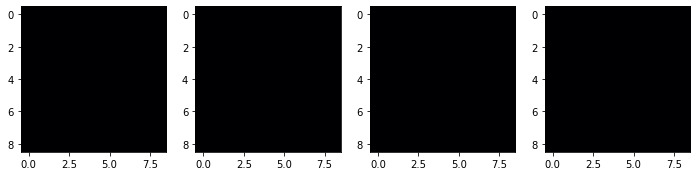

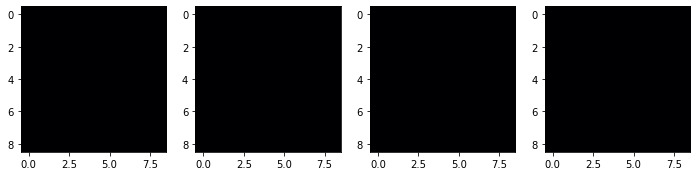

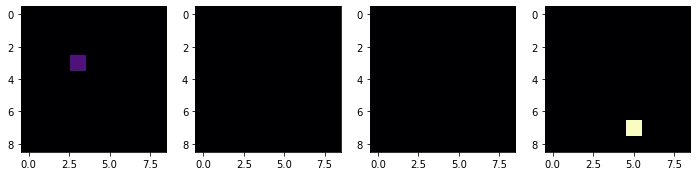

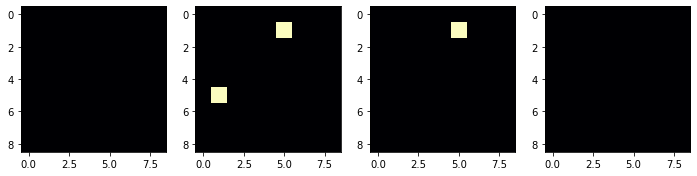

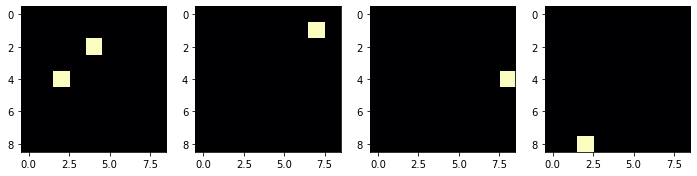

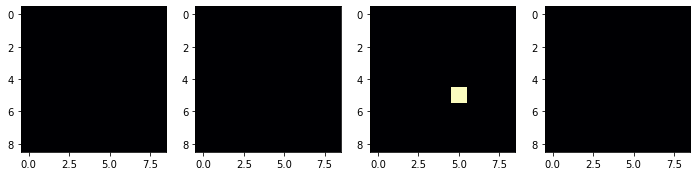

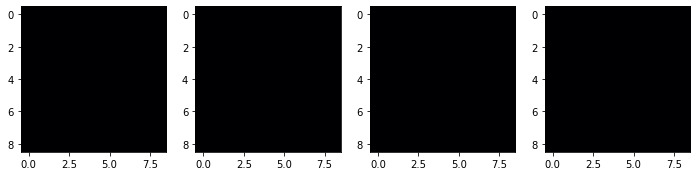

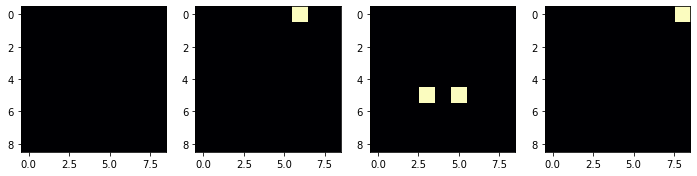

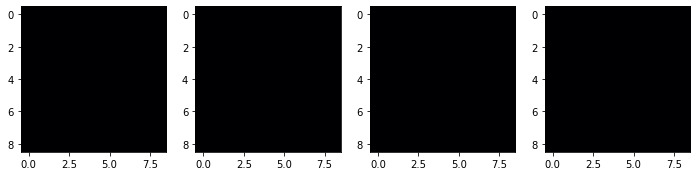

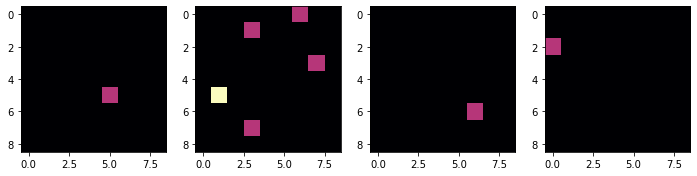

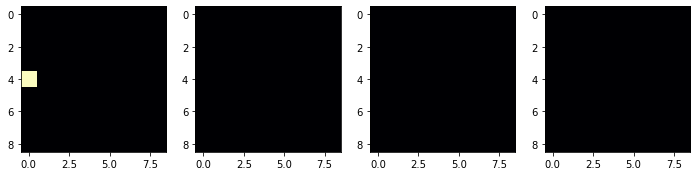

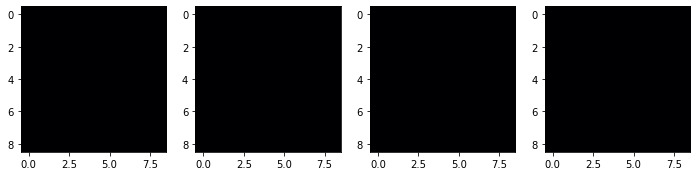

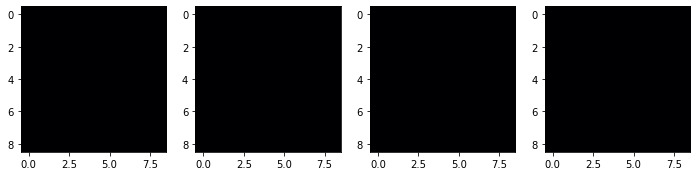

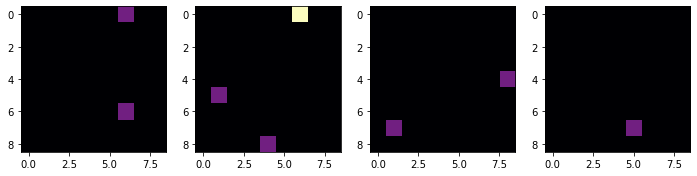

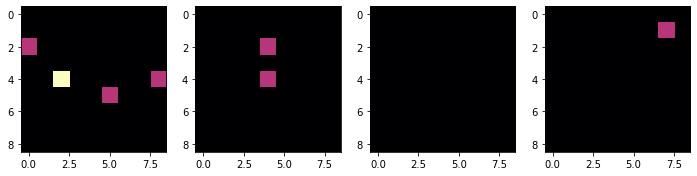

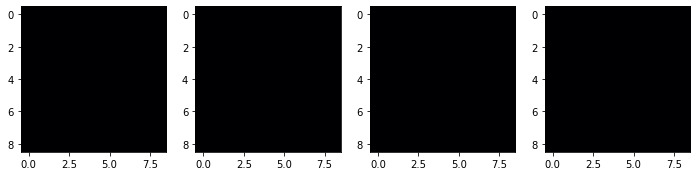

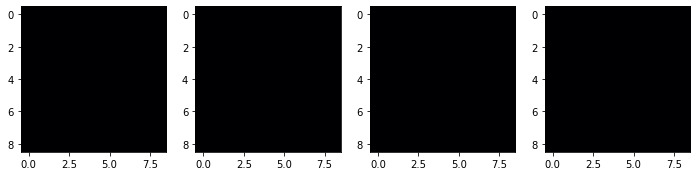

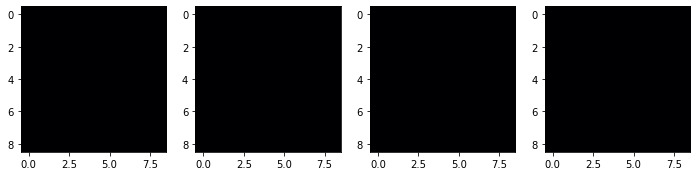

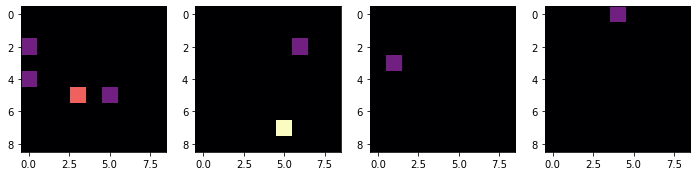

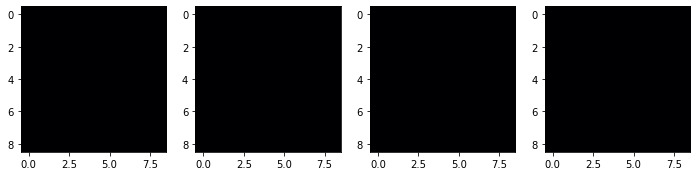

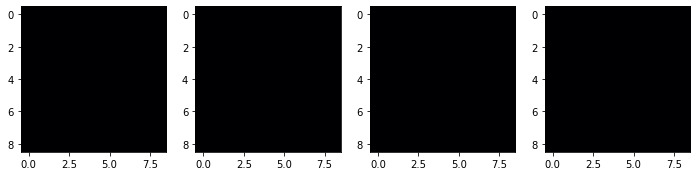

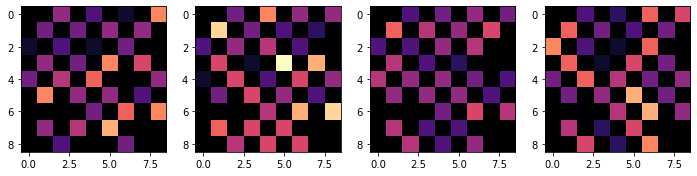

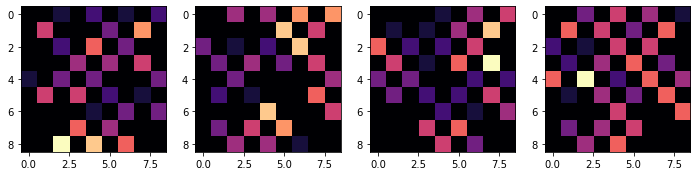

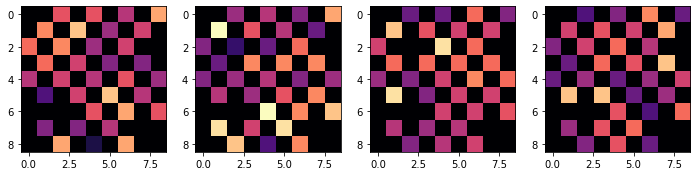

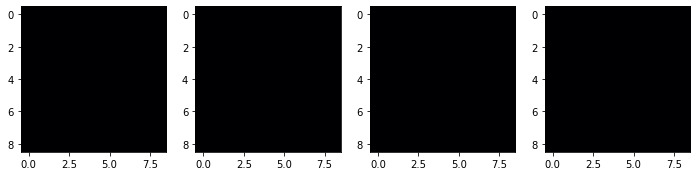

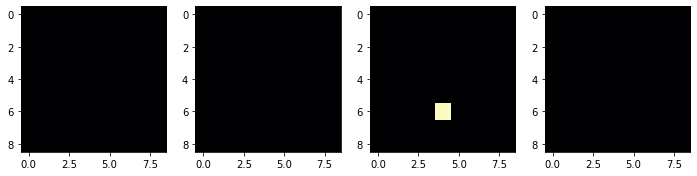

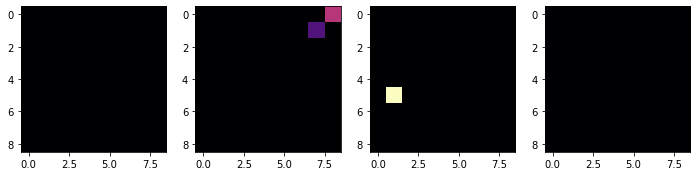

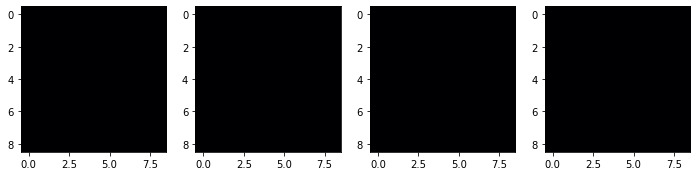

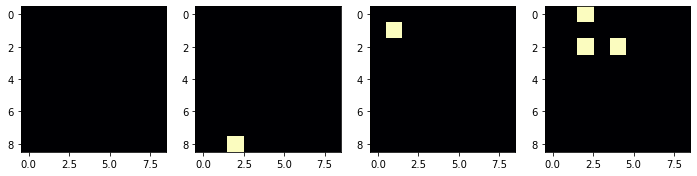

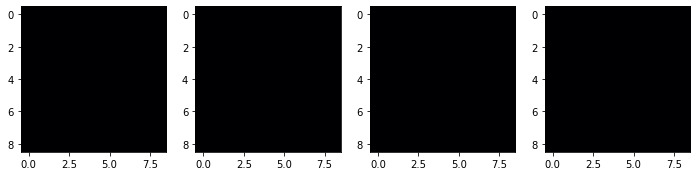

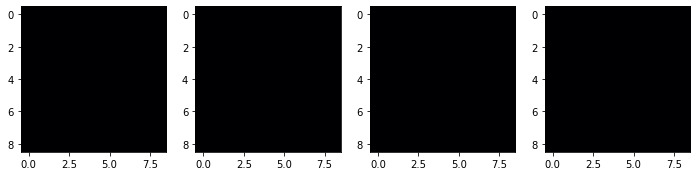

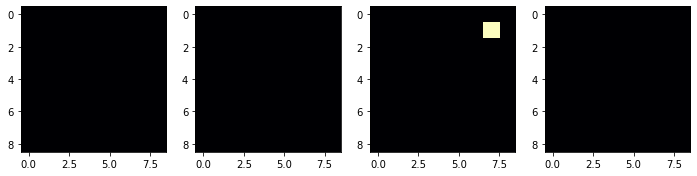

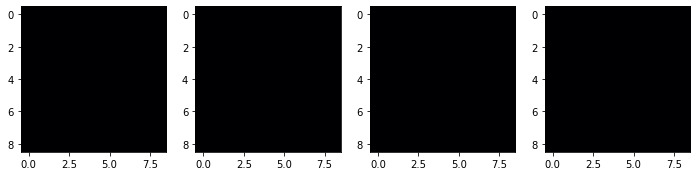

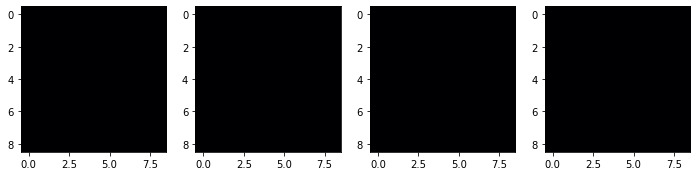

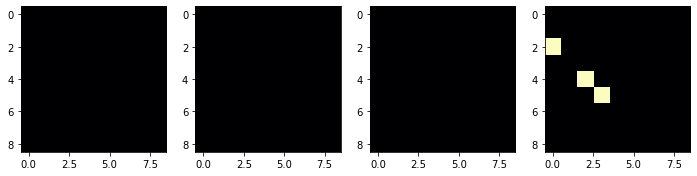

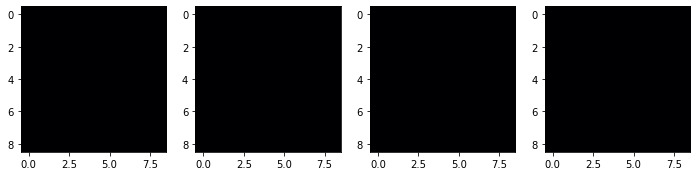

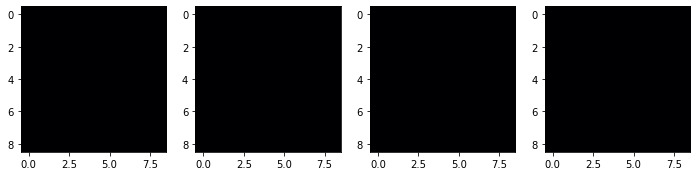

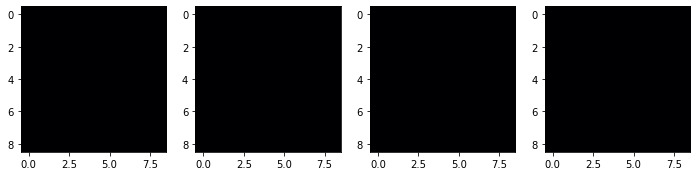

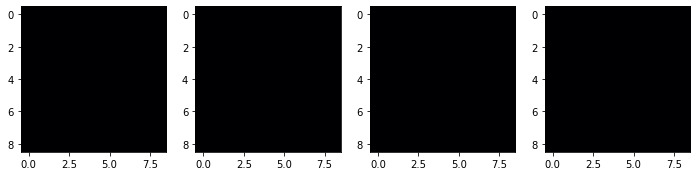

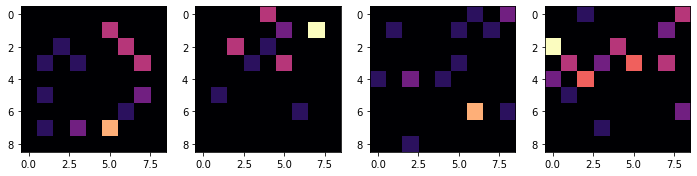

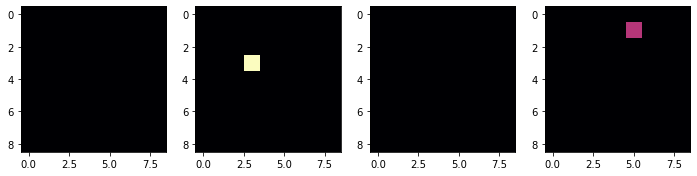

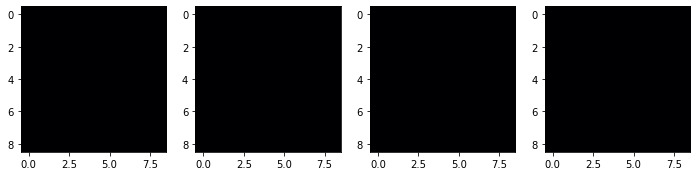

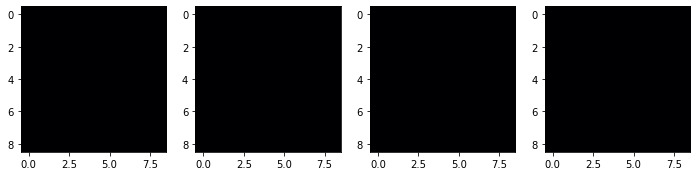

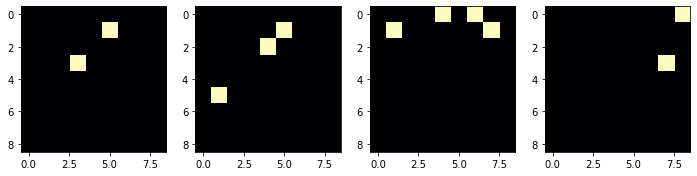

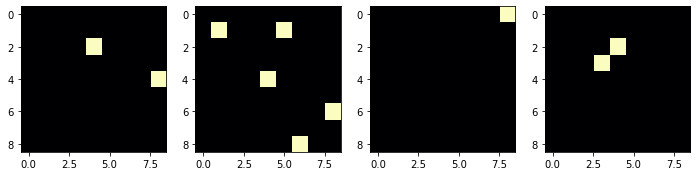

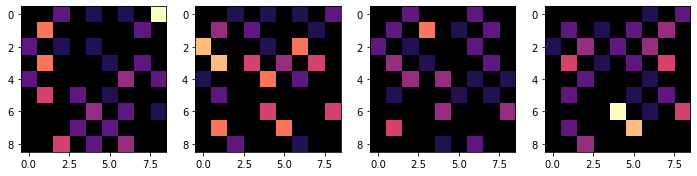

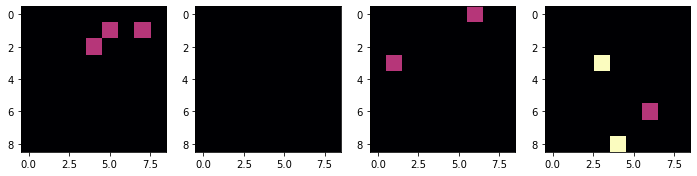

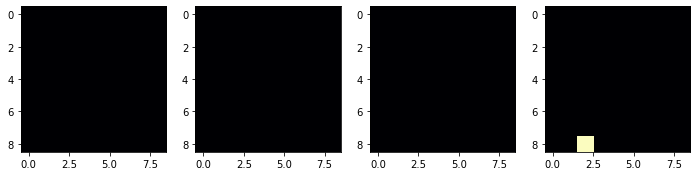

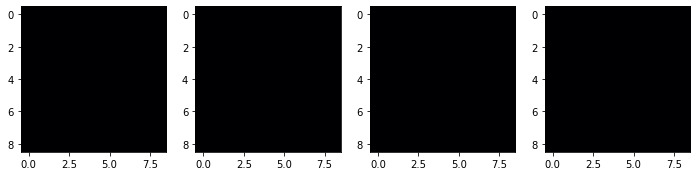

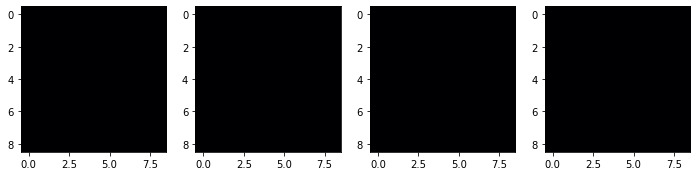

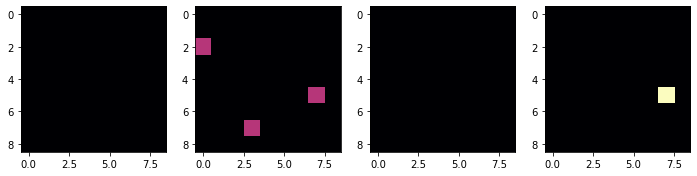

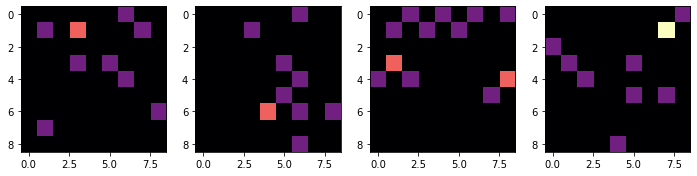

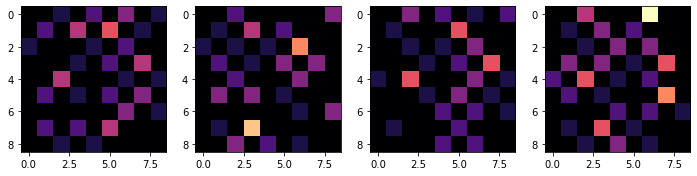

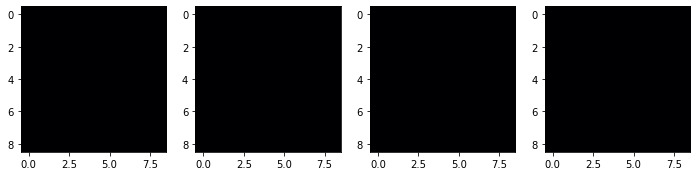

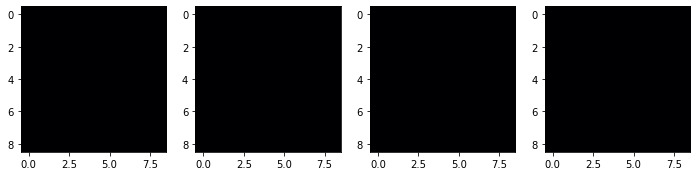

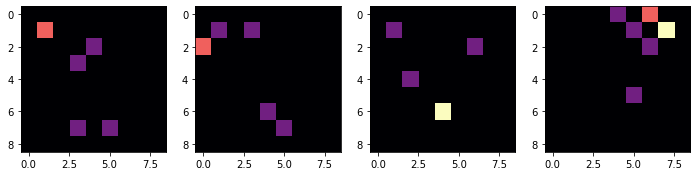

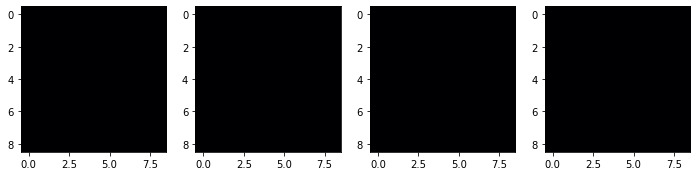

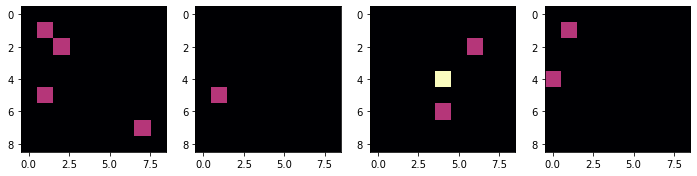

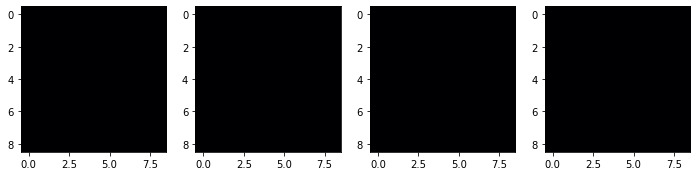

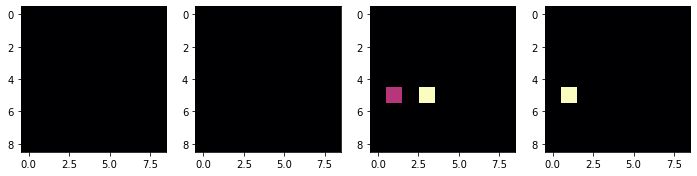

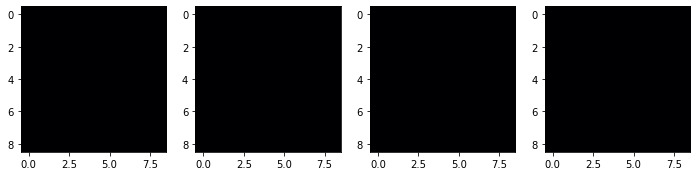

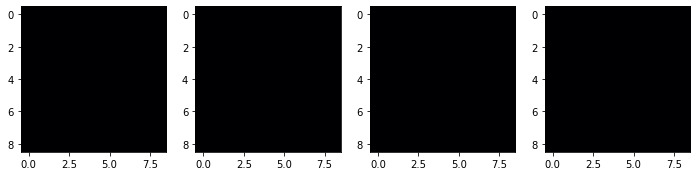

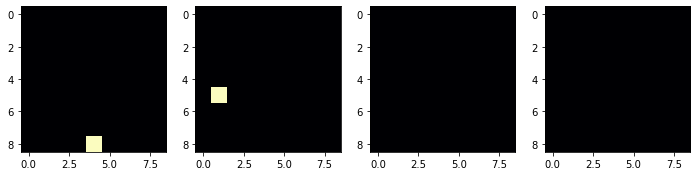

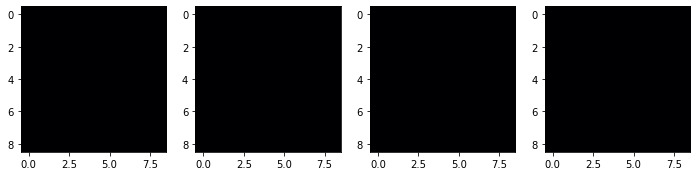

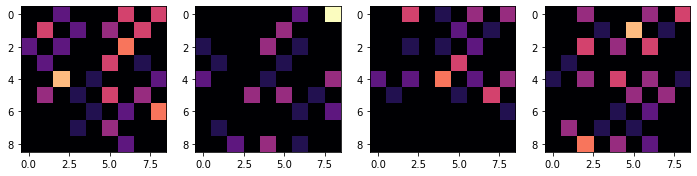

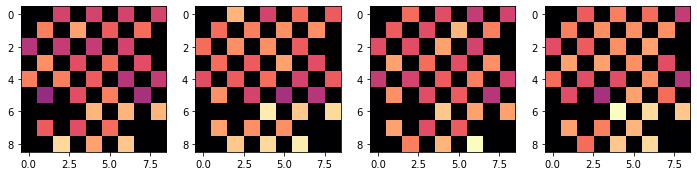

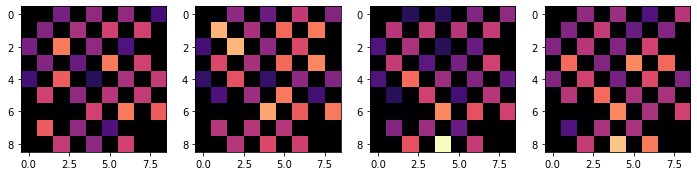

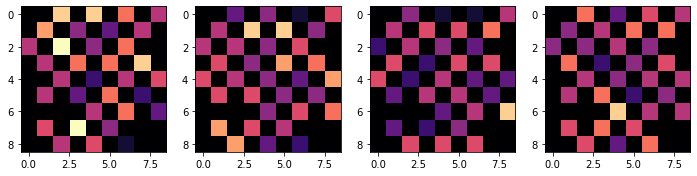

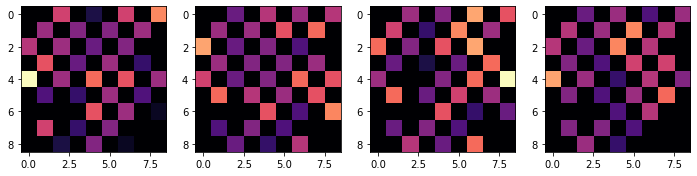

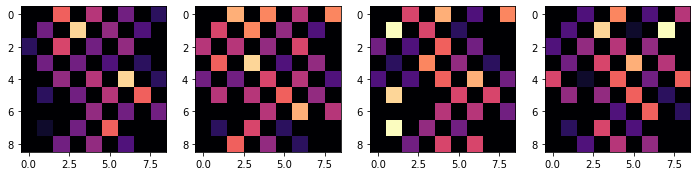

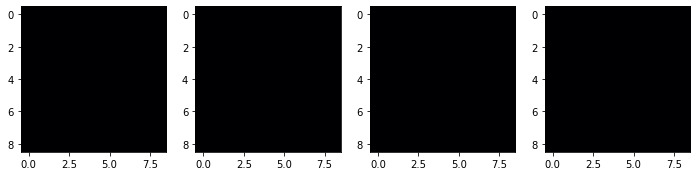

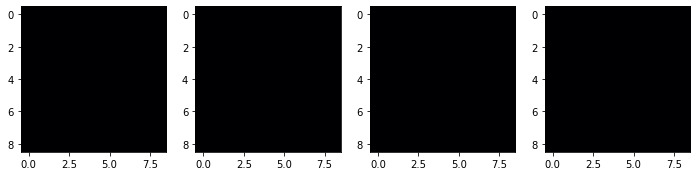

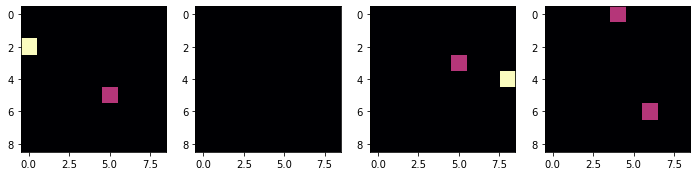

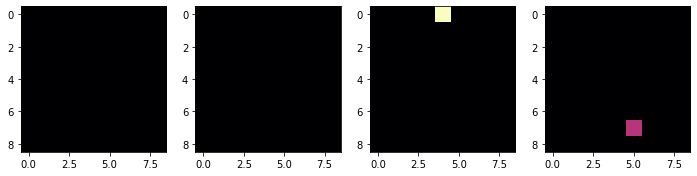

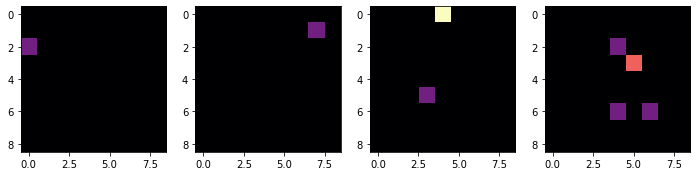

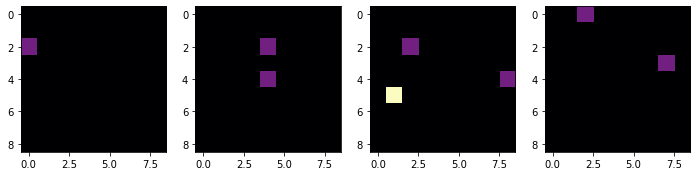

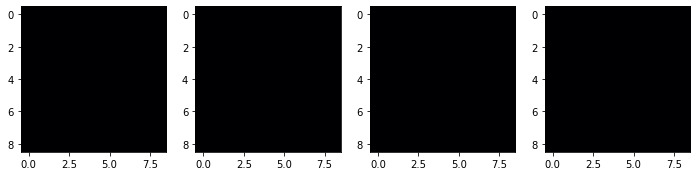

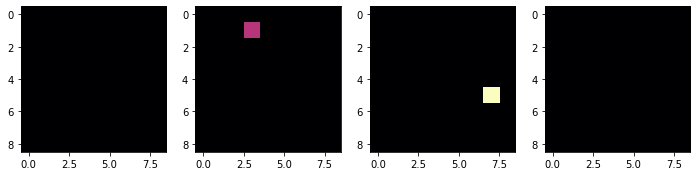

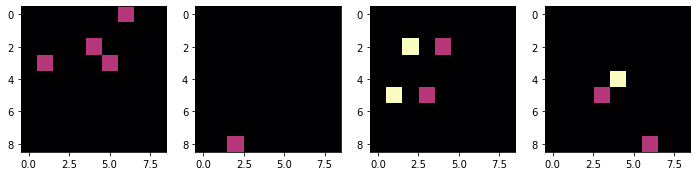

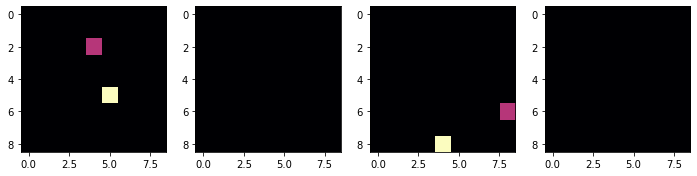

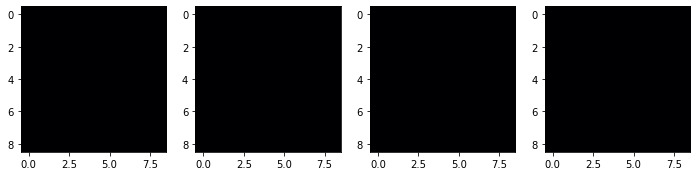

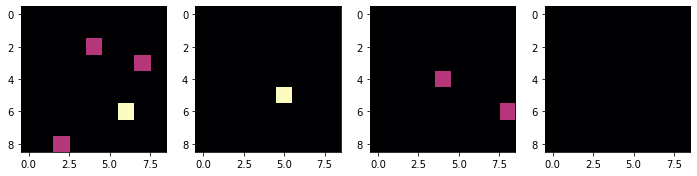

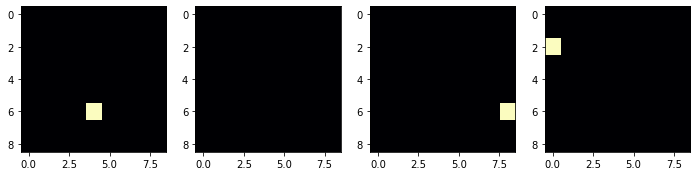

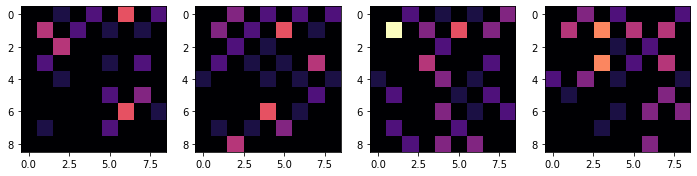

In [ ]:
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

for chan in range(84):
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    actis = []
    for i, intensity in enumerate([int_5, int_10, int_15, int_20]):
        leds_b, leds = [], []
        array_leds, array_leds_b = np.zeros((9, 9)), np.zeros((9, 9))
        for led in intensity:
            leds.append(len(presentation[led][chan]))
            leds_b.append(len(baselines[led][chan]))
    
        leds = np.array(leds).reshape(15, 36)
        leds_b = np.array(leds_b).reshape(15, 36)

        leds = np.mean(leds, axis=0)
        leds_b = np.mean(leds_b, axis=0)

        for l, c in zip(leds, coords):
            array_leds[c[0], c[1]] = l
        
        for l, c in zip(leds_b, coords):
            array_leds_b[c[0], c[1]] = l


        actis.append((array_leds - array_leds_b).reshape(9, 9))
    actimax = np.max(actis)
    axs[0].imshow(actis[0], vmin=0, vmax=actimax, cmap='magma')
    axs[1].imshow(actis[1], vmin=0, vmax=actimax, cmap='magma')
    axs[2].imshow(actis[2], vmin=0, vmax=actimax, cmap='magma')
    axs[3].imshow(actis[3], vmin=0, vmax=actimax, cmap='magma')

    plt.show()
    plt.close()

In [ ]:
# Faire PSTH sur les canaux intéressant. pour toutes les leds, tous les points

In [ ]:
channel = 64
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

# Courbe temps d'activation en fonction du temps avec binnage de 25 ms

for i, intensity in enumerate([int_5, int_10, int_15, int_20]):
    leds = []
    array_leds, array_leds_b = np.zeros((9, 9)), np.zeros((9, 9))
    for led in intensity:
        print(presentation[led][64])


[24.85]
[]
[24.5]
[25.05]
[]
[26.65]
[]
[]
[25.4]
[25.3]
[]
[26.45]
[25.65]
[]
[]
[24.95]
[25.15]
[24.7]
[24.8]
[25.]
[24.25]
[25.55]
[]
[]
[24.5]
[]
[25.3]
[25.]
[]
[]
[27.3]
[]
[]
[24.5]
[24.9]
[24.95]
[25.2]
[25.]
[25.6]
[25.3]
[]
[25.15]
[]
[24.9]
[24.75]
[]
[]
[24.2]
[25.45]
[24.95]
[24.95]
[25.3]
[25.9]
[25.6]
[25.1]
[]
[]
[24.95]
[24.6]
[]
[24.9]
[24.8]
[25.3]
[25.15]
[]
[24.65]
[]
[24.9]
[25.2]
[24.25]
[24.85]
[26.15]
[]
[25.5]
[24.6]
[25.45]
[25.45]
[24.7]
[]
[25.3]
[25.55]
[24.95]
[24.4]
[]
[25.55]
[]
[24.3]
[25.45]
[25.4]
[25.2]
[24.9]
[24.5]
[]
[25.6]
[24.95]
[24.7]
[25.1]
[]
[]
[]
[24.55]
[]
[]
[]
[25.1]
[]
[25.]
[]
[26.5]
[25.05]
[25.3]
[25.45]
[24.65]
[]
[]
[]
[25.25]
[25.25 25.3 ]
[25.1]
[24.45]
[]
[24.75]
[26.5]
[24.55]
[25.1]
[27.5]
[24.85]
[24.65]
[24.55]
[]
[25.]
[ 0.15 24.65]
[24.8]
[]
[]
[ 0.3  25.15]
[25.3]
[24.45]
[24.85]
[24.6]
[25.75]
[24.6]
[]
[25.95]
[]
[25.25]
[]
[24.75]
[ 0.35 49.9 ]
[ 0.25 24.65]
[]
[25.7]
[24.7]
[25.25]
[24.95]
[]
[25.35]
[24.9]
[ 0.35 2

In [ ]:
# Regarder par channel +++ car sinon les différences de spiking entre les sites de recording vont moyennes les rations d'upspiking

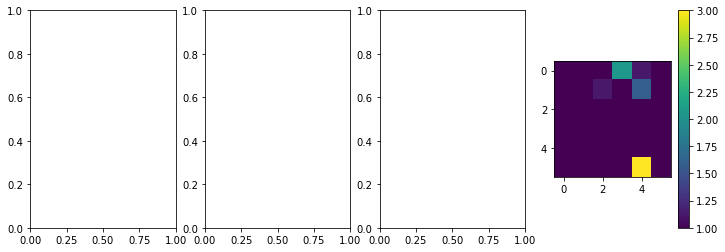

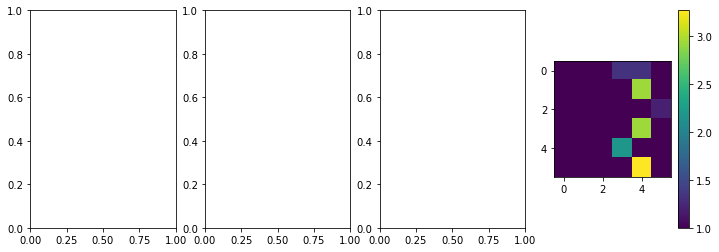

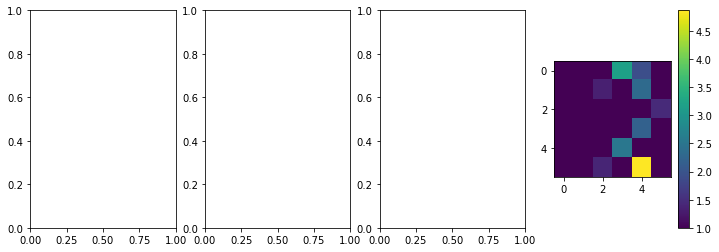

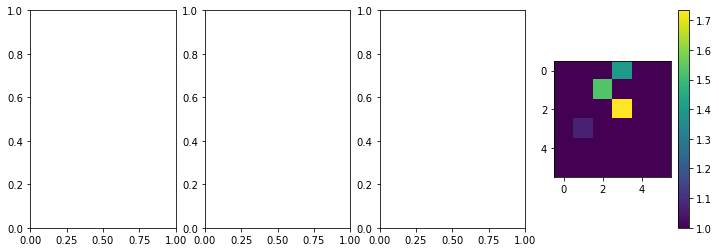

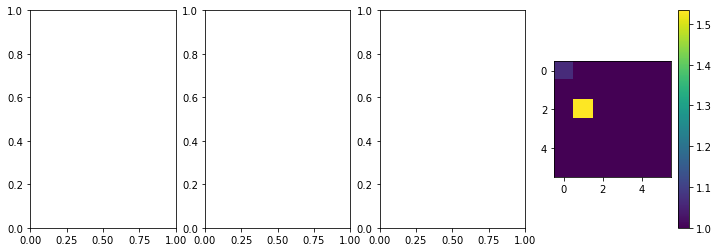

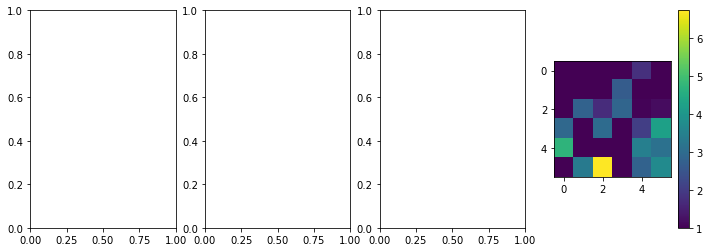

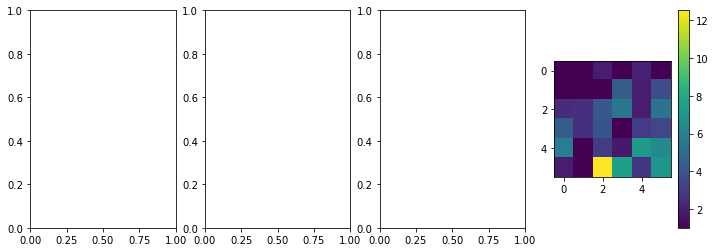

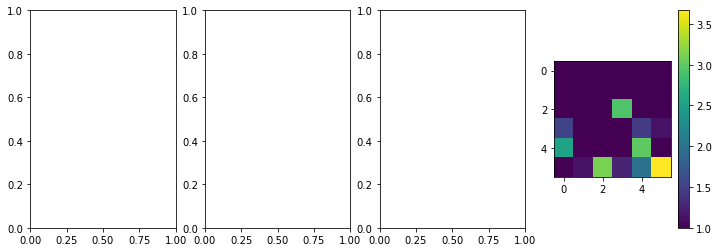

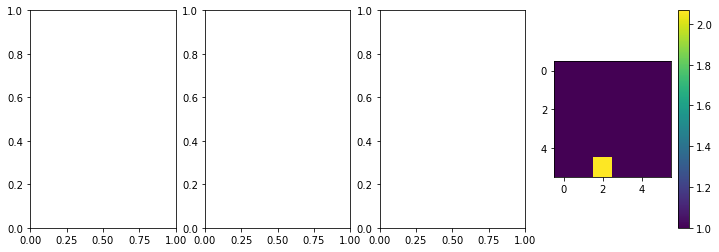

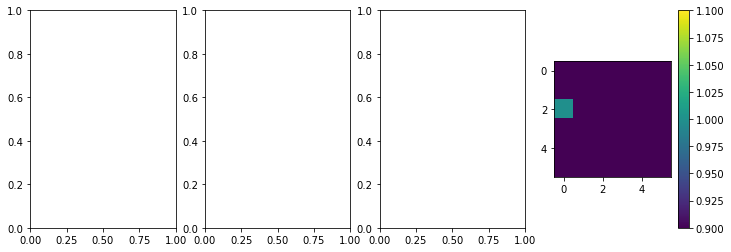

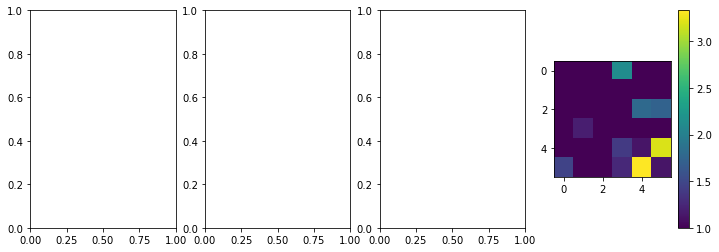

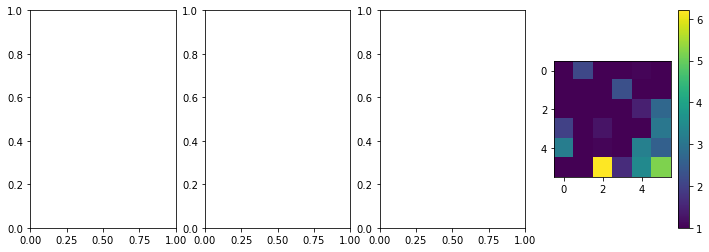

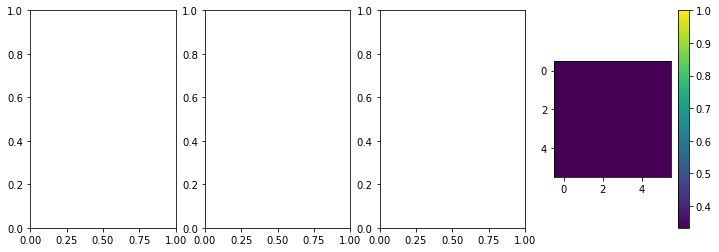

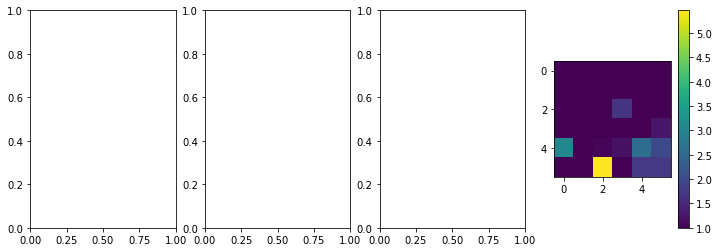

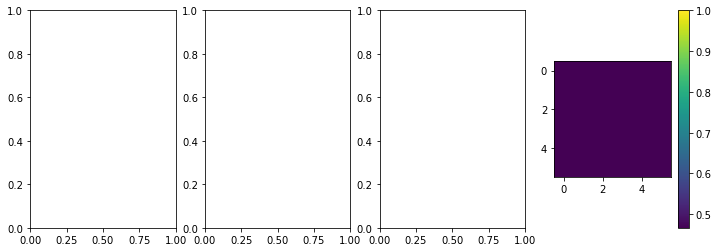

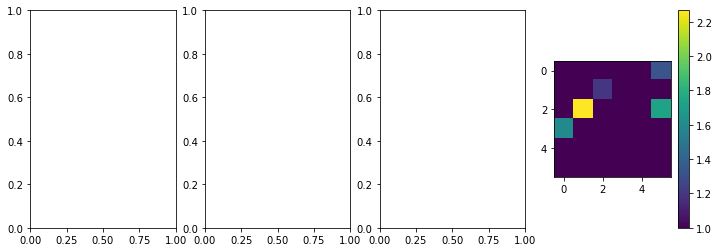

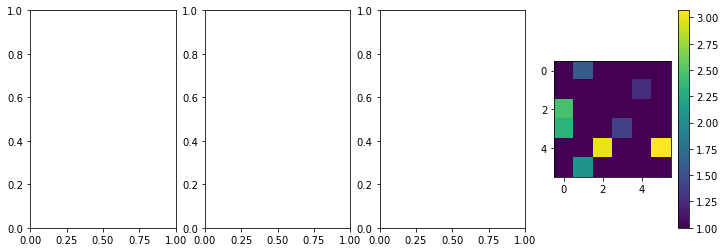

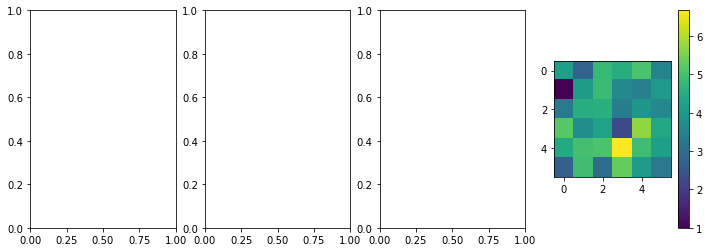

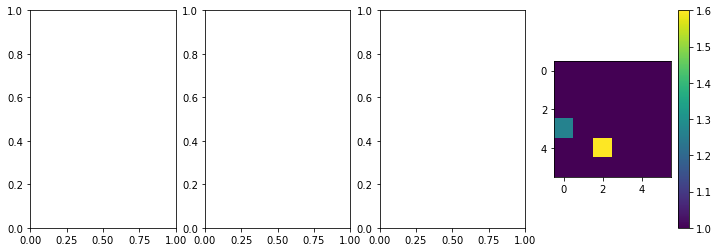

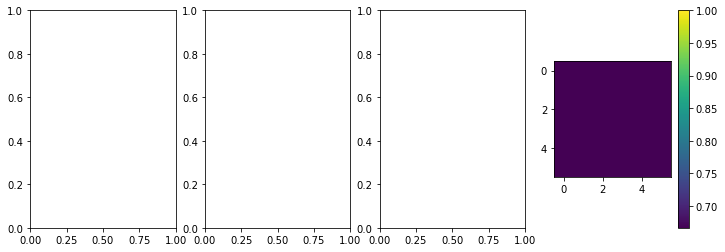

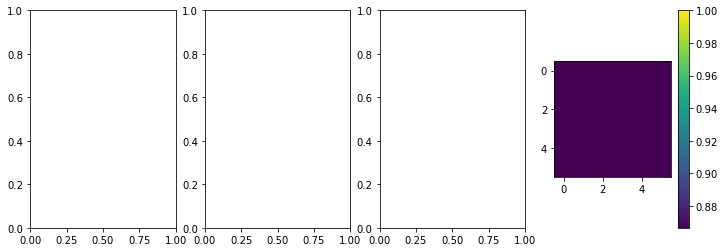

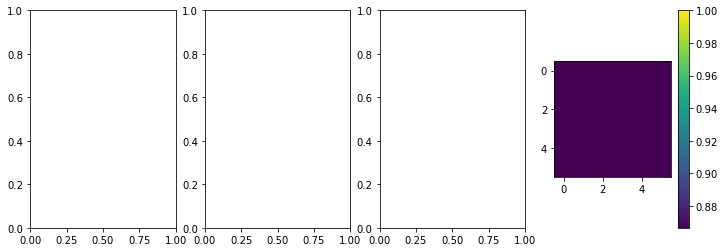

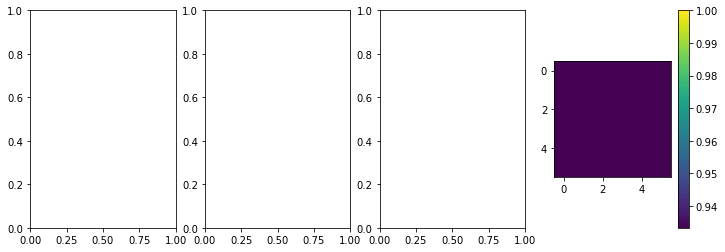

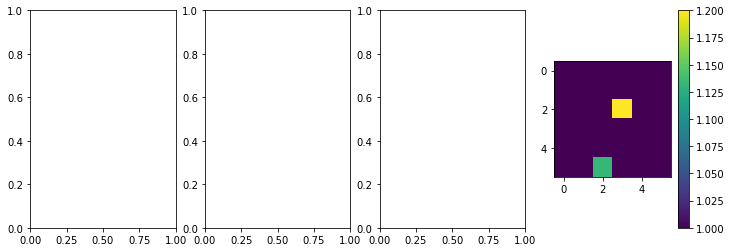

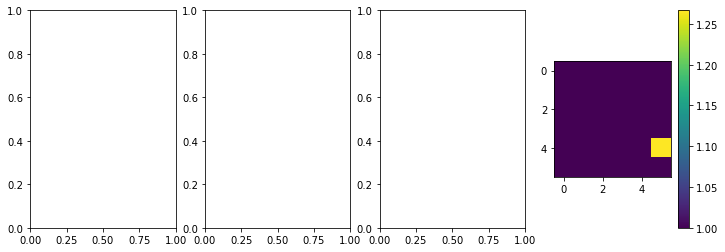

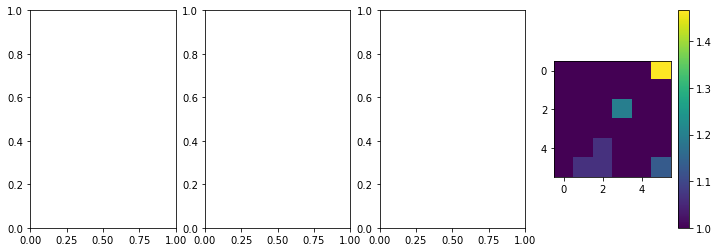

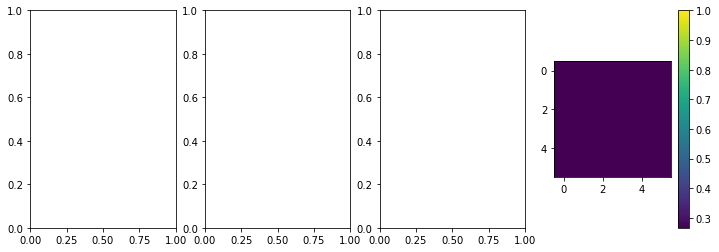

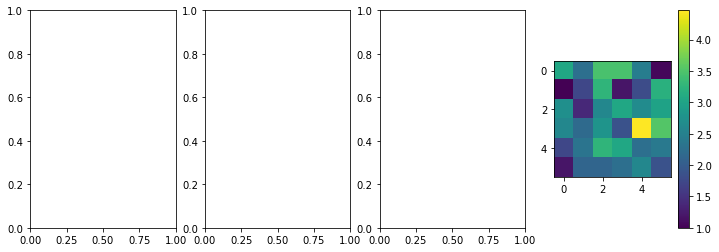

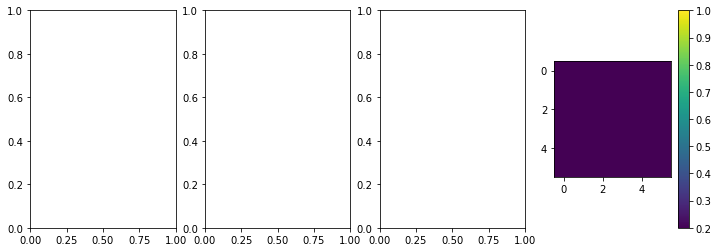

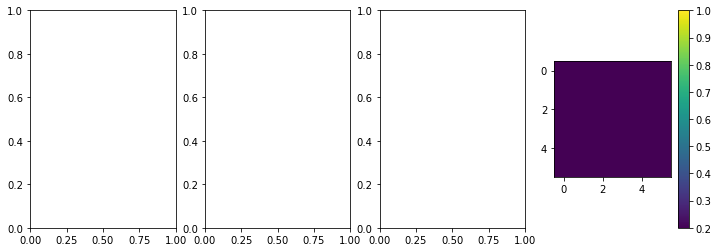

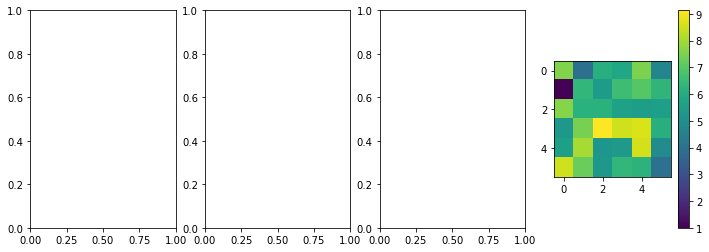

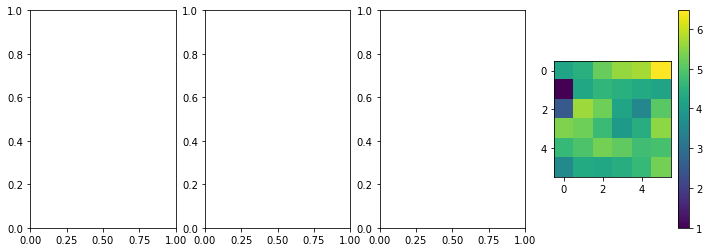

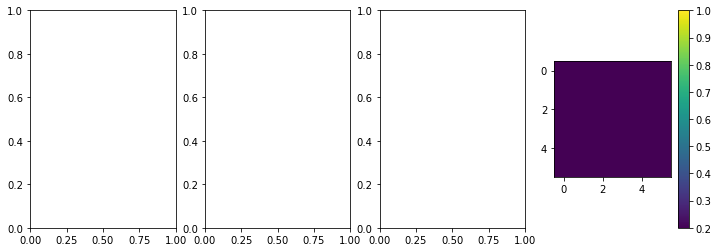

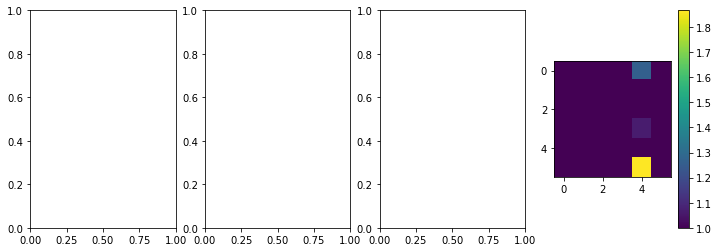

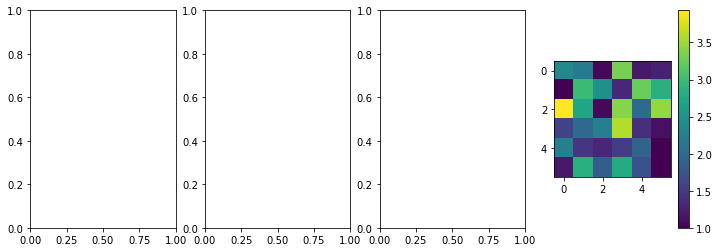

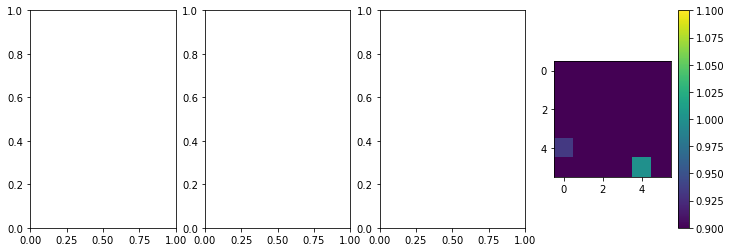

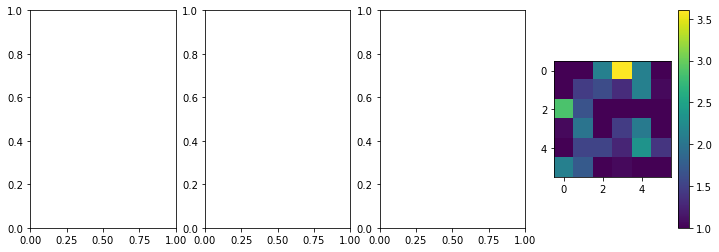

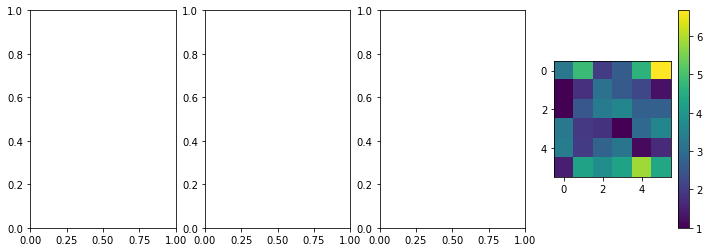

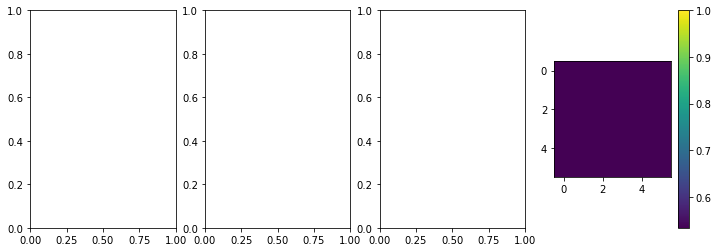

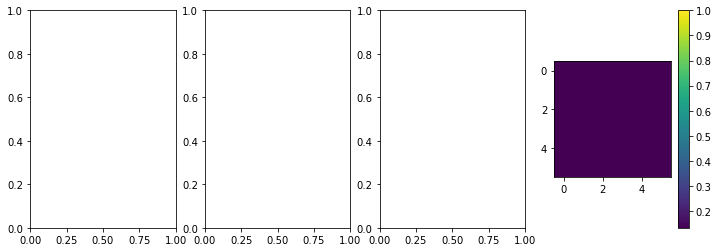

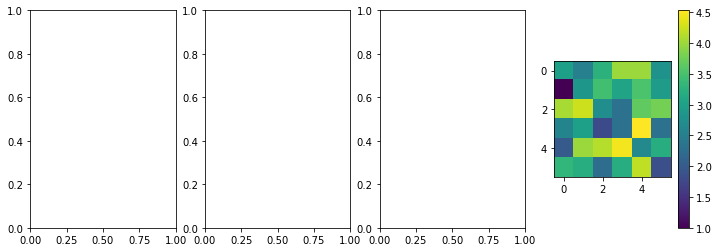

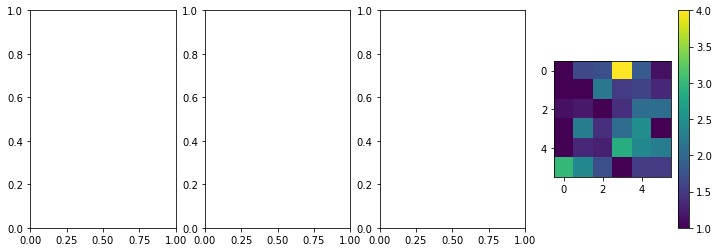

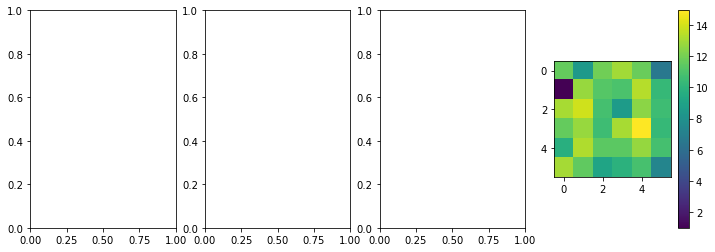

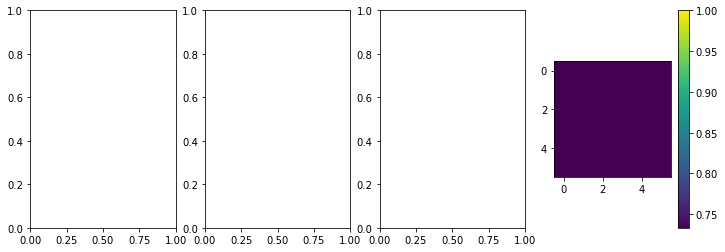

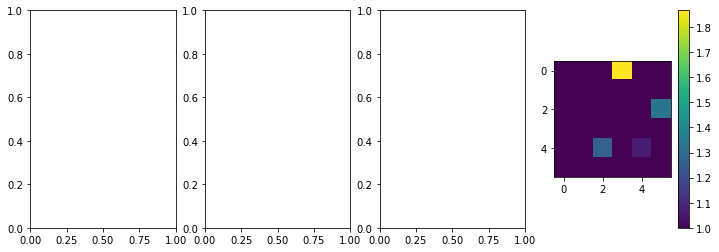

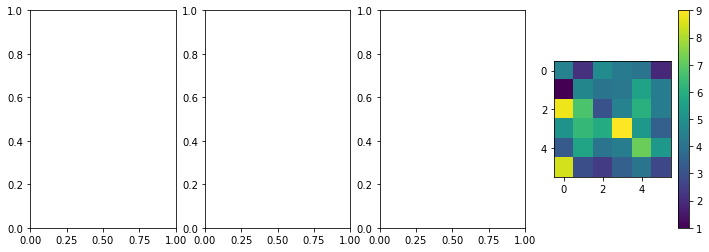

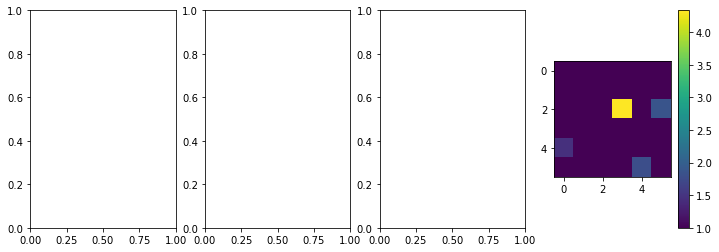

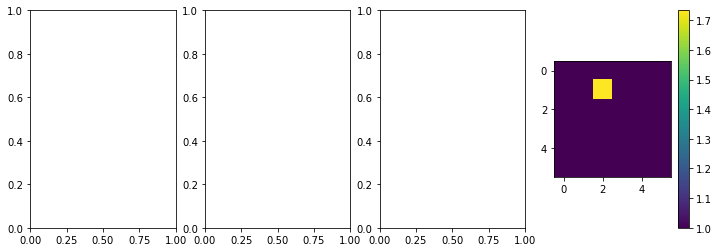

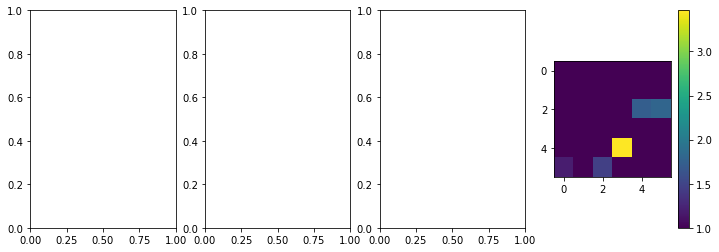

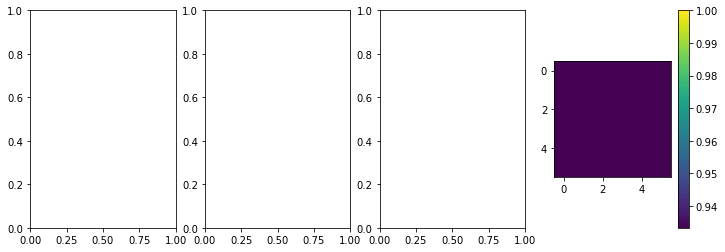

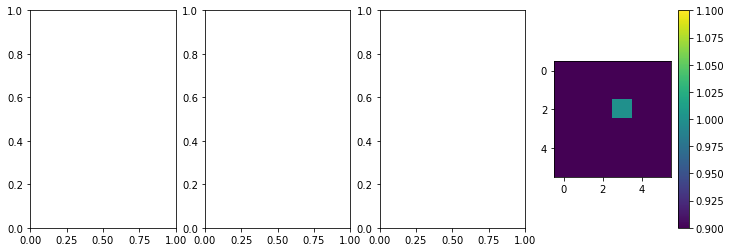

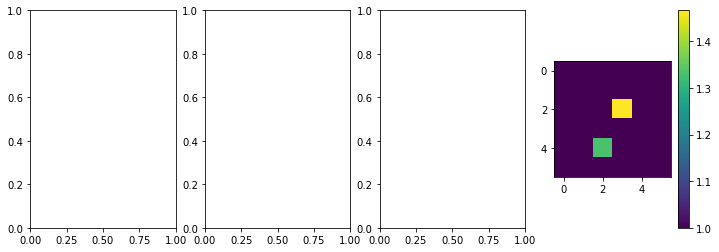

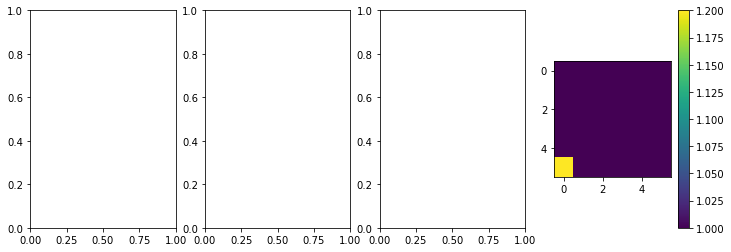

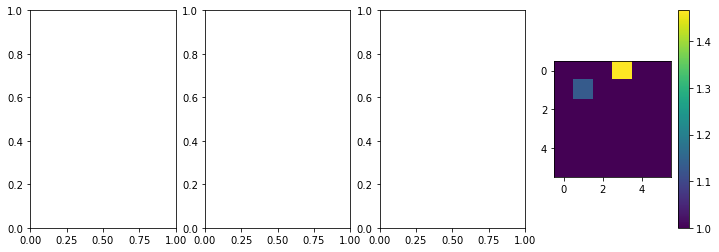

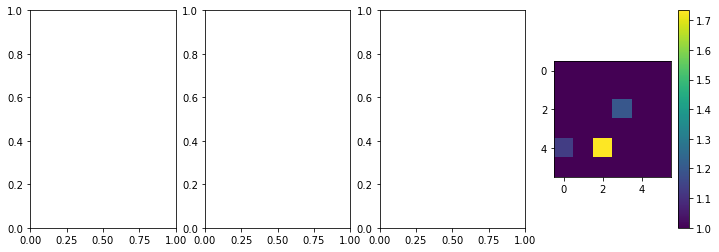

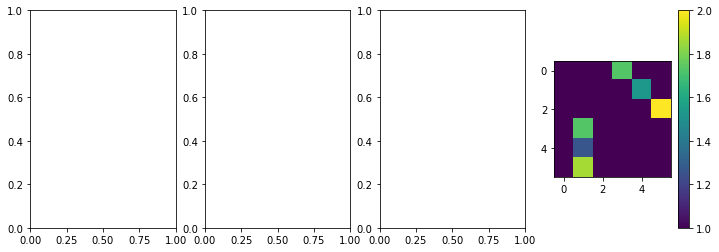

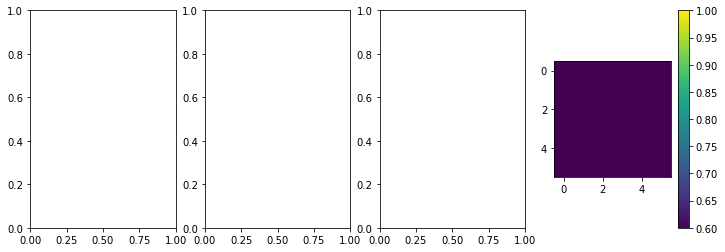

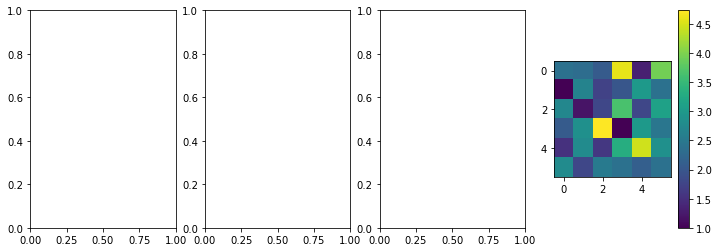

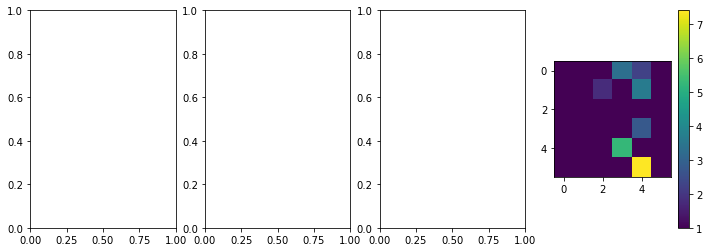

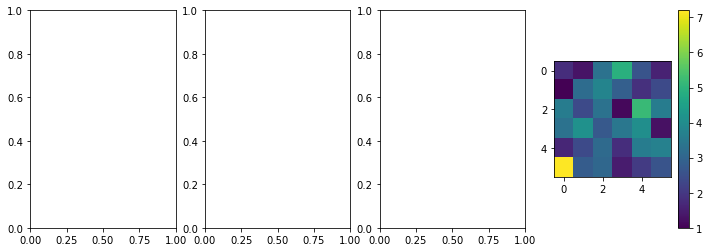

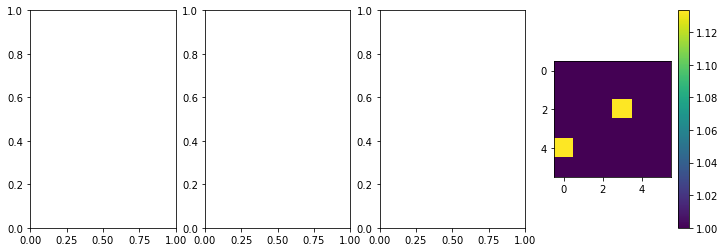

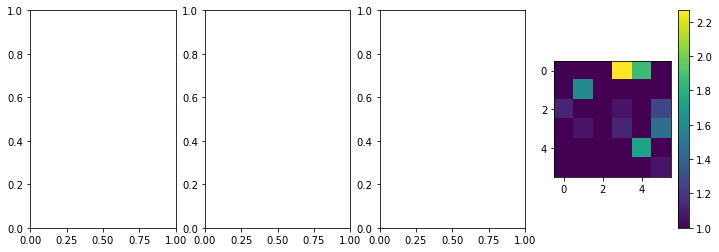

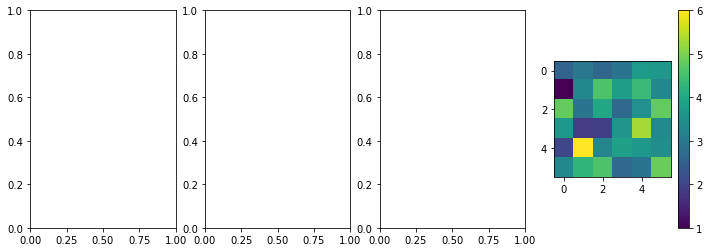

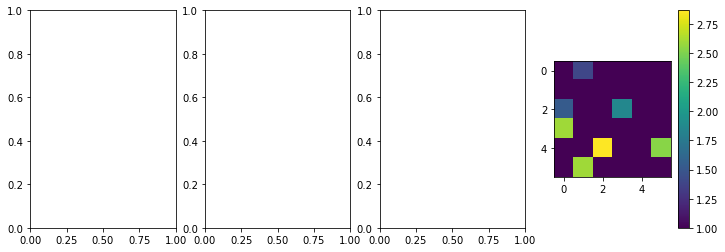

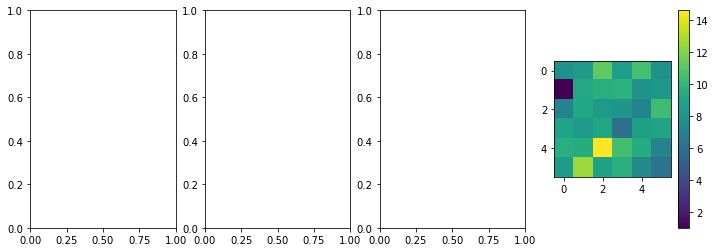

In [ ]:
int_5 = np.arange(0, 2160, 4)
int_10 = np.arange(1, 2160, 4)
int_15 = np.arange(2, 2160, 4)
int_20 = np.arange(3, 2160, 4)

for chan in range(65):
    leds_b, leds = [], []
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    for led in int_20:
        leds.append(len(presentation[led][chan]))
        leds_b.append(len(baselines[led][chan]))
    


    leds = np.array(leds).reshape(15, 36)
    leds_b = np.array(leds_b).reshape(15, 36)

    leds = np.mean(leds, axis=0)
    leds_b = np.mean(leds_b, axis=0)

    acti = (leds - leds_b).reshape(6, 6)
    plt.imshow(acti, vmin=1)
    plt.colorbar()
    plt.show()
    plt.close()



In [ ]:
for k in range(144):
    print(np.sum([len(mean_pres[k][c]) for c in range(n_chan)]))

2150
2227
2456
2477
2662
2154
2249
2141
2656
2541
2479
2045
2741
2813
2455
2870
2508
2272
2436
2623
2319
2133
2096
2131
1617
1369
1743
1209
2630
2688
2665
2372
2507
2835
2819
2530
2354
3010
2438
2746
2859
2937
2563
2721
2544
2689
2617
2609
2554
3089
3167
2773
2798
2635
2676
2652
2509
2540
2310
2527
3049
2735
2457
3044
2477
2878
2793
2651
2889
2748
2675
2790
2601
2698
2666
2692
2523
2733
2815
2655
2637
2416
2673
2875
2635
2795
2589
2371
2467
2889
2429
2973
2714
2550
2864
2682
2706
2748
2531
2881
3051
2965
2595
2781
2856
2521
2342
2884
2754
2559
2763
2790
2861
3186
3222
2795
2858
2897
2719
2776
2630
2700
2416
2850
2283
2914
2861
2616
2471
3178
2864
2940
2457
2445
2618
2653
2202
2408
2287
2990
2472
2923
3095
2811


In [ ]:
int_5 = np.arange(0, 144, 4)
int_10 = np.arange(1, 144, 4)
int_15 = np.arange(2, 144, 4)
int_20 = np.arange(3, 144, 4)

In [ ]:
intensities = [int_5, int_10, int_15, int_20]
name_protocol = ['5mW', '10mW', '15mW', '20mW']
for c in range(n_chan):
    #fig, axs = plt.subplots(1, 4)
    evo_spike = []
    for i, intensity in enumerate(intensities):
        heat = np.array([len(mean_pres[led][c]) for led in intensity]).reshape(6, 6)
        evo_spike.append(np.max([len(mean_pres[led][c])for led in intensity])/np.max([len(mean_pres[led][c])for led in int_5]))
    plt.plot(evo_spike)
    plt.savefig('implant_heatmaps/mean_channels_{}.png'.format(c))
    plt.close()

    #     axs[i].imshow(heat)
    #     axs[i].set_title('{}'.format(name_protocol[i]))
    # plt.savefig('implant_heatmaps/channel_{}.png'.format(c))
    # plt.close()


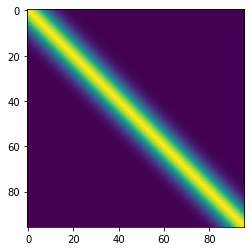

In [ ]:
t = np.load('/home/anverdie/share/gaia/User_folders/Antonin/topelitz_gaussian_cxe_28k.npy', allow_pickle=True)
plt.imshow(t)
plt.savefig('gaussian.svg')